# Welcome to my Keras practice to classify cars

## and to predict their price using a feedforward neural network

##### Importing libraries

In [4]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import backend
import keras
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

##### Importing the data

In [5]:
data = pd.read_csv('C:/Users/Nicolas/Documents/Scraping/thecarconnection/full_dataset.csv', 
                 index_col=0).sample(frac=1, random_state=42).reset_index(drop=True)
dataset = data.copy()

In [6]:
data.head()

,MSRP,Make,Model,Style Name,Drivetrain,Passenger Capacity,Passenger Doors,Body Style,EPA Classification,Front Shoulder Room (in),...,Rear Wheel Size,Front Wheel Size,Tire Rating,Tire Width Ratio,Wheel Size Ratio,Tire Ratio,Year,Country,Country Code,Category
0,30034.0,GMC,Sierra 2500HD,4WD Extended Cab Standard Box,Four Wheel Drive,6.0,2.0,Extended Cab Pickup - Standard Bed - Short Bed,None,65.2,...,16.0,16.0,R,1.0,1.0,7.0,2002.0,USA,6.0,Pickup
1,19515.0,Ford,Ranger,2WD SuperCab 2dr 6 Ft Box XL,Rear Wheel Drive,5.0,2.0,Extended Cab Pickup - Standard Bed - Short Bed,None,54.5,...,15.0,15.0,R,1.0,1.0,7.0,2010.0,USA,6.0,Pickup
2,24595.0,Subaru,Outback,2.5i Manual Premium PZEV,All Wheel Drive,5.0,4.0,Station Wagon,Midsize Station Wagon,56.3,...,17.0,17.0,R,1.0,1.0,6.0,2010.0,Japan,2.0,Car
3,56600.0,Porsche,Cayenne,AWD 4dr Diesel,All Wheel Drive,5.0,4.0,Sport Utility,None,58.9,...,18.0,18.0,V,1.0,1.0,5.0,2014.0,Germany,0.0,SUV
4,21795.0,Mazda,CX-5,2016.5 FWD 4dr Man Sport,Front Wheel Drive,5.0,4.0,Sport Utility,Small SUV 2WD,57.5,...,17.0,17.0,H,1.0,1.0,6.0,2016.0,Japan,2.0,SUV


In [7]:
data.select_dtypes(include=[int, float]).head()

,MSRP,Passenger Capacity,Passenger Doors,Front Shoulder Room (in),Front Head Room (in),Second Leg Room (in),Front Leg Room (in),Second Shoulder Room (in),Second Head Room (in),"Height, Overall (in)",...,Displacement (cc),Rear Tire Width,Front Tire Width,Rear Wheel Size,Front Wheel Size,Tire Width Ratio,Wheel Size Ratio,Tire Ratio,Year,Country Code
0,30034.0,6.0,2.0,65.2,41.0,33.7,41.30,66.3,38.4,76.2,...,364.0,245.0,245.0,16.0,16.0,1.0,1.0,7.0,2002.0,6.0
1,19515.0,5.0,2.0,54.5,39.2,39.1,42.40,40.0,33.2,66.3,...,140.0,225.0,225.0,15.0,15.0,1.0,1.0,7.0,2010.0,6.0
2,24595.0,5.0,4.0,56.3,40.8,37.8,43.00,56.1,39.3,65.7,...,150.0,225.0,225.0,17.0,17.0,1.0,1.0,6.0,2010.0,2.0
3,56600.0,5.0,4.0,58.9,39.6,36.0,41.86,56.7,38.9,67.4,...,181.0,255.0,255.0,18.0,18.0,1.0,1.0,5.0,2014.0,0.0
4,21795.0,5.0,4.0,57.5,40.1,39.3,41.00,55.5,39.0,65.7,...,122.0,225.0,225.0,17.0,17.0,1.0,1.0,6.0,2016.0,2.0


In [8]:
data = data.loc[data['Make'] != 'Tesla']
data = data.loc[data['Hybrid Engine'] == 0]

In [9]:
len(data)

30139

## Preprocessing

##### Making sure the data is balanced

In [10]:
data['EPA Classification'].value_counts().head(8)

None             10459
Compact           3924
Midsize           3203
SUV 4WD           2101
Subcompact        1721
Large             1501
SUV 2WD           1271
Small SUV 4WD     1174
Name: EPA Classification, dtype: int64

In [11]:
small_utility_awd = data.loc[data['EPA Classification'] == 'SUV 4WD'].sample(n=2000)
midsized_car = data.loc[data['EPA Classification'] == 'Midsize'].sample(n=2000)
compact_car = data.loc[data['EPA Classification'] == 'Compact'].sample(n=2000)

In [12]:
df = pd.concat([small_utility_awd, compact_car, midsized_car], 
                axis=0, sort=False).sample(frac=1)

##### Double checking the balanced data

In [13]:
df['EPA Classification'].value_counts().head()

Compact    2000
SUV 4WD    2000
Midsize    2000
Name: EPA Classification, dtype: int64

Text(0.5, 1.0, 'Pie Chart of Car Types')

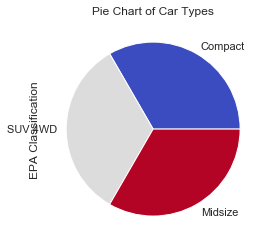

In [14]:
df['EPA Classification'].value_counts().head().plot(kind='pie', cmap='coolwarm')
plt.title('Pie Chart of Car Types')

##### Separating the `x` and `y`

In [15]:
df.columns

Index(['MSRP', 'Make', 'Model', 'Style Name', 'Drivetrain',
       'Passenger Capacity', 'Passenger Doors', 'Body Style',
       'EPA Classification', 'Front Shoulder Room (in)',
       'Front Head Room (in)', 'Second Leg Room (in)', 'Front Leg Room (in)',
       'Second Shoulder Room (in)', 'Second Head Room (in)',
       'Height, Overall (in)', 'Wheelbase (in)', 'Width, Max w/o mirrors (in)',
       'Fuel Tank Capacity, Approx (gal)', 'EPA Fuel Economy Est - Hwy (MPG)',
       'EPA Fuel Economy Est - City (MPG)', 'Fuel System',
       'Third Gear Ratio (:1)', 'First Gear Ratio (:1)',
       'Fourth Gear Ratio (:1)', 'Second Gear Ratio (:1)',
       'Front Brake Rotor Diam x Thickness (in)',
       'Rear Brake Rotor Diam x Thickness (in)', 'Steering Type',
       'Turning Diameter - Curb to Curb', 'Rear Wheel Material',
       'Suspension Type - Front', 'Air Bag-Frontal-Driver',
       'Air Bag-Frontal-Passenger', 'Air Bag-Passenger Switch (On/Off)',
       'Air Bag-Side Body-Front', 

In [16]:
x = df.loc[:, ['Drivetrain', 'Passenger Capacity', 'Passenger Doors', 'Body Style',
       'EPA Classification', 'Front Shoulder Room (in)',
       'Front Head Room (in)', 'Second Leg Room (in)', 'Front Leg Room (in)',
       'Second Shoulder Room (in)', 'Second Head Room (in)',
       'Height, Overall (in)', 'Wheelbase (in)', 'Width, Max w/o mirrors (in)',
       'Fuel Tank Capacity, Approx (gal)', 'EPA Fuel Economy Est - Hwy (MPG)',
       'EPA Fuel Economy Est - City (MPG)', 'Fuel System',
       'Third Gear Ratio (:1)', 'First Gear Ratio (:1)',
       'Fourth Gear Ratio (:1)', 'Second Gear Ratio (:1)',
       'Front Brake Rotor Diam x Thickness (in)',
       'Rear Brake Rotor Diam x Thickness (in)', 'Steering Type',
       'Turning Diameter - Curb to Curb', 'Rear Wheel Material',
       'Suspension Type - Front', 'Air Bag-Frontal-Driver',
       'Air Bag-Frontal-Passenger', 'Air Bag-Passenger Switch (On/Off)',
       'Air Bag-Side Body-Front', 'Air Bag-Side Body-Rear',
       'Air Bag-Side Head-Front', 'Air Bag-Side Head-Rear', 'Brakes-ABS',
       'Child Safety Rear Door Locks', 'Daytime Running Lights',
       'Traction Control', 'Night Vision', 'Rollover Protection Bars',
       'Fog Lamps', 'Parking Aid', 'Tire Pressure Monitor', 'Back-Up Camera',
       'Stability Control', 'Other Features', 'Basic Miles/km', 'Basic Years',
       'Corrosion Miles/km', 'Corrosion Years', 'Drivetrain Miles/km',
       'Drivetrain Years', 'Roadside Assistance Miles/km',
       'Roadside Assistance Years', 'Hybrid Engine', 'Gears', 'Net Horsepower',
       'Net Horsepower RPM', 'Net Torque', 'Net Torque RPM', 'Cylinders',
       'Engine Configuration', 'Displacement (L)', 'Displacement (cc)',
       'Rear Tire Width', 'Front Tire Width', 'Rear Wheel Size',
       'Front Wheel Size', 'Tire Rating', 'Tire Width Ratio',
       'Wheel Size Ratio', 'Tire Ratio', 'Year', 'Country',
       'Category']]

In [17]:
y = OrdinalEncoder().fit_transform(np.array(df['EPA Classification']).reshape(-1, 1))
y = keras.utils.to_categorical(y, 3)

In [18]:
y[:10]

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [19]:
specs_to_dummies = ['Drivetrain', 'Fuel System', 'Steering Type', 'Rear Wheel Material',
                   'Suspension Type - Front', 'Engine Configuration', 'Tire Rating', 'Country',
                   'Category']

for item in specs_to_dummies:
    dummies = pd.get_dummies(x[item], prefix_sep=': ', prefix=item)
    x = x.drop(item, axis=1)
    x = pd.concat([x, dummies], sort=False, axis=1)
x = x.reset_index(drop=True)

specs_to_one_two = ['Air Bag-Frontal-Driver', 'Air Bag-Frontal-Passenger', 'Air Bag-Passenger Switch (On/Off)',
       'Air Bag-Side Body-Front', 'Air Bag-Side Body-Rear', 'Air Bag-Side Head-Front', 'Air Bag-Side Head-Rear', 
       'Brakes-ABS', 'Child Safety Rear Door Locks', 'Daytime Running Lights',
       'Traction Control', 'Night Vision', 'Rollover Protection Bars',
       'Fog Lamps', 'Parking Aid', 'Tire Pressure Monitor', 'Back-Up Camera',
       'Stability Control']

for item in specs_to_one_two:
    dummies = pd.get_dummies(x[item], prefix_sep=': ', prefix=item, drop_first=True)
    x = x.drop(item, axis=1)
    x = pd.concat([x, dummies], sort=False, axis=1)
x = x.reset_index(drop=True)

x.drop(['Body Style', 'EPA Classification', 'Other Features'], axis=1, inplace=True)

In [20]:
x.head()

,Passenger Capacity,Passenger Doors,Front Shoulder Room (in),Front Head Room (in),Second Leg Room (in),Front Leg Room (in),Second Shoulder Room (in),Second Head Room (in),"Height, Overall (in)",Wheelbase (in),...,Child Safety Rear Door Locks: Yes,Daytime Running Lights: Yes,Traction Control: Yes,Night Vision: Yes,Rollover Protection Bars: Yes,Fog Lamps: Yes,Parking Aid: Yes,Tire Pressure Monitor: Yes,Back-Up Camera: Yes,Stability Control: Yes
0,5.0,4.0,55.6,40.0,35.0,43.5,55.1,37.6,58.3,104.3,...,1,0,0,0,0,1,0,0,0,0
1,5.0,4.0,56.9,40.4,35.4,45.0,54.8,37.5,57.2,114.6,...,1,1,1,0,0,0,1,1,1,1
2,5.0,4.0,58.3,39.1,36.1,41.4,56.2,38.0,57.6,116.9,...,1,0,1,0,0,1,0,1,0,1
3,5.0,4.0,58.2,37.6,39.2,42.1,57.0,37.0,57.5,111.0,...,1,1,1,0,0,1,0,1,1,1
4,5.0,4.0,55.6,38.0,34.0,42.3,53.5,35.9,55.6,105.1,...,1,1,1,0,0,0,0,1,1,1


In [21]:
x = x.astype('float64')

##### Transforming the data into numbers between 0 and 1

In [23]:
mm_scaler = MinMaxScaler(feature_range=(0, 1))
x = mm_scaler.fit_transform(x)

## Building and training the model

##### Building

In [24]:
x.shape

(6000, 204)

In [25]:
model = Sequential()
model.add(Dense(2, input_shape=(x.shape[1],)))
model.add(Dense(100, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(3, activation='softmax'))

##### Compiling

In [26]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy', 
             metrics=['accuracy'])

##### Training

In [27]:
history = model.fit(x, y, epochs=100, batch_size=8, validation_split=0.1)

Train on 5400 samples, validate on 600 samples
Epoch 1/100
5400/5400 [==============================] - 1s 239us/sample - loss: 0.5153 - accuracy: 0.7335 - val_loss: 0.3352 - val_accuracy: 0.8283
Epoch 2/100
5400/5400 [==============================] - 1s 154us/sample - loss: 0.2499 - accuracy: 0.8911 - val_loss: 0.2351 - val_accuracy: 0.8833
Epoch 3/100
5400/5400 [==============================] - 1s 151us/sample - loss: 0.1781 - accuracy: 0.9320 - val_loss: 0.1533 - val_accuracy: 0.9467
Epoch 4/100
5400/5400 [==============================] - 1s 148us/sample - loss: 0.1540 - accuracy: 0.9463 - val_loss: 0.1758 - val_accuracy: 0.9300
Epoch 5/100
5400/5400 [==============================] - 1s 149us/sample - loss: 0.1412 - accuracy: 0.9506 - val_loss: 0.1226 - val_accuracy: 0.9600
Epoch 6/100
5400/5400 [==============================] - 1s 151us/sample - loss: 0.1422 - accuracy: 0.9502 - val_loss: 0.1179 - val_accuracy: 0.9550
Epoch 7/100
5400/5400 [==============================] - 1s

KeyboardInterrupt: 

## Final score and summary

In [ ]:
print('highest accuracy: {}'.format(max(history.history['accuracy'])*100)) 
print('lowest loss: {}'.format(min(history.history['loss'])*100))

Highest accuracy in the validation sample: 98.46%, loss of 3.74%

In [113]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 2)                 410       
_________________________________________________________________
dense_9 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_10 (Dense)             (None, 200)               20200     
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 603       
Total params: 21,513
Trainable params: 21,513
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 1.0, 'Predicted vs Actual MSRP')

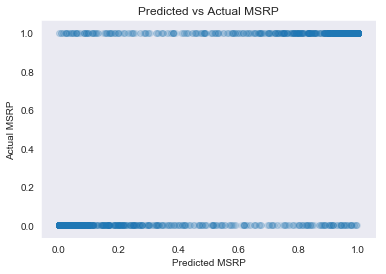

In [40]:
# plt.figure(figsize=(12, 5))
plt.scatter(model.predict(x), y, alpha=0.1) # TODO not actually test data , c='#6200EE'
plt.xlabel('Predicted MSRP')
plt.ylabel('Actual MSRP')
plt.title('Predicted vs Actual MSRP')

## Let's predict a continuous variable (fuel economy, highway)

In [28]:
data_no_electric = data.loc[data['Hybrid Engine'] != 1]
data_no_electric = data.loc[data['Engine Configuration'] != 'C']
data_no_electric = data_no_electric.loc[data_no_electric['Model'] != 'i3']
data_no_electric = data_no_electric.loc[data_no_electric['Model'] != 'Mirai']

In [29]:
x_2 = data_no_electric.loc[:, ['Drivetrain', 'Passenger Capacity', 'Passenger Doors', 
       'Body Style', 'Front Shoulder Room (in)',
       'Front Head Room (in)', 'Second Leg Room (in)', 'Front Leg Room (in)',
       'Second Shoulder Room (in)', 'Second Head Room (in)',
       'Height, Overall (in)', 'Wheelbase (in)', 'Width, Max w/o mirrors (in)',
       'Fuel Tank Capacity, Approx (gal)', 'Fuel System',
       'Third Gear Ratio (:1)', 'First Gear Ratio (:1)',
       'Fourth Gear Ratio (:1)', 'Second Gear Ratio (:1)',
       'Front Brake Rotor Diam x Thickness (in)',
       'Rear Brake Rotor Diam x Thickness (in)', 'Steering Type',
       'Turning Diameter - Curb to Curb', 'Rear Wheel Material',
       'Suspension Type - Front', 'Air Bag-Frontal-Driver',
       'Air Bag-Frontal-Passenger', 'Air Bag-Passenger Switch (On/Off)',
       'Air Bag-Side Body-Front', 'Air Bag-Side Body-Rear',
       'Air Bag-Side Head-Front', 'Air Bag-Side Head-Rear', 'Brakes-ABS',
       'Child Safety Rear Door Locks', 'Daytime Running Lights',
       'Traction Control', 'Night Vision', 'Rollover Protection Bars',
       'Fog Lamps', 'Parking Aid', 'Tire Pressure Monitor', 'Back-Up Camera',
       'Stability Control', 'Basic Miles/km', 'Basic Years',
       'Corrosion Miles/km', 'Corrosion Years', 'Drivetrain Miles/km',
       'Drivetrain Years', 'Roadside Assistance Miles/km',
       'Roadside Assistance Years', 'Hybrid Engine', 'Gears', 'Net Horsepower',
       'Net Horsepower RPM', 'Net Torque', 'Net Torque RPM', 'Cylinders',
       'Engine Configuration', 'Displacement (L)', 'Displacement (cc)',
       'Rear Tire Width', 'Front Tire Width', 'Rear Wheel Size',
       'Front Wheel Size', 'Tire Rating', 'Tire Width Ratio',
       'Wheel Size Ratio', 'Tire Ratio', 'Year', 'Country',
       'Category']]
y_2 = np.array(data_no_electric.loc[:, 'EPA Fuel Economy Est - City (MPG)'])

In [30]:
specs_to_dummies = ['Body Style', 'Drivetrain', 'Fuel System', 'Steering Type', 'Rear Wheel Material',
                   'Suspension Type - Front', 'Engine Configuration', 'Tire Rating', 'Country',
                   'Category']

for item in specs_to_dummies:
    dummies = pd.get_dummies(x_2[item], prefix_sep=': ', prefix=item)
    x_2 = x_2.drop(item, axis=1)
    x_2 = pd.concat([x_2, dummies], sort=False, axis=1)
x_2 = x_2.reset_index(drop=True)

In [31]:
specs_to_one_two = ['Air Bag-Frontal-Driver', 'Air Bag-Frontal-Passenger', 'Air Bag-Passenger Switch (On/Off)',
       'Air Bag-Side Body-Front', 'Air Bag-Side Body-Rear', 'Air Bag-Side Head-Front', 'Air Bag-Side Head-Rear', 
       'Brakes-ABS', 'Child Safety Rear Door Locks', 'Daytime Running Lights',
       'Traction Control', 'Night Vision', 'Rollover Protection Bars',
       'Fog Lamps', 'Parking Aid', 'Tire Pressure Monitor', 'Back-Up Camera',
       'Stability Control']

In [32]:
for item in specs_to_one_two:
    dummies = pd.get_dummies(x_2[item], prefix_sep=': ', prefix=item, drop_first=True)
    x_2 = x_2.drop(item, axis=1)
    x_2 = pd.concat([x_2, dummies], sort=False, axis=1)
x_2 = x_2.reset_index(drop=True)

##### Transforming the data into numbers between 0 and 1

In [33]:
x_2 = x_2.astype('float64')
x_2 = mm_scaler.fit_transform(x_2)

##### Train test split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(x_2, y_2, test_size=0.2)

In [35]:
len(y_test)

6028

## Bulding and training the model

##### Building

In [43]:
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],)))
model.add(Dense(20, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dropout(.001))
model.add(Dense(1, activation='linear'))

##### Compiling

In [44]:
model.compile(optimizer='adam',
              loss='mean_absolute_percentage_error',
              metrics=['mae'])

##### Training

In [51]:
epochs = 5_000
batch_size = 16
validation_split = 0.1

In [52]:
# model = load_model('clf_cars.h5')

In [53]:
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                    validation_split=validation_split, verbose=2)

Train on 21698 samples, validate on 2411 samples
Epoch 1/5000
21698/21698 - 2s - loss: 4.1517 - mae: 0.8016 - val_loss: 4.6648 - val_mae: 0.9257
Epoch 2/5000
21698/21698 - 2s - loss: 4.0973 - mae: 0.7890 - val_loss: 3.9408 - val_mae: 0.7629
Epoch 3/5000
21698/21698 - 2s - loss: 4.0066 - mae: 0.7727 - val_loss: 4.0074 - val_mae: 0.7858
Epoch 4/5000
21698/21698 - 2s - loss: 4.0103 - mae: 0.7737 - val_loss: 4.0987 - val_mae: 0.7896
Epoch 5/5000
21698/21698 - 2s - loss: 3.9747 - mae: 0.7658 - val_loss: 3.8589 - val_mae: 0.7442
Epoch 6/5000
21698/21698 - 2s - loss: 3.8669 - mae: 0.7461 - val_loss: 5.3992 - val_mae: 1.0080
Epoch 7/5000
21698/21698 - 2s - loss: 3.9594 - mae: 0.7611 - val_loss: 3.9944 - val_mae: 0.7752
Epoch 8/5000
21698/21698 - 2s - loss: 3.8648 - mae: 0.7441 - val_loss: 3.8152 - val_mae: 0.7401
Epoch 9/5000
21698/21698 - 2s - loss: 3.7671 - mae: 0.7265 - val_loss: 4.1164 - val_mae: 0.7884
Epoch 10/5000
21698/21698 - 2s - loss: 3.7598 - mae: 0.7242 - val_loss: 4.3695 - val_ma

21698/21698 - 2s - loss: 2.8952 - mae: 0.5549 - val_loss: 3.1936 - val_mae: 0.6095
Epoch 86/5000
21698/21698 - 2s - loss: 2.9003 - mae: 0.5567 - val_loss: 3.2263 - val_mae: 0.6180
Epoch 87/5000
21698/21698 - 2s - loss: 2.8992 - mae: 0.5571 - val_loss: 3.1794 - val_mae: 0.6050
Epoch 88/5000
21698/21698 - 2s - loss: 2.8872 - mae: 0.5538 - val_loss: 3.3143 - val_mae: 0.6352
Epoch 89/5000
21698/21698 - 2s - loss: 2.8608 - mae: 0.5486 - val_loss: 3.2523 - val_mae: 0.6310
Epoch 90/5000
21698/21698 - 2s - loss: 2.8604 - mae: 0.5494 - val_loss: 3.1845 - val_mae: 0.6096
Epoch 91/5000
21698/21698 - 2s - loss: 2.8896 - mae: 0.5546 - val_loss: 3.3455 - val_mae: 0.6434
Epoch 92/5000
21698/21698 - 2s - loss: 2.8563 - mae: 0.5476 - val_loss: 3.3271 - val_mae: 0.6318
Epoch 93/5000
21698/21698 - 2s - loss: 2.8671 - mae: 0.5501 - val_loss: 3.2787 - val_mae: 0.6204
Epoch 94/5000
21698/21698 - 2s - loss: 2.8154 - mae: 0.5406 - val_loss: 3.1509 - val_mae: 0.6003
Epoch 95/5000
21698/21698 - 2s - loss: 2.804

Epoch 169/5000
21698/21698 - 2s - loss: 2.6073 - mae: 0.4996 - val_loss: 3.1139 - val_mae: 0.6020
Epoch 170/5000
21698/21698 - 2s - loss: 2.6258 - mae: 0.5036 - val_loss: 3.0329 - val_mae: 0.5748
Epoch 171/5000
21698/21698 - 2s - loss: 2.5797 - mae: 0.4946 - val_loss: 3.1270 - val_mae: 0.5905
Epoch 172/5000
21698/21698 - 2s - loss: 2.6084 - mae: 0.5000 - val_loss: 3.1376 - val_mae: 0.5946
Epoch 173/5000
21698/21698 - 2s - loss: 2.5618 - mae: 0.4915 - val_loss: 3.0229 - val_mae: 0.5780
Epoch 174/5000
21698/21698 - 2s - loss: 2.5833 - mae: 0.4946 - val_loss: 3.1150 - val_mae: 0.5914
Epoch 175/5000
21698/21698 - 2s - loss: 2.5924 - mae: 0.4973 - val_loss: 2.9421 - val_mae: 0.5630
Epoch 176/5000
21698/21698 - 2s - loss: 2.5759 - mae: 0.4931 - val_loss: 3.1265 - val_mae: 0.6022
Epoch 177/5000
21698/21698 - 2s - loss: 2.5528 - mae: 0.4904 - val_loss: 3.1191 - val_mae: 0.5998
Epoch 178/5000
21698/21698 - 2s - loss: 2.5759 - mae: 0.4932 - val_loss: 3.0197 - val_mae: 0.5818
Epoch 179/5000
21698

Epoch 253/5000
21698/21698 - 4s - loss: 2.4017 - mae: 0.4618 - val_loss: 3.0984 - val_mae: 0.5959
Epoch 254/5000
21698/21698 - 4s - loss: 2.4149 - mae: 0.4652 - val_loss: 2.9055 - val_mae: 0.5524
Epoch 255/5000
21698/21698 - 4s - loss: 2.4330 - mae: 0.4691 - val_loss: 3.0287 - val_mae: 0.5812
Epoch 256/5000
21698/21698 - 4s - loss: 2.3918 - mae: 0.4614 - val_loss: 2.8597 - val_mae: 0.5448
Epoch 257/5000
21698/21698 - 4s - loss: 2.4101 - mae: 0.4639 - val_loss: 3.0434 - val_mae: 0.5740
Epoch 258/5000
21698/21698 - 4s - loss: 2.3972 - mae: 0.4613 - val_loss: 2.9101 - val_mae: 0.5557
Epoch 259/5000
21698/21698 - 4s - loss: 2.3802 - mae: 0.4581 - val_loss: 2.9284 - val_mae: 0.5596
Epoch 260/5000
21698/21698 - 4s - loss: 2.4397 - mae: 0.4697 - val_loss: 2.9444 - val_mae: 0.5640
Epoch 261/5000
21698/21698 - 3s - loss: 2.3978 - mae: 0.4628 - val_loss: 2.8820 - val_mae: 0.5537
Epoch 262/5000
21698/21698 - 3s - loss: 2.3828 - mae: 0.4588 - val_loss: 2.9474 - val_mae: 0.5685
Epoch 263/5000
21698

Epoch 337/5000
21698/21698 - 4s - loss: 2.2870 - mae: 0.4412 - val_loss: 2.7968 - val_mae: 0.5355
Epoch 338/5000
21698/21698 - 4s - loss: 2.3091 - mae: 0.4448 - val_loss: 2.7661 - val_mae: 0.5275
Epoch 339/5000
21698/21698 - 4s - loss: 2.2831 - mae: 0.4409 - val_loss: 2.9773 - val_mae: 0.5785
Epoch 340/5000
21698/21698 - 4s - loss: 2.3003 - mae: 0.4439 - val_loss: 2.8020 - val_mae: 0.5330
Epoch 341/5000
21698/21698 - 4s - loss: 2.3214 - mae: 0.4482 - val_loss: 2.7957 - val_mae: 0.5322
Epoch 342/5000
21698/21698 - 4s - loss: 2.2912 - mae: 0.4417 - val_loss: 2.7659 - val_mae: 0.5324
Epoch 343/5000
21698/21698 - 4s - loss: 2.2843 - mae: 0.4404 - val_loss: 2.7538 - val_mae: 0.5267
Epoch 344/5000
21698/21698 - 4s - loss: 2.3021 - mae: 0.4440 - val_loss: 2.9140 - val_mae: 0.5615
Epoch 345/5000
21698/21698 - 4s - loss: 2.2930 - mae: 0.4429 - val_loss: 2.8065 - val_mae: 0.5354
Epoch 346/5000
21698/21698 - 4s - loss: 2.2950 - mae: 0.4425 - val_loss: 3.3486 - val_mae: 0.6393
Epoch 347/5000
21698

Epoch 421/5000
21698/21698 - 4s - loss: 2.1972 - mae: 0.4249 - val_loss: 2.8232 - val_mae: 0.5381
Epoch 422/5000
21698/21698 - 4s - loss: 2.2126 - mae: 0.4282 - val_loss: 2.7652 - val_mae: 0.5317
Epoch 423/5000
21698/21698 - 4s - loss: 2.2017 - mae: 0.4258 - val_loss: 2.9190 - val_mae: 0.5684
Epoch 424/5000
21698/21698 - 4s - loss: 2.1950 - mae: 0.4240 - val_loss: 2.9733 - val_mae: 0.5656
Epoch 425/5000
21698/21698 - 4s - loss: 2.1961 - mae: 0.4252 - val_loss: 2.8032 - val_mae: 0.5363
Epoch 426/5000
21698/21698 - 4s - loss: 2.2188 - mae: 0.4282 - val_loss: 2.8303 - val_mae: 0.5379
Epoch 427/5000
21698/21698 - 4s - loss: 2.2191 - mae: 0.4284 - val_loss: 2.8101 - val_mae: 0.5389
Epoch 428/5000
21698/21698 - 4s - loss: 2.1854 - mae: 0.4228 - val_loss: 2.9514 - val_mae: 0.5635
Epoch 429/5000
21698/21698 - 4s - loss: 2.2130 - mae: 0.4277 - val_loss: 2.7984 - val_mae: 0.5393
Epoch 430/5000
21698/21698 - 4s - loss: 2.2027 - mae: 0.4269 - val_loss: 2.8440 - val_mae: 0.5431
Epoch 431/5000
21698

Epoch 505/5000
21698/21698 - 4s - loss: 2.1370 - mae: 0.4128 - val_loss: 2.6408 - val_mae: 0.5090
Epoch 506/5000
21698/21698 - 4s - loss: 2.1402 - mae: 0.4146 - val_loss: 2.6354 - val_mae: 0.5100
Epoch 507/5000
21698/21698 - 4s - loss: 2.1486 - mae: 0.4165 - val_loss: 2.7561 - val_mae: 0.5277
Epoch 508/5000
21698/21698 - 4s - loss: 2.1317 - mae: 0.4129 - val_loss: 2.5975 - val_mae: 0.4993
Epoch 509/5000
21698/21698 - 4s - loss: 2.1344 - mae: 0.4137 - val_loss: 2.7117 - val_mae: 0.5206
Epoch 510/5000
21698/21698 - 4s - loss: 2.1391 - mae: 0.4144 - val_loss: 2.5657 - val_mae: 0.4957
Epoch 511/5000
21698/21698 - 4s - loss: 2.1267 - mae: 0.4117 - val_loss: 2.7620 - val_mae: 0.5292
Epoch 512/5000
21698/21698 - 4s - loss: 2.1270 - mae: 0.4120 - val_loss: 2.6036 - val_mae: 0.4962
Epoch 513/5000
21698/21698 - 4s - loss: 2.1548 - mae: 0.4165 - val_loss: 2.6738 - val_mae: 0.5174
Epoch 514/5000
21698/21698 - 4s - loss: 2.1286 - mae: 0.4122 - val_loss: 2.8058 - val_mae: 0.5364
Epoch 515/5000
21698

Epoch 589/5000
21698/21698 - 4s - loss: 2.0858 - mae: 0.4041 - val_loss: 2.5979 - val_mae: 0.4967
Epoch 590/5000
21698/21698 - 4s - loss: 2.0724 - mae: 0.4014 - val_loss: 2.6628 - val_mae: 0.5124
Epoch 591/5000
21698/21698 - 4s - loss: 2.0762 - mae: 0.4029 - val_loss: 2.8544 - val_mae: 0.5458
Epoch 592/5000
21698/21698 - 4s - loss: 2.0629 - mae: 0.3999 - val_loss: 2.6797 - val_mae: 0.5220
Epoch 593/5000
21698/21698 - 4s - loss: 2.0547 - mae: 0.3990 - val_loss: 2.6526 - val_mae: 0.5099
Epoch 594/5000
21698/21698 - 4s - loss: 2.0766 - mae: 0.4017 - val_loss: 2.5922 - val_mae: 0.4979
Epoch 595/5000
21698/21698 - 4s - loss: 2.0393 - mae: 0.3947 - val_loss: 2.6500 - val_mae: 0.5076
Epoch 596/5000
21698/21698 - 4s - loss: 2.0672 - mae: 0.4013 - val_loss: 2.6922 - val_mae: 0.5186
Epoch 597/5000
21698/21698 - 4s - loss: 2.0798 - mae: 0.4030 - val_loss: 2.6483 - val_mae: 0.5085
Epoch 598/5000
21698/21698 - 4s - loss: 2.0706 - mae: 0.4019 - val_loss: 2.6199 - val_mae: 0.5011
Epoch 599/5000
21698

Epoch 673/5000
21698/21698 - 4s - loss: 2.0395 - mae: 0.3947 - val_loss: 2.6349 - val_mae: 0.5020
Epoch 674/5000
21698/21698 - 4s - loss: 2.0094 - mae: 0.3895 - val_loss: 2.6374 - val_mae: 0.5061
Epoch 675/5000
21698/21698 - 4s - loss: 2.0295 - mae: 0.3936 - val_loss: 2.6996 - val_mae: 0.5248
Epoch 676/5000
21698/21698 - 4s - loss: 2.0117 - mae: 0.3894 - val_loss: 2.6674 - val_mae: 0.5098
Epoch 677/5000
21698/21698 - 4s - loss: 2.0276 - mae: 0.3929 - val_loss: 2.6483 - val_mae: 0.5084
Epoch 678/5000
21698/21698 - 4s - loss: 2.0123 - mae: 0.3903 - val_loss: 2.8947 - val_mae: 0.5499
Epoch 679/5000
21698/21698 - 4s - loss: 2.0211 - mae: 0.3920 - val_loss: 2.7023 - val_mae: 0.5288
Epoch 680/5000
21698/21698 - 4s - loss: 2.0120 - mae: 0.3905 - val_loss: 2.5118 - val_mae: 0.4809
Epoch 681/5000
21698/21698 - 4s - loss: 1.9998 - mae: 0.3875 - val_loss: 2.5888 - val_mae: 0.4999
Epoch 682/5000
21698/21698 - 4s - loss: 2.0071 - mae: 0.3892 - val_loss: 2.5680 - val_mae: 0.4923
Epoch 683/5000
21698

Epoch 757/5000
21698/21698 - 4s - loss: 1.9724 - mae: 0.3823 - val_loss: 2.6332 - val_mae: 0.5079
Epoch 758/5000
21698/21698 - 4s - loss: 1.9942 - mae: 0.3868 - val_loss: 2.6194 - val_mae: 0.4999
Epoch 759/5000
21698/21698 - 4s - loss: 1.9799 - mae: 0.3842 - val_loss: 2.5778 - val_mae: 0.4972
Epoch 760/5000
21698/21698 - 4s - loss: 1.9685 - mae: 0.3821 - val_loss: 2.5754 - val_mae: 0.4939
Epoch 761/5000
21698/21698 - 4s - loss: 1.9677 - mae: 0.3817 - val_loss: 2.5527 - val_mae: 0.4878
Epoch 762/5000
21698/21698 - 4s - loss: 1.9718 - mae: 0.3831 - val_loss: 2.5360 - val_mae: 0.4857
Epoch 763/5000
21698/21698 - 4s - loss: 1.9600 - mae: 0.3800 - val_loss: 2.6112 - val_mae: 0.5016
Epoch 764/5000
21698/21698 - 4s - loss: 1.9494 - mae: 0.3778 - val_loss: 2.5910 - val_mae: 0.5009
Epoch 765/5000
21698/21698 - 4s - loss: 1.9652 - mae: 0.3815 - val_loss: 2.5640 - val_mae: 0.4923
Epoch 766/5000
21698/21698 - 4s - loss: 1.9486 - mae: 0.3778 - val_loss: 2.4912 - val_mae: 0.4796
Epoch 767/5000
21698

Epoch 841/5000
21698/21698 - 4s - loss: 1.9091 - mae: 0.3706 - val_loss: 2.7553 - val_mae: 0.5271
Epoch 842/5000
21698/21698 - 4s - loss: 1.9306 - mae: 0.3742 - val_loss: 2.6843 - val_mae: 0.5170
Epoch 843/5000
21698/21698 - 4s - loss: 1.9310 - mae: 0.3751 - val_loss: 2.5908 - val_mae: 0.4999
Epoch 844/5000
21698/21698 - 4s - loss: 1.9327 - mae: 0.3751 - val_loss: 2.5367 - val_mae: 0.4843
Epoch 845/5000
21698/21698 - 4s - loss: 1.9465 - mae: 0.3779 - val_loss: 2.4925 - val_mae: 0.4790
Epoch 846/5000
21698/21698 - 4s - loss: 1.9258 - mae: 0.3741 - val_loss: 2.5889 - val_mae: 0.4985
Epoch 847/5000
21698/21698 - 4s - loss: 1.9415 - mae: 0.3765 - val_loss: 2.4603 - val_mae: 0.4713
Epoch 848/5000
21698/21698 - 4s - loss: 1.9174 - mae: 0.3720 - val_loss: 2.5396 - val_mae: 0.4850
Epoch 849/5000
21698/21698 - 4s - loss: 1.9217 - mae: 0.3740 - val_loss: 2.5398 - val_mae: 0.4881
Epoch 850/5000
21698/21698 - 4s - loss: 1.9186 - mae: 0.3729 - val_loss: 2.7620 - val_mae: 0.5390
Epoch 851/5000
21698

Epoch 925/5000
21698/21698 - 4s - loss: 1.8908 - mae: 0.3661 - val_loss: 2.5429 - val_mae: 0.4877
Epoch 926/5000
21698/21698 - 4s - loss: 1.8760 - mae: 0.3641 - val_loss: 2.4983 - val_mae: 0.4785
Epoch 927/5000
21698/21698 - 4s - loss: 1.8656 - mae: 0.3623 - val_loss: 2.5270 - val_mae: 0.4808
Epoch 928/5000
21698/21698 - 4s - loss: 1.8752 - mae: 0.3647 - val_loss: 2.5490 - val_mae: 0.4876
Epoch 929/5000
21698/21698 - 4s - loss: 1.8813 - mae: 0.3652 - val_loss: 2.5777 - val_mae: 0.4985
Epoch 930/5000
21698/21698 - 4s - loss: 1.9070 - mae: 0.3707 - val_loss: 2.5424 - val_mae: 0.4857
Epoch 931/5000
21698/21698 - 4s - loss: 1.8701 - mae: 0.3638 - val_loss: 2.6240 - val_mae: 0.4986
Epoch 932/5000
21698/21698 - 4s - loss: 1.8611 - mae: 0.3616 - val_loss: 2.5128 - val_mae: 0.4813
Epoch 933/5000
21698/21698 - 4s - loss: 1.8763 - mae: 0.3642 - val_loss: 2.5495 - val_mae: 0.4878
Epoch 934/5000
21698/21698 - 4s - loss: 1.8666 - mae: 0.3624 - val_loss: 2.5707 - val_mae: 0.4877
Epoch 935/5000
21698

Epoch 1009/5000
21698/21698 - 4s - loss: 1.8276 - mae: 0.3550 - val_loss: 2.5055 - val_mae: 0.4778
Epoch 1010/5000
21698/21698 - 4s - loss: 1.8424 - mae: 0.3581 - val_loss: 2.5135 - val_mae: 0.4805
Epoch 1011/5000
21698/21698 - 4s - loss: 1.8432 - mae: 0.3590 - val_loss: 2.5118 - val_mae: 0.4810
Epoch 1012/5000
21698/21698 - 4s - loss: 1.8275 - mae: 0.3556 - val_loss: 2.5250 - val_mae: 0.4832
Epoch 1013/5000
21698/21698 - 4s - loss: 1.8265 - mae: 0.3551 - val_loss: 2.4825 - val_mae: 0.4769
Epoch 1014/5000
21698/21698 - 4s - loss: 1.8389 - mae: 0.3575 - val_loss: 2.5845 - val_mae: 0.4895
Epoch 1015/5000
21698/21698 - 4s - loss: 1.8395 - mae: 0.3574 - val_loss: 2.4769 - val_mae: 0.4748
Epoch 1016/5000
21698/21698 - 4s - loss: 1.8402 - mae: 0.3571 - val_loss: 2.5165 - val_mae: 0.4779
Epoch 1017/5000
21698/21698 - 4s - loss: 1.8424 - mae: 0.3582 - val_loss: 2.6840 - val_mae: 0.5081
Epoch 1018/5000
21698/21698 - 4s - loss: 1.8427 - mae: 0.3580 - val_loss: 2.5117 - val_mae: 0.4821
Epoch 1019

Epoch 1092/5000
21698/21698 - 4s - loss: 1.7939 - mae: 0.3486 - val_loss: 2.4635 - val_mae: 0.4704
Epoch 1093/5000
21698/21698 - 4s - loss: 1.7932 - mae: 0.3487 - val_loss: 2.4267 - val_mae: 0.4619
Epoch 1094/5000
21698/21698 - 4s - loss: 1.7923 - mae: 0.3489 - val_loss: 2.5793 - val_mae: 0.5005
Epoch 1095/5000
21698/21698 - 4s - loss: 1.7997 - mae: 0.3505 - val_loss: 2.4718 - val_mae: 0.4725
Epoch 1096/5000
21698/21698 - 4s - loss: 1.7988 - mae: 0.3511 - val_loss: 2.5225 - val_mae: 0.4817
Epoch 1097/5000
21698/21698 - 4s - loss: 1.8207 - mae: 0.3533 - val_loss: 2.5891 - val_mae: 0.4980
Epoch 1098/5000
21698/21698 - 4s - loss: 1.8135 - mae: 0.3526 - val_loss: 2.5068 - val_mae: 0.4809
Epoch 1099/5000
21698/21698 - 4s - loss: 1.8115 - mae: 0.3524 - val_loss: 2.5422 - val_mae: 0.4872
Epoch 1100/5000
21698/21698 - 4s - loss: 1.8010 - mae: 0.3500 - val_loss: 2.5143 - val_mae: 0.4774
Epoch 1101/5000
21698/21698 - 4s - loss: 1.7905 - mae: 0.3496 - val_loss: 2.4942 - val_mae: 0.4800
Epoch 1102

Epoch 1175/5000
21698/21698 - 4s - loss: 1.7819 - mae: 0.3470 - val_loss: 2.4755 - val_mae: 0.4733
Epoch 1176/5000
21698/21698 - 4s - loss: 1.7694 - mae: 0.3437 - val_loss: 2.5457 - val_mae: 0.4890
Epoch 1177/5000
21698/21698 - 4s - loss: 1.7814 - mae: 0.3467 - val_loss: 2.5690 - val_mae: 0.4935
Epoch 1178/5000
21698/21698 - 4s - loss: 1.7639 - mae: 0.3421 - val_loss: 2.4941 - val_mae: 0.4777
Epoch 1179/5000
21698/21698 - 4s - loss: 1.7801 - mae: 0.3463 - val_loss: 2.4927 - val_mae: 0.4718
Epoch 1180/5000
21698/21698 - 4s - loss: 1.7800 - mae: 0.3464 - val_loss: 2.5144 - val_mae: 0.4808
Epoch 1181/5000
21698/21698 - 4s - loss: 1.7775 - mae: 0.3462 - val_loss: 2.5759 - val_mae: 0.4935
Epoch 1182/5000
21698/21698 - 4s - loss: 1.7945 - mae: 0.3491 - val_loss: 2.4679 - val_mae: 0.4708
Epoch 1183/5000
21698/21698 - 4s - loss: 1.7860 - mae: 0.3473 - val_loss: 2.4878 - val_mae: 0.4781
Epoch 1184/5000
21698/21698 - 4s - loss: 1.7790 - mae: 0.3452 - val_loss: 2.5055 - val_mae: 0.4741
Epoch 1185

Epoch 1258/5000
21698/21698 - 2s - loss: 1.7581 - mae: 0.3420 - val_loss: 2.4192 - val_mae: 0.4621
Epoch 1259/5000
21698/21698 - 2s - loss: 1.7512 - mae: 0.3411 - val_loss: 2.4100 - val_mae: 0.4595
Epoch 1260/5000
21698/21698 - 2s - loss: 1.7614 - mae: 0.3421 - val_loss: 2.5338 - val_mae: 0.4798
Epoch 1261/5000
21698/21698 - 2s - loss: 1.7590 - mae: 0.3421 - val_loss: 2.4820 - val_mae: 0.4723
Epoch 1262/5000
21698/21698 - 2s - loss: 1.7593 - mae: 0.3432 - val_loss: 2.4836 - val_mae: 0.4745
Epoch 1263/5000
21698/21698 - 2s - loss: 1.7617 - mae: 0.3435 - val_loss: 2.5017 - val_mae: 0.4781
Epoch 1264/5000
21698/21698 - 2s - loss: 1.7710 - mae: 0.3444 - val_loss: 2.5378 - val_mae: 0.4851
Epoch 1265/5000
21698/21698 - 2s - loss: 1.7700 - mae: 0.3448 - val_loss: 2.4346 - val_mae: 0.4663
Epoch 1266/5000
21698/21698 - 2s - loss: 1.7344 - mae: 0.3375 - val_loss: 2.4775 - val_mae: 0.4719
Epoch 1267/5000
21698/21698 - 2s - loss: 1.7606 - mae: 0.3433 - val_loss: 2.4476 - val_mae: 0.4663
Epoch 1268

Epoch 1341/5000
21698/21698 - 2s - loss: 1.7649 - mae: 0.3444 - val_loss: 2.5197 - val_mae: 0.4858
Epoch 1342/5000
21698/21698 - 2s - loss: 1.7341 - mae: 0.3379 - val_loss: 2.4783 - val_mae: 0.4777
Epoch 1343/5000
21698/21698 - 2s - loss: 1.7428 - mae: 0.3392 - val_loss: 2.4078 - val_mae: 0.4604
Epoch 1344/5000
21698/21698 - 2s - loss: 1.7364 - mae: 0.3380 - val_loss: 2.4596 - val_mae: 0.4709
Epoch 1345/5000
21698/21698 - 2s - loss: 1.7252 - mae: 0.3361 - val_loss: 2.4906 - val_mae: 0.4802
Epoch 1346/5000
21698/21698 - 2s - loss: 1.7556 - mae: 0.3417 - val_loss: 2.5561 - val_mae: 0.4855
Epoch 1347/5000
21698/21698 - 2s - loss: 1.7504 - mae: 0.3414 - val_loss: 2.5637 - val_mae: 0.4881
Epoch 1348/5000
21698/21698 - 2s - loss: 1.7574 - mae: 0.3429 - val_loss: 2.5088 - val_mae: 0.4814
Epoch 1349/5000
21698/21698 - 2s - loss: 1.7355 - mae: 0.3382 - val_loss: 2.4700 - val_mae: 0.4755
Epoch 1350/5000
21698/21698 - 2s - loss: 1.7239 - mae: 0.3358 - val_loss: 2.5144 - val_mae: 0.4759
Epoch 1351

Epoch 1424/5000
21698/21698 - 2s - loss: 1.7170 - mae: 0.3338 - val_loss: 2.4568 - val_mae: 0.4715
Epoch 1425/5000
21698/21698 - 2s - loss: 1.7206 - mae: 0.3352 - val_loss: 2.4507 - val_mae: 0.4661
Epoch 1426/5000
21698/21698 - 2s - loss: 1.7348 - mae: 0.3376 - val_loss: 2.4679 - val_mae: 0.4678
Epoch 1427/5000
21698/21698 - 2s - loss: 1.7447 - mae: 0.3406 - val_loss: 2.4639 - val_mae: 0.4689
Epoch 1428/5000
21698/21698 - 2s - loss: 1.7462 - mae: 0.3412 - val_loss: 2.4398 - val_mae: 0.4627
Epoch 1429/5000
21698/21698 - 2s - loss: 1.7135 - mae: 0.3341 - val_loss: 2.4857 - val_mae: 0.4727
Epoch 1430/5000
21698/21698 - 2s - loss: 1.7241 - mae: 0.3359 - val_loss: 2.4666 - val_mae: 0.4702
Epoch 1431/5000
21698/21698 - 2s - loss: 1.7350 - mae: 0.3378 - val_loss: 2.4919 - val_mae: 0.4714
Epoch 1432/5000
21698/21698 - 2s - loss: 1.7448 - mae: 0.3400 - val_loss: 2.4798 - val_mae: 0.4740
Epoch 1433/5000
21698/21698 - 2s - loss: 1.7365 - mae: 0.3386 - val_loss: 2.4436 - val_mae: 0.4680
Epoch 1434

Epoch 1507/5000
21698/21698 - 2s - loss: 1.7266 - mae: 0.3361 - val_loss: 2.4296 - val_mae: 0.4657
Epoch 1508/5000
21698/21698 - 2s - loss: 1.7266 - mae: 0.3357 - val_loss: 2.4976 - val_mae: 0.4790
Epoch 1509/5000
21698/21698 - 2s - loss: 1.7159 - mae: 0.3356 - val_loss: 2.5317 - val_mae: 0.4825
Epoch 1510/5000
21698/21698 - 2s - loss: 1.7193 - mae: 0.3341 - val_loss: 2.4465 - val_mae: 0.4678
Epoch 1511/5000
21698/21698 - 2s - loss: 1.7390 - mae: 0.3386 - val_loss: 2.4529 - val_mae: 0.4674
Epoch 1512/5000
21698/21698 - 2s - loss: 1.7313 - mae: 0.3368 - val_loss: 2.5250 - val_mae: 0.4867
Epoch 1513/5000
21698/21698 - 2s - loss: 1.7171 - mae: 0.3351 - val_loss: 2.5310 - val_mae: 0.4819
Epoch 1514/5000
21698/21698 - 2s - loss: 1.7458 - mae: 0.3402 - val_loss: 2.4239 - val_mae: 0.4645
Epoch 1515/5000
21698/21698 - 2s - loss: 1.7162 - mae: 0.3343 - val_loss: 2.4365 - val_mae: 0.4653
Epoch 1516/5000
21698/21698 - 2s - loss: 1.7086 - mae: 0.3328 - val_loss: 2.4511 - val_mae: 0.4677
Epoch 1517

Epoch 1590/5000
21698/21698 - 2s - loss: 1.7074 - mae: 0.3323 - val_loss: 2.4532 - val_mae: 0.4671
Epoch 1591/5000
21698/21698 - 2s - loss: 1.7228 - mae: 0.3359 - val_loss: 2.5406 - val_mae: 0.4794
Epoch 1592/5000
21698/21698 - 2s - loss: 1.7113 - mae: 0.3322 - val_loss: 2.5164 - val_mae: 0.4770
Epoch 1593/5000
21698/21698 - 2s - loss: 1.7069 - mae: 0.3317 - val_loss: 2.5239 - val_mae: 0.4806
Epoch 1594/5000
21698/21698 - 2s - loss: 1.7130 - mae: 0.3334 - val_loss: 2.4610 - val_mae: 0.4694
Epoch 1595/5000
21698/21698 - 2s - loss: 1.7212 - mae: 0.3351 - val_loss: 2.4598 - val_mae: 0.4683
Epoch 1596/5000
21698/21698 - 2s - loss: 1.7460 - mae: 0.3408 - val_loss: 2.5085 - val_mae: 0.4758
Epoch 1597/5000
21698/21698 - 2s - loss: 1.7029 - mae: 0.3317 - val_loss: 2.4682 - val_mae: 0.4744
Epoch 1598/5000
21698/21698 - 2s - loss: 1.7139 - mae: 0.3349 - val_loss: 2.4528 - val_mae: 0.4678
Epoch 1599/5000
21698/21698 - 2s - loss: 1.7000 - mae: 0.3307 - val_loss: 2.5810 - val_mae: 0.4995
Epoch 1600

Epoch 1673/5000
21698/21698 - 2s - loss: 1.6906 - mae: 0.3291 - val_loss: 2.4797 - val_mae: 0.4707
Epoch 1674/5000
21698/21698 - 2s - loss: 1.6916 - mae: 0.3294 - val_loss: 2.4662 - val_mae: 0.4682
Epoch 1675/5000
21698/21698 - 2s - loss: 1.6873 - mae: 0.3283 - val_loss: 2.3981 - val_mae: 0.4569
Epoch 1676/5000
21698/21698 - 2s - loss: 1.7039 - mae: 0.3308 - val_loss: 2.4768 - val_mae: 0.4688
Epoch 1677/5000
21698/21698 - 2s - loss: 1.7115 - mae: 0.3326 - val_loss: 2.5028 - val_mae: 0.4766
Epoch 1678/5000
21698/21698 - 2s - loss: 1.6942 - mae: 0.3296 - val_loss: 2.4553 - val_mae: 0.4700
Epoch 1679/5000
21698/21698 - 2s - loss: 1.7166 - mae: 0.3338 - val_loss: 2.4139 - val_mae: 0.4567
Epoch 1680/5000
21698/21698 - 2s - loss: 1.6904 - mae: 0.3282 - val_loss: 2.4851 - val_mae: 0.4748
Epoch 1681/5000
21698/21698 - 2s - loss: 1.7000 - mae: 0.3306 - val_loss: 2.4744 - val_mae: 0.4769
Epoch 1682/5000
21698/21698 - 2s - loss: 1.6831 - mae: 0.3275 - val_loss: 2.4657 - val_mae: 0.4688
Epoch 1683

Epoch 1756/5000
21698/21698 - 2s - loss: 1.6852 - mae: 0.3276 - val_loss: 2.5166 - val_mae: 0.4803
Epoch 1757/5000
21698/21698 - 2s - loss: 1.6837 - mae: 0.3284 - val_loss: 2.4684 - val_mae: 0.4720
Epoch 1758/5000
21698/21698 - 2s - loss: 1.6791 - mae: 0.3258 - val_loss: 2.4477 - val_mae: 0.4662
Epoch 1759/5000
21698/21698 - 2s - loss: 1.6680 - mae: 0.3242 - val_loss: 2.4536 - val_mae: 0.4668
Epoch 1760/5000
21698/21698 - 2s - loss: 1.6883 - mae: 0.3284 - val_loss: 2.4217 - val_mae: 0.4622
Epoch 1761/5000
21698/21698 - 2s - loss: 1.7008 - mae: 0.3305 - val_loss: 2.5876 - val_mae: 0.5017
Epoch 1762/5000
21698/21698 - 2s - loss: 1.6849 - mae: 0.3277 - val_loss: 2.4707 - val_mae: 0.4706
Epoch 1763/5000
21698/21698 - 2s - loss: 1.6804 - mae: 0.3275 - val_loss: 2.4236 - val_mae: 0.4630
Epoch 1764/5000
21698/21698 - 2s - loss: 1.6887 - mae: 0.3288 - val_loss: 2.4001 - val_mae: 0.4587
Epoch 1765/5000
21698/21698 - 2s - loss: 1.6729 - mae: 0.3259 - val_loss: 2.4360 - val_mae: 0.4642
Epoch 1766

Epoch 1839/5000
21698/21698 - 2s - loss: 1.6849 - mae: 0.3276 - val_loss: 2.4740 - val_mae: 0.4733
Epoch 1840/5000
21698/21698 - 2s - loss: 1.6863 - mae: 0.3279 - val_loss: 2.4889 - val_mae: 0.4793
Epoch 1841/5000
21698/21698 - 2s - loss: 1.6883 - mae: 0.3280 - val_loss: 2.4777 - val_mae: 0.4732
Epoch 1842/5000
21698/21698 - 2s - loss: 1.6824 - mae: 0.3270 - val_loss: 2.4417 - val_mae: 0.4647
Epoch 1843/5000
21698/21698 - 2s - loss: 1.6910 - mae: 0.3283 - val_loss: 2.5584 - val_mae: 0.4933
Epoch 1844/5000
21698/21698 - 2s - loss: 1.6842 - mae: 0.3276 - val_loss: 2.4821 - val_mae: 0.4701
Epoch 1845/5000
21698/21698 - 2s - loss: 1.6588 - mae: 0.3226 - val_loss: 2.5383 - val_mae: 0.4823
Epoch 1846/5000
21698/21698 - 2s - loss: 1.6786 - mae: 0.3269 - val_loss: 2.4708 - val_mae: 0.4721
Epoch 1847/5000
21698/21698 - 2s - loss: 1.6817 - mae: 0.3270 - val_loss: 2.5071 - val_mae: 0.4803
Epoch 1848/5000
21698/21698 - 2s - loss: 1.6692 - mae: 0.3244 - val_loss: 2.4426 - val_mae: 0.4665
Epoch 1849

Epoch 1922/5000
21698/21698 - 2s - loss: 1.6772 - mae: 0.3268 - val_loss: 2.4715 - val_mae: 0.4709
Epoch 1923/5000
21698/21698 - 2s - loss: 1.6797 - mae: 0.3260 - val_loss: 2.5107 - val_mae: 0.4783
Epoch 1924/5000
21698/21698 - 2s - loss: 1.6825 - mae: 0.3267 - val_loss: 2.4668 - val_mae: 0.4676
Epoch 1925/5000
21698/21698 - 2s - loss: 1.6842 - mae: 0.3271 - val_loss: 2.4589 - val_mae: 0.4673
Epoch 1926/5000
21698/21698 - 2s - loss: 1.6742 - mae: 0.3261 - val_loss: 2.4707 - val_mae: 0.4684
Epoch 1927/5000
21698/21698 - 2s - loss: 1.6836 - mae: 0.3280 - val_loss: 2.4203 - val_mae: 0.4614
Epoch 1928/5000
21698/21698 - 2s - loss: 1.6778 - mae: 0.3254 - val_loss: 2.5260 - val_mae: 0.4837
Epoch 1929/5000
21698/21698 - 2s - loss: 1.6711 - mae: 0.3255 - val_loss: 2.4978 - val_mae: 0.4732
Epoch 1930/5000
21698/21698 - 2s - loss: 1.6735 - mae: 0.3262 - val_loss: 2.4065 - val_mae: 0.4590
Epoch 1931/5000
21698/21698 - 2s - loss: 1.6672 - mae: 0.3236 - val_loss: 2.5001 - val_mae: 0.4738
Epoch 1932

Epoch 2005/5000
21698/21698 - 2s - loss: 1.6740 - mae: 0.3255 - val_loss: 2.4488 - val_mae: 0.4650
Epoch 2006/5000
21698/21698 - 2s - loss: 1.6590 - mae: 0.3231 - val_loss: 2.5485 - val_mae: 0.4848
Epoch 2007/5000
21698/21698 - 2s - loss: 1.6814 - mae: 0.3261 - val_loss: 2.4151 - val_mae: 0.4617
Epoch 2008/5000
21698/21698 - 2s - loss: 1.6808 - mae: 0.3268 - val_loss: 2.5911 - val_mae: 0.4879
Epoch 2009/5000
21698/21698 - 2s - loss: 1.6630 - mae: 0.3228 - val_loss: 2.3851 - val_mae: 0.4514
Epoch 2010/5000
21698/21698 - 2s - loss: 1.6711 - mae: 0.3241 - val_loss: 2.4967 - val_mae: 0.4760
Epoch 2011/5000
21698/21698 - 2s - loss: 1.6650 - mae: 0.3237 - val_loss: 2.3844 - val_mae: 0.4540
Epoch 2012/5000
21698/21698 - 2s - loss: 1.6570 - mae: 0.3217 - val_loss: 2.5806 - val_mae: 0.4874
Epoch 2013/5000
21698/21698 - 2s - loss: 1.6688 - mae: 0.3237 - val_loss: 2.4449 - val_mae: 0.4665
Epoch 2014/5000
21698/21698 - 2s - loss: 1.6604 - mae: 0.3240 - val_loss: 2.4737 - val_mae: 0.4708
Epoch 2015

Epoch 2088/5000
21698/21698 - 2s - loss: 1.6605 - mae: 0.3222 - val_loss: 2.4994 - val_mae: 0.4745
Epoch 2089/5000
21698/21698 - 2s - loss: 1.6645 - mae: 0.3230 - val_loss: 2.3711 - val_mae: 0.4514
Epoch 2090/5000
21698/21698 - 2s - loss: 1.6540 - mae: 0.3210 - val_loss: 2.4614 - val_mae: 0.4686
Epoch 2091/5000
21698/21698 - 2s - loss: 1.6881 - mae: 0.3285 - val_loss: 2.4726 - val_mae: 0.4710
Epoch 2092/5000
21698/21698 - 2s - loss: 1.6593 - mae: 0.3219 - val_loss: 2.3844 - val_mae: 0.4543
Epoch 2093/5000
21698/21698 - 2s - loss: 1.6531 - mae: 0.3217 - val_loss: 2.4154 - val_mae: 0.4604
Epoch 2094/5000
21698/21698 - 2s - loss: 1.6605 - mae: 0.3231 - val_loss: 2.3892 - val_mae: 0.4548
Epoch 2095/5000
21698/21698 - 2s - loss: 1.6667 - mae: 0.3246 - val_loss: 2.5131 - val_mae: 0.4766
Epoch 2096/5000
21698/21698 - 2s - loss: 1.6552 - mae: 0.3217 - val_loss: 2.4628 - val_mae: 0.4699
Epoch 2097/5000
21698/21698 - 2s - loss: 1.6920 - mae: 0.3287 - val_loss: 2.4507 - val_mae: 0.4654
Epoch 2098

Epoch 2171/5000
21698/21698 - 2s - loss: 1.6696 - mae: 0.3237 - val_loss: 2.4784 - val_mae: 0.4702
Epoch 2172/5000
21698/21698 - 2s - loss: 1.6519 - mae: 0.3209 - val_loss: 2.4427 - val_mae: 0.4655
Epoch 2173/5000
21698/21698 - 2s - loss: 1.6429 - mae: 0.3201 - val_loss: 2.5945 - val_mae: 0.4945
Epoch 2174/5000
21698/21698 - 2s - loss: 1.6603 - mae: 0.3236 - val_loss: 2.3886 - val_mae: 0.4558
Epoch 2175/5000
21698/21698 - 2s - loss: 1.6490 - mae: 0.3201 - val_loss: 2.4453 - val_mae: 0.4642
Epoch 2176/5000
21698/21698 - 2s - loss: 1.6584 - mae: 0.3229 - val_loss: 2.4616 - val_mae: 0.4719
Epoch 2177/5000
21698/21698 - 2s - loss: 1.6460 - mae: 0.3200 - val_loss: 2.3860 - val_mae: 0.4552
Epoch 2178/5000
21698/21698 - 2s - loss: 1.6737 - mae: 0.3257 - val_loss: 2.4263 - val_mae: 0.4635
Epoch 2179/5000
21698/21698 - 2s - loss: 1.6323 - mae: 0.3174 - val_loss: 2.3831 - val_mae: 0.4529
Epoch 2180/5000
21698/21698 - 2s - loss: 1.6699 - mae: 0.3251 - val_loss: 2.4585 - val_mae: 0.4673
Epoch 2181

Epoch 2254/5000
21698/21698 - 2s - loss: 1.6634 - mae: 0.3233 - val_loss: 2.4330 - val_mae: 0.4648
Epoch 2255/5000
21698/21698 - 2s - loss: 1.6457 - mae: 0.3198 - val_loss: 2.4747 - val_mae: 0.4703
Epoch 2256/5000
21698/21698 - 2s - loss: 1.6599 - mae: 0.3222 - val_loss: 2.3956 - val_mae: 0.4556
Epoch 2257/5000
21698/21698 - 2s - loss: 1.6516 - mae: 0.3209 - val_loss: 2.5306 - val_mae: 0.4830
Epoch 2258/5000
21698/21698 - 2s - loss: 1.6510 - mae: 0.3202 - val_loss: 2.5191 - val_mae: 0.4802
Epoch 2259/5000
21698/21698 - 2s - loss: 1.6409 - mae: 0.3192 - val_loss: 2.4088 - val_mae: 0.4589
Epoch 2260/5000
21698/21698 - 2s - loss: 1.6612 - mae: 0.3222 - val_loss: 2.3822 - val_mae: 0.4554
Epoch 2261/5000
21698/21698 - 2s - loss: 1.6233 - mae: 0.3163 - val_loss: 2.5085 - val_mae: 0.4780
Epoch 2262/5000
21698/21698 - 2s - loss: 1.6612 - mae: 0.3234 - val_loss: 2.4859 - val_mae: 0.4769
Epoch 2263/5000
21698/21698 - 2s - loss: 1.6437 - mae: 0.3195 - val_loss: 2.5001 - val_mae: 0.4761
Epoch 2264

Epoch 2337/5000
21698/21698 - 2s - loss: 1.6430 - mae: 0.3194 - val_loss: 2.4101 - val_mae: 0.4579
Epoch 2338/5000
21698/21698 - 2s - loss: 1.6552 - mae: 0.3217 - val_loss: 2.4484 - val_mae: 0.4657
Epoch 2339/5000
21698/21698 - 2s - loss: 1.6299 - mae: 0.3174 - val_loss: 2.4347 - val_mae: 0.4649
Epoch 2340/5000
21698/21698 - 2s - loss: 1.6521 - mae: 0.3210 - val_loss: 2.5322 - val_mae: 0.4816
Epoch 2341/5000
21698/21698 - 2s - loss: 1.6392 - mae: 0.3189 - val_loss: 2.5077 - val_mae: 0.4793
Epoch 2342/5000
21698/21698 - 2s - loss: 1.6351 - mae: 0.3182 - val_loss: 2.4481 - val_mae: 0.4643
Epoch 2343/5000
21698/21698 - 2s - loss: 1.6384 - mae: 0.3178 - val_loss: 2.4565 - val_mae: 0.4699
Epoch 2344/5000
21698/21698 - 2s - loss: 1.6486 - mae: 0.3206 - val_loss: 2.4055 - val_mae: 0.4563
Epoch 2345/5000
21698/21698 - 2s - loss: 1.6411 - mae: 0.3197 - val_loss: 2.5416 - val_mae: 0.4876
Epoch 2346/5000
21698/21698 - 2s - loss: 1.6186 - mae: 0.3146 - val_loss: 2.4185 - val_mae: 0.4583
Epoch 2347

Epoch 2420/5000
21698/21698 - 2s - loss: 1.6176 - mae: 0.3148 - val_loss: 2.4746 - val_mae: 0.4733
Epoch 2421/5000
21698/21698 - 2s - loss: 1.6498 - mae: 0.3204 - val_loss: 2.4216 - val_mae: 0.4603
Epoch 2422/5000
21698/21698 - 2s - loss: 1.6395 - mae: 0.3179 - val_loss: 2.4819 - val_mae: 0.4747
Epoch 2423/5000
21698/21698 - 2s - loss: 1.6507 - mae: 0.3222 - val_loss: 2.5725 - val_mae: 0.4984
Epoch 2424/5000
21698/21698 - 2s - loss: 1.6442 - mae: 0.3200 - val_loss: 2.4621 - val_mae: 0.4676
Epoch 2425/5000
21698/21698 - 2s - loss: 1.6364 - mae: 0.3181 - val_loss: 2.4580 - val_mae: 0.4706
Epoch 2426/5000
21698/21698 - 2s - loss: 1.6697 - mae: 0.3236 - val_loss: 2.4453 - val_mae: 0.4629
Epoch 2427/5000
21698/21698 - 2s - loss: 1.6374 - mae: 0.3167 - val_loss: 2.4246 - val_mae: 0.4614
Epoch 2428/5000
21698/21698 - 2s - loss: 1.6567 - mae: 0.3228 - val_loss: 2.4804 - val_mae: 0.4704
Epoch 2429/5000
21698/21698 - 2s - loss: 1.6186 - mae: 0.3146 - val_loss: 2.6608 - val_mae: 0.5139
Epoch 2430

Epoch 2503/5000
21698/21698 - 2s - loss: 1.6493 - mae: 0.3211 - val_loss: 2.4519 - val_mae: 0.4704
Epoch 2504/5000
21698/21698 - 2s - loss: 1.6246 - mae: 0.3159 - val_loss: 2.5132 - val_mae: 0.4838
Epoch 2505/5000
21698/21698 - 2s - loss: 1.6569 - mae: 0.3220 - val_loss: 2.5939 - val_mae: 0.5004
Epoch 2506/5000
21698/21698 - 2s - loss: 1.6651 - mae: 0.3240 - val_loss: 2.4463 - val_mae: 0.4690
Epoch 2507/5000
21698/21698 - 2s - loss: 1.6320 - mae: 0.3177 - val_loss: 2.4531 - val_mae: 0.4639
Epoch 2508/5000
21698/21698 - 2s - loss: 1.6282 - mae: 0.3162 - val_loss: 2.4893 - val_mae: 0.4712
Epoch 2509/5000
21698/21698 - 2s - loss: 1.6253 - mae: 0.3158 - val_loss: 2.3845 - val_mae: 0.4519
Epoch 2510/5000
21698/21698 - 2s - loss: 1.6216 - mae: 0.3155 - val_loss: 2.4715 - val_mae: 0.4688
Epoch 2511/5000
21698/21698 - 2s - loss: 1.6471 - mae: 0.3204 - val_loss: 2.6496 - val_mae: 0.5039
Epoch 2512/5000
21698/21698 - 2s - loss: 1.6441 - mae: 0.3201 - val_loss: 2.4040 - val_mae: 0.4564
Epoch 2513

Epoch 2586/5000
21698/21698 - 2s - loss: 1.6459 - mae: 0.3200 - val_loss: 2.3948 - val_mae: 0.4535
Epoch 2587/5000
21698/21698 - 2s - loss: 1.6455 - mae: 0.3203 - val_loss: 2.5088 - val_mae: 0.4771
Epoch 2588/5000
21698/21698 - 2s - loss: 1.6235 - mae: 0.3158 - val_loss: 2.4293 - val_mae: 0.4612
Epoch 2589/5000
21698/21698 - 2s - loss: 1.6192 - mae: 0.3144 - val_loss: 2.4809 - val_mae: 0.4749
Epoch 2590/5000
21698/21698 - 2s - loss: 1.6425 - mae: 0.3187 - val_loss: 2.5676 - val_mae: 0.4977
Epoch 2591/5000
21698/21698 - 2s - loss: 1.6260 - mae: 0.3162 - val_loss: 2.4883 - val_mae: 0.4753
Epoch 2592/5000
21698/21698 - 2s - loss: 1.6334 - mae: 0.3182 - val_loss: 2.4047 - val_mae: 0.4550
Epoch 2593/5000
21698/21698 - 2s - loss: 1.6232 - mae: 0.3154 - val_loss: 2.6170 - val_mae: 0.4962
Epoch 2594/5000
21698/21698 - 2s - loss: 1.6240 - mae: 0.3159 - val_loss: 2.4157 - val_mae: 0.4578
Epoch 2595/5000
21698/21698 - 2s - loss: 1.6394 - mae: 0.3193 - val_loss: 2.4495 - val_mae: 0.4658
Epoch 2596

Epoch 2669/5000
21698/21698 - 2s - loss: 1.6236 - mae: 0.3155 - val_loss: 2.4948 - val_mae: 0.4731
Epoch 2670/5000
21698/21698 - 2s - loss: 1.6318 - mae: 0.3175 - val_loss: 2.5519 - val_mae: 0.4841
Epoch 2671/5000
21698/21698 - 2s - loss: 1.6189 - mae: 0.3148 - val_loss: 2.4715 - val_mae: 0.4706
Epoch 2672/5000
21698/21698 - 2s - loss: 1.6455 - mae: 0.3194 - val_loss: 2.5161 - val_mae: 0.4780
Epoch 2673/5000
21698/21698 - 2s - loss: 1.6383 - mae: 0.3188 - val_loss: 2.4751 - val_mae: 0.4691
Epoch 2674/5000
21698/21698 - 2s - loss: 1.6203 - mae: 0.3145 - val_loss: 2.3942 - val_mae: 0.4574
Epoch 2675/5000
21698/21698 - 2s - loss: 1.6465 - mae: 0.3201 - val_loss: 2.4296 - val_mae: 0.4641
Epoch 2676/5000
21698/21698 - 2s - loss: 1.6605 - mae: 0.3221 - val_loss: 2.5267 - val_mae: 0.4792
Epoch 2677/5000
21698/21698 - 2s - loss: 1.6053 - mae: 0.3123 - val_loss: 2.4616 - val_mae: 0.4701
Epoch 2678/5000
21698/21698 - 2s - loss: 1.6233 - mae: 0.3165 - val_loss: 2.5468 - val_mae: 0.4848
Epoch 2679

Epoch 2752/5000
21698/21698 - 2s - loss: 1.6446 - mae: 0.3204 - val_loss: 2.4435 - val_mae: 0.4635
Epoch 2753/5000
21698/21698 - 2s - loss: 1.6086 - mae: 0.3125 - val_loss: 2.4315 - val_mae: 0.4645
Epoch 2754/5000
21698/21698 - 2s - loss: 1.6259 - mae: 0.3173 - val_loss: 2.3936 - val_mae: 0.4579
Epoch 2755/5000
21698/21698 - 2s - loss: 1.6182 - mae: 0.3149 - val_loss: 2.4069 - val_mae: 0.4568
Epoch 2756/5000
21698/21698 - 2s - loss: 1.6241 - mae: 0.3162 - val_loss: 2.4085 - val_mae: 0.4583
Epoch 2757/5000
21698/21698 - 2s - loss: 1.5862 - mae: 0.3085 - val_loss: 2.4504 - val_mae: 0.4641
Epoch 2758/5000
21698/21698 - 2s - loss: 1.6344 - mae: 0.3180 - val_loss: 2.5195 - val_mae: 0.4772
Epoch 2759/5000
21698/21698 - 2s - loss: 1.6185 - mae: 0.3140 - val_loss: 2.3914 - val_mae: 0.4564
Epoch 2760/5000
21698/21698 - 2s - loss: 1.5952 - mae: 0.3104 - val_loss: 2.4231 - val_mae: 0.4601
Epoch 2761/5000
21698/21698 - 2s - loss: 1.6125 - mae: 0.3130 - val_loss: 2.4775 - val_mae: 0.4703
Epoch 2762

Epoch 2835/5000
21698/21698 - 2s - loss: 1.6150 - mae: 0.3137 - val_loss: 2.4152 - val_mae: 0.4578
Epoch 2836/5000
21698/21698 - 2s - loss: 1.6070 - mae: 0.3122 - val_loss: 2.3957 - val_mae: 0.4590
Epoch 2837/5000
21698/21698 - 2s - loss: 1.6372 - mae: 0.3188 - val_loss: 2.4632 - val_mae: 0.4666
Epoch 2838/5000
21698/21698 - 2s - loss: 1.6338 - mae: 0.3176 - val_loss: 2.4598 - val_mae: 0.4712
Epoch 2839/5000
21698/21698 - 2s - loss: 1.6287 - mae: 0.3174 - val_loss: 2.5166 - val_mae: 0.4777
Epoch 2840/5000
21698/21698 - 2s - loss: 1.6127 - mae: 0.3140 - val_loss: 2.3829 - val_mae: 0.4554
Epoch 2841/5000
21698/21698 - 2s - loss: 1.6212 - mae: 0.3160 - val_loss: 2.4422 - val_mae: 0.4654
Epoch 2842/5000
21698/21698 - 2s - loss: 1.6254 - mae: 0.3162 - val_loss: 2.3915 - val_mae: 0.4539
Epoch 2843/5000
21698/21698 - 2s - loss: 1.6004 - mae: 0.3114 - val_loss: 2.4351 - val_mae: 0.4610
Epoch 2844/5000
21698/21698 - 2s - loss: 1.6221 - mae: 0.3148 - val_loss: 2.4426 - val_mae: 0.4612
Epoch 2845

Epoch 2918/5000
21698/21698 - 2s - loss: 1.6239 - mae: 0.3167 - val_loss: 2.4128 - val_mae: 0.4586
Epoch 2919/5000
21698/21698 - 2s - loss: 1.6031 - mae: 0.3124 - val_loss: 2.5008 - val_mae: 0.4792
Epoch 2920/5000
21698/21698 - 2s - loss: 1.6288 - mae: 0.3161 - val_loss: 2.4093 - val_mae: 0.4556
Epoch 2921/5000
21698/21698 - 2s - loss: 1.6316 - mae: 0.3173 - val_loss: 2.4262 - val_mae: 0.4648
Epoch 2922/5000
21698/21698 - 2s - loss: 1.6093 - mae: 0.3125 - val_loss: 2.4820 - val_mae: 0.4759
Epoch 2923/5000
21698/21698 - 2s - loss: 1.6195 - mae: 0.3148 - val_loss: 2.4813 - val_mae: 0.4741
Epoch 2924/5000
21698/21698 - 3s - loss: 1.6120 - mae: 0.3133 - val_loss: 2.4133 - val_mae: 0.4571
Epoch 2925/5000
21698/21698 - 3s - loss: 1.6088 - mae: 0.3129 - val_loss: 2.4633 - val_mae: 0.4708
Epoch 2926/5000
21698/21698 - 2s - loss: 1.6179 - mae: 0.3151 - val_loss: 2.4911 - val_mae: 0.4707
Epoch 2927/5000
21698/21698 - 2s - loss: 1.5980 - mae: 0.3106 - val_loss: 2.5662 - val_mae: 0.4860
Epoch 2928

Epoch 3001/5000
21698/21698 - 2s - loss: 1.6075 - mae: 0.3120 - val_loss: 2.3888 - val_mae: 0.4523
Epoch 3002/5000
21698/21698 - 2s - loss: 1.6252 - mae: 0.3158 - val_loss: 2.4169 - val_mae: 0.4588
Epoch 3003/5000
21698/21698 - 2s - loss: 1.6083 - mae: 0.3130 - val_loss: 2.4243 - val_mae: 0.4625
Epoch 3004/5000
21698/21698 - 2s - loss: 1.6147 - mae: 0.3144 - val_loss: 2.4291 - val_mae: 0.4614
Epoch 3005/5000
21698/21698 - 2s - loss: 1.6178 - mae: 0.3145 - val_loss: 2.3799 - val_mae: 0.4516
Epoch 3006/5000
21698/21698 - 2s - loss: 1.6193 - mae: 0.3166 - val_loss: 2.3775 - val_mae: 0.4503
Epoch 3007/5000
21698/21698 - 2s - loss: 1.5809 - mae: 0.3075 - val_loss: 2.4188 - val_mae: 0.4607
Epoch 3008/5000
21698/21698 - 2s - loss: 1.6057 - mae: 0.3125 - val_loss: 2.4358 - val_mae: 0.4625
Epoch 3009/5000
21698/21698 - 2s - loss: 1.6010 - mae: 0.3118 - val_loss: 2.4670 - val_mae: 0.4736
Epoch 3010/5000
21698/21698 - 2s - loss: 1.5917 - mae: 0.3102 - val_loss: 2.4436 - val_mae: 0.4689
Epoch 3011

Epoch 3084/5000
21698/21698 - 2s - loss: 1.6095 - mae: 0.3134 - val_loss: 2.3731 - val_mae: 0.4501
Epoch 3085/5000
21698/21698 - 2s - loss: 1.5883 - mae: 0.3094 - val_loss: 2.4297 - val_mae: 0.4610
Epoch 3086/5000
21698/21698 - 2s - loss: 1.6104 - mae: 0.3139 - val_loss: 2.4889 - val_mae: 0.4720
Epoch 3087/5000
21698/21698 - 2s - loss: 1.5988 - mae: 0.3108 - val_loss: 2.4338 - val_mae: 0.4599
Epoch 3088/5000
21698/21698 - 2s - loss: 1.6321 - mae: 0.3183 - val_loss: 2.3663 - val_mae: 0.4480
Epoch 3089/5000
21698/21698 - 2s - loss: 1.6304 - mae: 0.3167 - val_loss: 2.3810 - val_mae: 0.4514
Epoch 3090/5000
21698/21698 - 2s - loss: 1.6052 - mae: 0.3123 - val_loss: 2.3927 - val_mae: 0.4586
Epoch 3091/5000
21698/21698 - 2s - loss: 1.6158 - mae: 0.3143 - val_loss: 2.4726 - val_mae: 0.4716
Epoch 3092/5000
21698/21698 - 2s - loss: 1.6213 - mae: 0.3144 - val_loss: 2.5142 - val_mae: 0.4749
Epoch 3093/5000
21698/21698 - 2s - loss: 1.5966 - mae: 0.3113 - val_loss: 2.4627 - val_mae: 0.4665
Epoch 3094

Epoch 3167/5000
21698/21698 - 2s - loss: 1.5910 - mae: 0.3098 - val_loss: 2.4373 - val_mae: 0.4614
Epoch 3168/5000
21698/21698 - 2s - loss: 1.5871 - mae: 0.3092 - val_loss: 2.4348 - val_mae: 0.4627
Epoch 3169/5000
21698/21698 - 2s - loss: 1.5886 - mae: 0.3084 - val_loss: 2.4651 - val_mae: 0.4715
Epoch 3170/5000
21698/21698 - 2s - loss: 1.5951 - mae: 0.3100 - val_loss: 2.4425 - val_mae: 0.4683
Epoch 3171/5000
21698/21698 - 2s - loss: 1.6123 - mae: 0.3130 - val_loss: 2.4075 - val_mae: 0.4568
Epoch 3172/5000
21698/21698 - 2s - loss: 1.6008 - mae: 0.3114 - val_loss: 2.3697 - val_mae: 0.4492
Epoch 3173/5000
21698/21698 - 2s - loss: 1.5949 - mae: 0.3109 - val_loss: 2.4179 - val_mae: 0.4606
Epoch 3174/5000
21698/21698 - 2s - loss: 1.6151 - mae: 0.3129 - val_loss: 2.4935 - val_mae: 0.4743
Epoch 3175/5000
21698/21698 - 2s - loss: 1.6141 - mae: 0.3143 - val_loss: 2.4403 - val_mae: 0.4630
Epoch 3176/5000
21698/21698 - 2s - loss: 1.6206 - mae: 0.3154 - val_loss: 2.4099 - val_mae: 0.4580
Epoch 3177

Epoch 3250/5000
21698/21698 - 2s - loss: 1.5999 - mae: 0.3109 - val_loss: 2.3931 - val_mae: 0.4530
Epoch 3251/5000
21698/21698 - 2s - loss: 1.5744 - mae: 0.3060 - val_loss: 2.4213 - val_mae: 0.4613
Epoch 3252/5000
21698/21698 - 2s - loss: 1.6222 - mae: 0.3156 - val_loss: 2.4118 - val_mae: 0.4613
Epoch 3253/5000
21698/21698 - 2s - loss: 1.5903 - mae: 0.3094 - val_loss: 2.4479 - val_mae: 0.4636
Epoch 3254/5000
21698/21698 - 2s - loss: 1.6339 - mae: 0.3200 - val_loss: 2.4157 - val_mae: 0.4596
Epoch 3255/5000
21698/21698 - 2s - loss: 1.5912 - mae: 0.3089 - val_loss: 2.3569 - val_mae: 0.4485
Epoch 3256/5000
21698/21698 - 2s - loss: 1.6084 - mae: 0.3130 - val_loss: 2.3913 - val_mae: 0.4553
Epoch 3257/5000
21698/21698 - 2s - loss: 1.5720 - mae: 0.3062 - val_loss: 2.4509 - val_mae: 0.4631
Epoch 3258/5000
21698/21698 - 2s - loss: 1.5874 - mae: 0.3083 - val_loss: 2.4696 - val_mae: 0.4665
Epoch 3259/5000
21698/21698 - 2s - loss: 1.5942 - mae: 0.3105 - val_loss: 2.3990 - val_mae: 0.4553
Epoch 3260

Epoch 3333/5000
21698/21698 - 2s - loss: 1.5980 - mae: 0.3107 - val_loss: 2.4733 - val_mae: 0.4761
Epoch 3334/5000
21698/21698 - 2s - loss: 1.6067 - mae: 0.3135 - val_loss: 2.4121 - val_mae: 0.4598
Epoch 3335/5000
21698/21698 - 2s - loss: 1.5733 - mae: 0.3060 - val_loss: 2.4256 - val_mae: 0.4590
Epoch 3336/5000
21698/21698 - 2s - loss: 1.5827 - mae: 0.3080 - val_loss: 2.5697 - val_mae: 0.4877
Epoch 3337/5000
21698/21698 - 2s - loss: 1.5976 - mae: 0.3102 - val_loss: 2.4186 - val_mae: 0.4601
Epoch 3338/5000
21698/21698 - 2s - loss: 1.5974 - mae: 0.3113 - val_loss: 2.3417 - val_mae: 0.4460
Epoch 3339/5000
21698/21698 - 2s - loss: 1.6125 - mae: 0.3142 - val_loss: 2.3985 - val_mae: 0.4566
Epoch 3340/5000
21698/21698 - 2s - loss: 1.6177 - mae: 0.3154 - val_loss: 2.4176 - val_mae: 0.4599
Epoch 3341/5000
21698/21698 - 2s - loss: 1.5839 - mae: 0.3078 - val_loss: 2.4720 - val_mae: 0.4754
Epoch 3342/5000
21698/21698 - 2s - loss: 1.6004 - mae: 0.3113 - val_loss: 2.4498 - val_mae: 0.4665
Epoch 3343

Epoch 3416/5000
21698/21698 - 2s - loss: 1.5954 - mae: 0.3111 - val_loss: 2.3883 - val_mae: 0.4521
Epoch 3417/5000
21698/21698 - 2s - loss: 1.5669 - mae: 0.3040 - val_loss: 2.4690 - val_mae: 0.4669
Epoch 3418/5000
21698/21698 - 2s - loss: 1.6018 - mae: 0.3099 - val_loss: 2.4425 - val_mae: 0.4654
Epoch 3419/5000
21698/21698 - 2s - loss: 1.6044 - mae: 0.3121 - val_loss: 2.4240 - val_mae: 0.4621
Epoch 3420/5000
21698/21698 - 2s - loss: 1.5861 - mae: 0.3084 - val_loss: 2.3966 - val_mae: 0.4576
Epoch 3421/5000
21698/21698 - 2s - loss: 1.5847 - mae: 0.3080 - val_loss: 2.4538 - val_mae: 0.4683
Epoch 3422/5000
21698/21698 - 2s - loss: 1.5812 - mae: 0.3076 - val_loss: 2.4655 - val_mae: 0.4722
Epoch 3423/5000
21698/21698 - 2s - loss: 1.6034 - mae: 0.3118 - val_loss: 2.6138 - val_mae: 0.4996
Epoch 3424/5000
21698/21698 - 2s - loss: 1.5971 - mae: 0.3110 - val_loss: 2.4630 - val_mae: 0.4706
Epoch 3425/5000
21698/21698 - 2s - loss: 1.5897 - mae: 0.3100 - val_loss: 2.4126 - val_mae: 0.4581
Epoch 3426

Epoch 3499/5000
21698/21698 - 2s - loss: 1.6093 - mae: 0.3133 - val_loss: 2.3958 - val_mae: 0.4551
Epoch 3500/5000
21698/21698 - 2s - loss: 1.6037 - mae: 0.3117 - val_loss: 2.4873 - val_mae: 0.4746
Epoch 3501/5000
21698/21698 - 2s - loss: 1.5933 - mae: 0.3106 - val_loss: 2.4203 - val_mae: 0.4588
Epoch 3502/5000
21698/21698 - 2s - loss: 1.6070 - mae: 0.3135 - val_loss: 2.4153 - val_mae: 0.4596
Epoch 3503/5000
21698/21698 - 2s - loss: 1.6043 - mae: 0.3126 - val_loss: 2.3075 - val_mae: 0.4400
Epoch 3504/5000
21698/21698 - 2s - loss: 1.5686 - mae: 0.3054 - val_loss: 2.3991 - val_mae: 0.4575
Epoch 3505/5000
21698/21698 - 2s - loss: 1.5813 - mae: 0.3077 - val_loss: 2.5125 - val_mae: 0.4740
Epoch 3506/5000
21698/21698 - 2s - loss: 1.6093 - mae: 0.3127 - val_loss: 2.3738 - val_mae: 0.4518
Epoch 3507/5000
21698/21698 - 2s - loss: 1.5831 - mae: 0.3077 - val_loss: 2.5680 - val_mae: 0.4838
Epoch 3508/5000
21698/21698 - 2s - loss: 1.5665 - mae: 0.3046 - val_loss: 2.3906 - val_mae: 0.4568
Epoch 3509

Epoch 3582/5000
21698/21698 - 2s - loss: 1.5839 - mae: 0.3071 - val_loss: 2.4243 - val_mae: 0.4615
Epoch 3583/5000
21698/21698 - 2s - loss: 1.5950 - mae: 0.3108 - val_loss: 2.4417 - val_mae: 0.4610
Epoch 3584/5000
21698/21698 - 2s - loss: 1.6124 - mae: 0.3140 - val_loss: 2.3896 - val_mae: 0.4548
Epoch 3585/5000
21698/21698 - 2s - loss: 1.5895 - mae: 0.3090 - val_loss: 2.4344 - val_mae: 0.4621
Epoch 3586/5000
21698/21698 - 2s - loss: 1.5975 - mae: 0.3115 - val_loss: 2.4361 - val_mae: 0.4606
Epoch 3587/5000
21698/21698 - 2s - loss: 1.5967 - mae: 0.3107 - val_loss: 2.3335 - val_mae: 0.4433
Epoch 3588/5000
21698/21698 - 2s - loss: 1.5917 - mae: 0.3099 - val_loss: 2.4948 - val_mae: 0.4743
Epoch 3589/5000
21698/21698 - 2s - loss: 1.5880 - mae: 0.3095 - val_loss: 2.4202 - val_mae: 0.4628
Epoch 3590/5000
21698/21698 - 2s - loss: 1.6006 - mae: 0.3119 - val_loss: 2.4159 - val_mae: 0.4606
Epoch 3591/5000
21698/21698 - 2s - loss: 1.5827 - mae: 0.3076 - val_loss: 2.4357 - val_mae: 0.4620
Epoch 3592

Epoch 3665/5000
21698/21698 - 2s - loss: 1.5732 - mae: 0.3054 - val_loss: 2.4349 - val_mae: 0.4628
Epoch 3666/5000
21698/21698 - 2s - loss: 1.5827 - mae: 0.3077 - val_loss: 2.3723 - val_mae: 0.4543
Epoch 3667/5000
21698/21698 - 2s - loss: 1.5950 - mae: 0.3102 - val_loss: 2.4382 - val_mae: 0.4638
Epoch 3668/5000
21698/21698 - 2s - loss: 1.5921 - mae: 0.3090 - val_loss: 2.5208 - val_mae: 0.4836
Epoch 3669/5000
21698/21698 - 2s - loss: 1.6137 - mae: 0.3149 - val_loss: 2.4010 - val_mae: 0.4550
Epoch 3670/5000
21698/21698 - 2s - loss: 1.5921 - mae: 0.3096 - val_loss: 2.5216 - val_mae: 0.4769
Epoch 3671/5000
21698/21698 - 2s - loss: 1.5742 - mae: 0.3057 - val_loss: 2.3930 - val_mae: 0.4568
Epoch 3672/5000
21698/21698 - 2s - loss: 1.5656 - mae: 0.3051 - val_loss: 2.4013 - val_mae: 0.4607
Epoch 3673/5000
21698/21698 - 2s - loss: 1.5900 - mae: 0.3093 - val_loss: 2.3828 - val_mae: 0.4535
Epoch 3674/5000
21698/21698 - 2s - loss: 1.5987 - mae: 0.3102 - val_loss: 2.3829 - val_mae: 0.4568
Epoch 3675

Epoch 3748/5000
21698/21698 - 2s - loss: 1.5921 - mae: 0.3103 - val_loss: 2.3666 - val_mae: 0.4514
Epoch 3749/5000
21698/21698 - 2s - loss: 1.5769 - mae: 0.3073 - val_loss: 2.4438 - val_mae: 0.4686
Epoch 3750/5000
21698/21698 - 2s - loss: 1.5877 - mae: 0.3086 - val_loss: 2.3495 - val_mae: 0.4459
Epoch 3751/5000
21698/21698 - 2s - loss: 1.5973 - mae: 0.3110 - val_loss: 2.4052 - val_mae: 0.4600
Epoch 3752/5000
21698/21698 - 2s - loss: 1.5822 - mae: 0.3074 - val_loss: 2.4886 - val_mae: 0.4771
Epoch 3753/5000
21698/21698 - 2s - loss: 1.5800 - mae: 0.3074 - val_loss: 2.4433 - val_mae: 0.4674
Epoch 3754/5000
21698/21698 - 2s - loss: 1.5925 - mae: 0.3100 - val_loss: 2.4861 - val_mae: 0.4750
Epoch 3755/5000
21698/21698 - 2s - loss: 1.5860 - mae: 0.3085 - val_loss: 2.3504 - val_mae: 0.4484
Epoch 3756/5000
21698/21698 - 2s - loss: 1.6047 - mae: 0.3117 - val_loss: 2.4516 - val_mae: 0.4702
Epoch 3757/5000
21698/21698 - 2s - loss: 1.6006 - mae: 0.3114 - val_loss: 2.4357 - val_mae: 0.4679
Epoch 3758

Epoch 3831/5000
21698/21698 - 2s - loss: 1.5774 - mae: 0.3070 - val_loss: 2.4149 - val_mae: 0.4647
Epoch 3832/5000
21698/21698 - 2s - loss: 1.5962 - mae: 0.3094 - val_loss: 2.3288 - val_mae: 0.4439
Epoch 3833/5000
21698/21698 - 2s - loss: 1.5864 - mae: 0.3086 - val_loss: 2.4480 - val_mae: 0.4714
Epoch 3834/5000
21698/21698 - 2s - loss: 1.5954 - mae: 0.3106 - val_loss: 2.3407 - val_mae: 0.4455
Epoch 3835/5000
21698/21698 - 2s - loss: 1.5596 - mae: 0.3028 - val_loss: 2.3833 - val_mae: 0.4560
Epoch 3836/5000
21698/21698 - 2s - loss: 1.5968 - mae: 0.3101 - val_loss: 2.3252 - val_mae: 0.4432
Epoch 3837/5000
21698/21698 - 2s - loss: 1.5708 - mae: 0.3050 - val_loss: 2.3913 - val_mae: 0.4570
Epoch 3838/5000
21698/21698 - 2s - loss: 1.5956 - mae: 0.3099 - val_loss: 2.4565 - val_mae: 0.4681
Epoch 3839/5000
21698/21698 - 2s - loss: 1.5720 - mae: 0.3061 - val_loss: 2.4040 - val_mae: 0.4561
Epoch 3840/5000
21698/21698 - 2s - loss: 1.5926 - mae: 0.3093 - val_loss: 2.3450 - val_mae: 0.4476
Epoch 3841

Epoch 3914/5000
21698/21698 - 2s - loss: 1.5945 - mae: 0.3106 - val_loss: 2.4360 - val_mae: 0.4632
Epoch 3915/5000
21698/21698 - 2s - loss: 1.5779 - mae: 0.3072 - val_loss: 2.4562 - val_mae: 0.4669
Epoch 3916/5000
21698/21698 - 2s - loss: 1.5730 - mae: 0.3064 - val_loss: 2.3979 - val_mae: 0.4566
Epoch 3917/5000
21698/21698 - 2s - loss: 1.6086 - mae: 0.3114 - val_loss: 2.3550 - val_mae: 0.4487
Epoch 3918/5000
21698/21698 - 2s - loss: 1.5662 - mae: 0.3041 - val_loss: 2.3471 - val_mae: 0.4475
Epoch 3919/5000
21698/21698 - 2s - loss: 1.5857 - mae: 0.3086 - val_loss: 2.3223 - val_mae: 0.4411
Epoch 3920/5000
21698/21698 - 2s - loss: 1.5568 - mae: 0.3023 - val_loss: 2.3506 - val_mae: 0.4475
Epoch 3921/5000
21698/21698 - 2s - loss: 1.5777 - mae: 0.3059 - val_loss: 2.4203 - val_mae: 0.4641
Epoch 3922/5000
21698/21698 - 2s - loss: 1.6225 - mae: 0.3158 - val_loss: 2.3695 - val_mae: 0.4491
Epoch 3923/5000
21698/21698 - 2s - loss: 1.5867 - mae: 0.3075 - val_loss: 2.3953 - val_mae: 0.4553
Epoch 3924

Epoch 3997/5000
21698/21698 - 2s - loss: 1.5670 - mae: 0.3056 - val_loss: 2.4124 - val_mae: 0.4578
Epoch 3998/5000
21698/21698 - 2s - loss: 1.5962 - mae: 0.3103 - val_loss: 2.4471 - val_mae: 0.4672
Epoch 3999/5000
21698/21698 - 2s - loss: 1.5681 - mae: 0.3045 - val_loss: 2.4423 - val_mae: 0.4636
Epoch 4000/5000
21698/21698 - 2s - loss: 1.5812 - mae: 0.3074 - val_loss: 2.3732 - val_mae: 0.4496
Epoch 4001/5000
21698/21698 - 2s - loss: 1.5769 - mae: 0.3070 - val_loss: 2.4185 - val_mae: 0.4606
Epoch 4002/5000
21698/21698 - 2s - loss: 1.5885 - mae: 0.3098 - val_loss: 2.3864 - val_mae: 0.4535
Epoch 4003/5000
21698/21698 - 2s - loss: 1.5911 - mae: 0.3090 - val_loss: 2.4241 - val_mae: 0.4635
Epoch 4004/5000
21698/21698 - 2s - loss: 1.5683 - mae: 0.3051 - val_loss: 2.4689 - val_mae: 0.4676
Epoch 4005/5000
21698/21698 - 2s - loss: 1.5791 - mae: 0.3063 - val_loss: 2.3501 - val_mae: 0.4476
Epoch 4006/5000
21698/21698 - 2s - loss: 1.5748 - mae: 0.3066 - val_loss: 2.3635 - val_mae: 0.4489
Epoch 4007

Epoch 4080/5000
21698/21698 - 2s - loss: 1.5801 - mae: 0.3076 - val_loss: 2.3761 - val_mae: 0.4529
Epoch 4081/5000
21698/21698 - 2s - loss: 1.5800 - mae: 0.3067 - val_loss: 2.4524 - val_mae: 0.4722
Epoch 4082/5000
21698/21698 - 2s - loss: 1.5892 - mae: 0.3096 - val_loss: 2.3598 - val_mae: 0.4517
Epoch 4083/5000
21698/21698 - 2s - loss: 1.5576 - mae: 0.3038 - val_loss: 2.3962 - val_mae: 0.4529
Epoch 4084/5000
21698/21698 - 2s - loss: 1.5733 - mae: 0.3058 - val_loss: 2.4299 - val_mae: 0.4651
Epoch 4085/5000
21698/21698 - 2s - loss: 1.5764 - mae: 0.3069 - val_loss: 2.3857 - val_mae: 0.4524
Epoch 4086/5000
21698/21698 - 2s - loss: 1.5733 - mae: 0.3060 - val_loss: 2.3731 - val_mae: 0.4505
Epoch 4087/5000
21698/21698 - 2s - loss: 1.5650 - mae: 0.3038 - val_loss: 2.4702 - val_mae: 0.4662
Epoch 4088/5000
21698/21698 - 2s - loss: 1.5563 - mae: 0.3027 - val_loss: 2.4102 - val_mae: 0.4603
Epoch 4089/5000
21698/21698 - 2s - loss: 1.5899 - mae: 0.3091 - val_loss: 2.4260 - val_mae: 0.4619
Epoch 4090

Epoch 4163/5000
21698/21698 - 2s - loss: 1.5686 - mae: 0.3052 - val_loss: 2.4606 - val_mae: 0.4731
Epoch 4164/5000
21698/21698 - 2s - loss: 1.5720 - mae: 0.3061 - val_loss: 2.4182 - val_mae: 0.4607
Epoch 4165/5000
21698/21698 - 2s - loss: 1.6287 - mae: 0.3156 - val_loss: 2.6800 - val_mae: 0.5052
Epoch 4166/5000
21698/21698 - 2s - loss: 1.5596 - mae: 0.3033 - val_loss: 2.4203 - val_mae: 0.4645
Epoch 4167/5000
21698/21698 - 2s - loss: 1.5690 - mae: 0.3052 - val_loss: 2.4055 - val_mae: 0.4576
Epoch 4168/5000
21698/21698 - 2s - loss: 1.5480 - mae: 0.3009 - val_loss: 2.5094 - val_mae: 0.4813
Epoch 4169/5000
21698/21698 - 2s - loss: 1.5900 - mae: 0.3098 - val_loss: 2.3792 - val_mae: 0.4527
Epoch 4170/5000
21698/21698 - 2s - loss: 1.5623 - mae: 0.3037 - val_loss: 2.3780 - val_mae: 0.4525
Epoch 4171/5000
21698/21698 - 2s - loss: 1.5525 - mae: 0.3020 - val_loss: 2.3807 - val_mae: 0.4531
Epoch 4172/5000
21698/21698 - 2s - loss: 1.5687 - mae: 0.3046 - val_loss: 2.4601 - val_mae: 0.4638
Epoch 4173

Epoch 4246/5000
21698/21698 - 2s - loss: 1.5719 - mae: 0.3065 - val_loss: 2.4445 - val_mae: 0.4638
Epoch 4247/5000
21698/21698 - 2s - loss: 1.6164 - mae: 0.3151 - val_loss: 2.3871 - val_mae: 0.4547
Epoch 4248/5000
21698/21698 - 2s - loss: 1.5472 - mae: 0.3007 - val_loss: 2.5617 - val_mae: 0.4917
Epoch 4249/5000
21698/21698 - 2s - loss: 1.5720 - mae: 0.3060 - val_loss: 2.4898 - val_mae: 0.4751
Epoch 4250/5000
21698/21698 - 2s - loss: 1.5865 - mae: 0.3087 - val_loss: 2.4165 - val_mae: 0.4577
Epoch 4251/5000
21698/21698 - 2s - loss: 1.5621 - mae: 0.3032 - val_loss: 2.3389 - val_mae: 0.4455
Epoch 4252/5000
21698/21698 - 2s - loss: 1.5633 - mae: 0.3038 - val_loss: 2.3810 - val_mae: 0.4531
Epoch 4253/5000
21698/21698 - 2s - loss: 1.5721 - mae: 0.3059 - val_loss: 2.3470 - val_mae: 0.4462
Epoch 4254/5000
21698/21698 - 2s - loss: 1.5579 - mae: 0.3023 - val_loss: 2.5432 - val_mae: 0.4850
Epoch 4255/5000
21698/21698 - 2s - loss: 1.5807 - mae: 0.3068 - val_loss: 2.4881 - val_mae: 0.4790
Epoch 4256

Epoch 4329/5000
21698/21698 - 2s - loss: 1.6044 - mae: 0.3118 - val_loss: 2.4265 - val_mae: 0.4631
Epoch 4330/5000
21698/21698 - 2s - loss: 1.5744 - mae: 0.3065 - val_loss: 2.4801 - val_mae: 0.4731
Epoch 4331/5000
21698/21698 - 2s - loss: 1.5656 - mae: 0.3045 - val_loss: 2.5633 - val_mae: 0.4886
Epoch 4332/5000
21698/21698 - 2s - loss: 1.5524 - mae: 0.3019 - val_loss: 2.4142 - val_mae: 0.4616
Epoch 4333/5000
21698/21698 - 2s - loss: 1.5713 - mae: 0.3064 - val_loss: 2.4779 - val_mae: 0.4732
Epoch 4334/5000
21698/21698 - 2s - loss: 1.5652 - mae: 0.3045 - val_loss: 2.4295 - val_mae: 0.4613
Epoch 4335/5000
21698/21698 - 2s - loss: 1.5491 - mae: 0.3012 - val_loss: 2.4856 - val_mae: 0.4721
Epoch 4336/5000
21698/21698 - 2s - loss: 1.5753 - mae: 0.3071 - val_loss: 2.4151 - val_mae: 0.4600
Epoch 4337/5000
21698/21698 - 2s - loss: 1.5687 - mae: 0.3059 - val_loss: 2.5009 - val_mae: 0.4830
Epoch 4338/5000
21698/21698 - 2s - loss: 1.5450 - mae: 0.3012 - val_loss: 2.4545 - val_mae: 0.4717
Epoch 4339

Epoch 4412/5000
21698/21698 - 2s - loss: 1.5893 - mae: 0.3092 - val_loss: 2.3330 - val_mae: 0.4469
Epoch 4413/5000
21698/21698 - 2s - loss: 1.5804 - mae: 0.3082 - val_loss: 2.4070 - val_mae: 0.4585
Epoch 4414/5000
21698/21698 - 2s - loss: 1.5637 - mae: 0.3038 - val_loss: 2.4789 - val_mae: 0.4775
Epoch 4415/5000
21698/21698 - 2s - loss: 1.5571 - mae: 0.3026 - val_loss: 2.4155 - val_mae: 0.4578
Epoch 4416/5000
21698/21698 - 2s - loss: 1.5752 - mae: 0.3058 - val_loss: 2.3684 - val_mae: 0.4529
Epoch 4417/5000
21698/21698 - 2s - loss: 1.5573 - mae: 0.3025 - val_loss: 2.3996 - val_mae: 0.4564
Epoch 4418/5000
21698/21698 - 2s - loss: 1.5727 - mae: 0.3060 - val_loss: 2.4023 - val_mae: 0.4567
Epoch 4419/5000
21698/21698 - 2s - loss: 1.5732 - mae: 0.3050 - val_loss: 2.4385 - val_mae: 0.4636
Epoch 4420/5000
21698/21698 - 2s - loss: 1.5570 - mae: 0.3040 - val_loss: 2.4361 - val_mae: 0.4662
Epoch 4421/5000
21698/21698 - 2s - loss: 1.5710 - mae: 0.3051 - val_loss: 2.3819 - val_mae: 0.4523
Epoch 4422

Epoch 4495/5000
21698/21698 - 2s - loss: 1.5871 - mae: 0.3081 - val_loss: 2.3894 - val_mae: 0.4530
Epoch 4496/5000
21698/21698 - 2s - loss: 1.5636 - mae: 0.3050 - val_loss: 2.3784 - val_mae: 0.4531
Epoch 4497/5000
21698/21698 - 2s - loss: 1.5685 - mae: 0.3049 - val_loss: 2.4538 - val_mae: 0.4643
Epoch 4498/5000
21698/21698 - 2s - loss: 1.5734 - mae: 0.3064 - val_loss: 2.3956 - val_mae: 0.4586
Epoch 4499/5000
21698/21698 - 2s - loss: 1.5692 - mae: 0.3062 - val_loss: 2.4709 - val_mae: 0.4672
Epoch 4500/5000
21698/21698 - 2s - loss: 1.5511 - mae: 0.3015 - val_loss: 2.4368 - val_mae: 0.4630
Epoch 4501/5000
21698/21698 - 2s - loss: 1.5797 - mae: 0.3074 - val_loss: 2.3800 - val_mae: 0.4538
Epoch 4502/5000
21698/21698 - 2s - loss: 1.5413 - mae: 0.3004 - val_loss: 2.4406 - val_mae: 0.4649
Epoch 4503/5000
21698/21698 - 2s - loss: 1.5593 - mae: 0.3027 - val_loss: 2.4328 - val_mae: 0.4608
Epoch 4504/5000
21698/21698 - 2s - loss: 1.5543 - mae: 0.3021 - val_loss: 2.4004 - val_mae: 0.4574
Epoch 4505

Epoch 4578/5000
21698/21698 - 2s - loss: 1.5742 - mae: 0.3066 - val_loss: 2.4216 - val_mae: 0.4591
Epoch 4579/5000
21698/21698 - 2s - loss: 1.5640 - mae: 0.3043 - val_loss: 2.4477 - val_mae: 0.4711
Epoch 4580/5000
21698/21698 - 2s - loss: 1.6003 - mae: 0.3108 - val_loss: 2.4025 - val_mae: 0.4576
Epoch 4581/5000
21698/21698 - 2s - loss: 1.5550 - mae: 0.3022 - val_loss: 2.4272 - val_mae: 0.4619
Epoch 4582/5000
21698/21698 - 2s - loss: 1.5706 - mae: 0.3049 - val_loss: 2.4133 - val_mae: 0.4612
Epoch 4583/5000
21698/21698 - 2s - loss: 1.5629 - mae: 0.3033 - val_loss: 2.3813 - val_mae: 0.4523
Epoch 4584/5000
21698/21698 - 2s - loss: 1.5619 - mae: 0.3046 - val_loss: 2.4246 - val_mae: 0.4634
Epoch 4585/5000
21698/21698 - 2s - loss: 1.5682 - mae: 0.3042 - val_loss: 2.3785 - val_mae: 0.4533
Epoch 4586/5000
21698/21698 - 2s - loss: 1.5586 - mae: 0.3021 - val_loss: 2.4923 - val_mae: 0.4748
Epoch 4587/5000
21698/21698 - 2s - loss: 1.5848 - mae: 0.3082 - val_loss: 2.4322 - val_mae: 0.4624
Epoch 4588

Epoch 4661/5000
21698/21698 - 2s - loss: 1.5855 - mae: 0.3085 - val_loss: 2.5650 - val_mae: 0.4925
Epoch 4662/5000
21698/21698 - 2s - loss: 1.5606 - mae: 0.3029 - val_loss: 2.5468 - val_mae: 0.4820
Epoch 4663/5000
21698/21698 - 2s - loss: 1.5495 - mae: 0.3014 - val_loss: 2.5414 - val_mae: 0.4901
Epoch 4664/5000
21698/21698 - 2s - loss: 1.5792 - mae: 0.3071 - val_loss: 2.5093 - val_mae: 0.4813
Epoch 4665/5000
21698/21698 - 2s - loss: 1.5687 - mae: 0.3063 - val_loss: 2.4987 - val_mae: 0.4782
Epoch 4666/5000
21698/21698 - 2s - loss: 1.5508 - mae: 0.3020 - val_loss: 2.4384 - val_mae: 0.4657
Epoch 4667/5000
21698/21698 - 2s - loss: 1.5563 - mae: 0.3021 - val_loss: 2.4310 - val_mae: 0.4617
Epoch 4668/5000
21698/21698 - 2s - loss: 1.5499 - mae: 0.3011 - val_loss: 2.4063 - val_mae: 0.4595
Epoch 4669/5000
21698/21698 - 2s - loss: 1.5525 - mae: 0.3015 - val_loss: 2.4155 - val_mae: 0.4639
Epoch 4670/5000
21698/21698 - 2s - loss: 1.5475 - mae: 0.3004 - val_loss: 2.4579 - val_mae: 0.4673
Epoch 4671

Epoch 4744/5000
21698/21698 - 2s - loss: 1.5444 - mae: 0.3006 - val_loss: 2.4577 - val_mae: 0.4722
Epoch 4745/5000
21698/21698 - 2s - loss: 1.5641 - mae: 0.3049 - val_loss: 2.4289 - val_mae: 0.4604
Epoch 4746/5000
21698/21698 - 2s - loss: 1.5614 - mae: 0.3034 - val_loss: 2.4030 - val_mae: 0.4562
Epoch 4747/5000
21698/21698 - 2s - loss: 1.5579 - mae: 0.3027 - val_loss: 2.4423 - val_mae: 0.4718
Epoch 4748/5000
21698/21698 - 2s - loss: 1.5924 - mae: 0.3085 - val_loss: 2.3998 - val_mae: 0.4581
Epoch 4749/5000
21698/21698 - 2s - loss: 1.5499 - mae: 0.3014 - val_loss: 2.4278 - val_mae: 0.4614
Epoch 4750/5000
21698/21698 - 2s - loss: 1.5752 - mae: 0.3067 - val_loss: 2.4125 - val_mae: 0.4623
Epoch 4751/5000
21698/21698 - 2s - loss: 1.5906 - mae: 0.3100 - val_loss: 2.3965 - val_mae: 0.4587
Epoch 4752/5000
21698/21698 - 2s - loss: 1.6042 - mae: 0.3116 - val_loss: 2.5742 - val_mae: 0.4853
Epoch 4753/5000
21698/21698 - 2s - loss: 1.5751 - mae: 0.3064 - val_loss: 2.3553 - val_mae: 0.4508
Epoch 4754

Epoch 4827/5000
21698/21698 - 2s - loss: 1.5782 - mae: 0.3066 - val_loss: 2.3693 - val_mae: 0.4498
Epoch 4828/5000
21698/21698 - 2s - loss: 1.5628 - mae: 0.3030 - val_loss: 2.4197 - val_mae: 0.4611
Epoch 4829/5000
21698/21698 - 2s - loss: 1.5503 - mae: 0.3015 - val_loss: 2.4683 - val_mae: 0.4752
Epoch 4830/5000
21698/21698 - 2s - loss: 1.5405 - mae: 0.2992 - val_loss: 2.4305 - val_mae: 0.4661
Epoch 4831/5000
21698/21698 - 2s - loss: 1.5791 - mae: 0.3068 - val_loss: 2.4247 - val_mae: 0.4609
Epoch 4832/5000
21698/21698 - 2s - loss: 1.5620 - mae: 0.3040 - val_loss: 2.4196 - val_mae: 0.4602
Epoch 4833/5000
21698/21698 - 2s - loss: 1.5740 - mae: 0.3059 - val_loss: 2.4569 - val_mae: 0.4703
Epoch 4834/5000
21698/21698 - 2s - loss: 1.5306 - mae: 0.2974 - val_loss: 2.3961 - val_mae: 0.4533
Epoch 4835/5000
21698/21698 - 2s - loss: 1.5566 - mae: 0.3027 - val_loss: 2.4804 - val_mae: 0.4745
Epoch 4836/5000
21698/21698 - 2s - loss: 1.5452 - mae: 0.3003 - val_loss: 2.4440 - val_mae: 0.4649
Epoch 4837

Epoch 4910/5000
21698/21698 - 2s - loss: 1.5471 - mae: 0.3008 - val_loss: 2.4925 - val_mae: 0.4679
Epoch 4911/5000
21698/21698 - 2s - loss: 1.5927 - mae: 0.3098 - val_loss: 2.4670 - val_mae: 0.4670
Epoch 4912/5000
21698/21698 - 2s - loss: 1.5525 - mae: 0.3028 - val_loss: 2.4480 - val_mae: 0.4693
Epoch 4913/5000
21698/21698 - 2s - loss: 1.5641 - mae: 0.3043 - val_loss: 2.5416 - val_mae: 0.4868
Epoch 4914/5000
21698/21698 - 2s - loss: 1.5660 - mae: 0.3052 - val_loss: 2.4710 - val_mae: 0.4693
Epoch 4915/5000
21698/21698 - 2s - loss: 1.5642 - mae: 0.3043 - val_loss: 2.4183 - val_mae: 0.4587
Epoch 4916/5000
21698/21698 - 2s - loss: 1.5581 - mae: 0.3027 - val_loss: 2.5037 - val_mae: 0.4764
Epoch 4917/5000
21698/21698 - 2s - loss: 1.5807 - mae: 0.3085 - val_loss: 2.4961 - val_mae: 0.4739
Epoch 4918/5000
21698/21698 - 2s - loss: 1.5632 - mae: 0.3032 - val_loss: 2.5232 - val_mae: 0.4748
Epoch 4919/5000
21698/21698 - 2s - loss: 1.5606 - mae: 0.3036 - val_loss: 2.3796 - val_mae: 0.4521
Epoch 4920

Epoch 4993/5000
21698/21698 - 2s - loss: 1.5379 - mae: 0.2982 - val_loss: 2.4881 - val_mae: 0.4729
Epoch 4994/5000
21698/21698 - 2s - loss: 1.5488 - mae: 0.3012 - val_loss: 2.4159 - val_mae: 0.4632
Epoch 4995/5000
21698/21698 - 2s - loss: 1.5291 - mae: 0.2982 - val_loss: 2.4739 - val_mae: 0.4698
Epoch 4996/5000
21698/21698 - 2s - loss: 1.5642 - mae: 0.3052 - val_loss: 2.4851 - val_mae: 0.4702
Epoch 4997/5000
21698/21698 - 2s - loss: 1.5577 - mae: 0.3024 - val_loss: 2.3985 - val_mae: 0.4575
Epoch 4998/5000
21698/21698 - 2s - loss: 1.5672 - mae: 0.3045 - val_loss: 2.5165 - val_mae: 0.4836
Epoch 4999/5000
21698/21698 - 2s - loss: 1.5589 - mae: 0.3029 - val_loss: 2.4151 - val_mae: 0.4610
Epoch 5000/5000
21698/21698 - 2s - loss: 1.5768 - mae: 0.3068 - val_loss: 2.5805 - val_mae: 0.4872


In [41]:
# model.save('clf_cars.h5')

##### Best model

In [55]:
print('lowest validation mae: {}'.format(min(history.history['val_mae']))) 
print('lowest validation mape: {}'.format(min(history.history['val_loss']))) 

lowest validation mae: 0.43999260663986206
lowest validation mape: 2.3075144162864323


In [54]:
# last:
# lowest validation mae: 0.538823127746582
# lowest validation mape: 2.6534515870653026

In [101]:
history_data = pd.DataFrame(history.history)
history_data.to_csv('C:/Users/Nicolas/Documents/Scraping/thecarconnection/history_data.csv', index=None)
history_data = pd.read_csv('C:/Users/Nicolas/Documents/Scraping/thecarconnection/history_data.csv')
history_data.index += 1
history_data.head()

,loss,mae,val_loss,val_mae
1,4.151716,0.801575,4.664803,0.925716
2,4.097337,0.789028,3.940809,0.762892
3,4.006608,0.772660,4.007392,0.785789
4,4.010334,0.773671,4.098714,0.789620
5,3.974669,0.765753,3.858938,0.744242


In [102]:
start = 0
stop = history_data.shape[0]

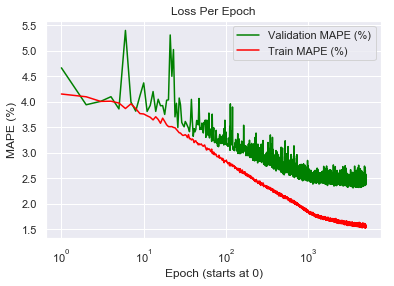

In [103]:
plt.plot(1+np.arange(start, stop), history_data['val_loss'][start:], c='green')
plt.plot(1+np.arange(start, stop), history_data['loss'][start:], c='red')
plt.legend(('Validation MAPE (%)', 'Train MAPE (%)'))
plt.title('Loss Per Epoch')
plt.xlabel('Epoch (starts at {})'.format(start))
plt.ylabel('MAPE (%)')
plt.xscale('log')
#plt.savefig('C:/Users/Nicolas/Documents/Scraping/thecarconnection/mape_epoch.jpg')

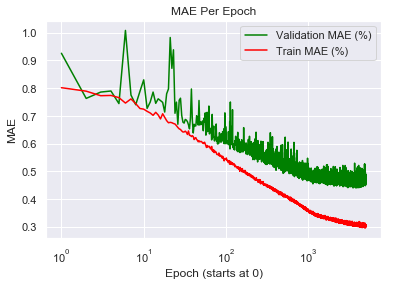

In [110]:
plt.plot(1+np.arange(start, stop), history_data['val_mae'][start:], c='green')
plt.plot(1+np.arange(start, stop), history_data['mae'][start:], c='red')
plt.legend(('Validation MAE (%)', 'Train MAE (%)'))
plt.title('MAE Per Epoch')
plt.xlabel('Epoch (starts at {})'.format(start))
plt.ylabel('MAE')
plt.xscale('log')
#plt.savefig('C:/Users/Nicolas/Documents/Scraping/thecarconnection/mae_epoch.jpg')

##### Plotting the predicted values

In [106]:
# plt.figure(figsize=(12, 5))
plt.scatter(model.predict(X_test), y_test + np.random.rand(len(X_test)), alpha=0.02, 
           c=y_test, cmap='summer') #   c='#6200EE'
plt.xlabel('Predicted Fuel Economy (MPG)')
plt.ylabel('Actual Fuel Economy (MPG)')
plt.title('Predicted vs Actual Fuel Economy - City (MPG)')
plt.xscale('log')

ValueError: Error when checking input: expected dense_9_input to have shape (283,) but got array with shape (80,)

In [73]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                18176     
_________________________________________________________________
dense_10 (Dense)             (None, 20)                1300      
_________________________________________________________________
dense_11 (Dense)             (None, 100)               2100      
_________________________________________________________________
dense_12 (Dense)             (None, 200)               20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 201       
Total params: 41,977
Trainable params: 41,977
Non-trainable params: 0
__________________________________________________

# Predicting Body Style

In [198]:
data['Category'].value_counts()

Car       14085
SUV        8084
Pickup     8022
Van        1046
Name: Category, dtype: int64

In [199]:
car = data.loc[data['Category'] == 'Car'].sample(n=8_000)
suv = data.loc[data['Category'] == 'SUV'].sample(n=8_000)
pickup = data.loc[data['Category'] == 'Pickup'].sample(n=8_000)

In [200]:
df = pd.concat([car, suv, pickup], axis=0, sort=False).sample(frac=1).reset_index(drop=True)

In [205]:
df.drop(['Body Style', 'Style Name', 'Drivetrain'], axis=1).head()

,MSRP,Make,Model,Passenger Capacity,Passenger Doors,EPA Classification,Front Shoulder Room (in),Front Head Room (in),Second Leg Room (in),Front Leg Room (in),...,Rear Wheel Size,Front Wheel Size,Tire Rating,Tire Width Ratio,Wheel Size Ratio,Tire Ratio,Year,Country,Country Code,Category
0,92500.0,Jaguar,F-Type,2.0,2.0,Two Seater,56.50,36.80,35.10,42.80,...,18.0,18.0,Y,1.156863,1.0,3.0,2018.0,UK,5.0,Car
1,48695.0,Cadillac,XTS,5.0,4.0,Special Purpose 2WD,57.89,39.28,40.00,42.85,...,18.0,18.0,R,1.000000,1.0,5.0,2015.0,USA,6.0,Car
2,32645.0,GMC,Sierra 1500,3.0,2.0,None,66.03,42.40,36.54,45.00,...,17.0,17.0,R,1.000000,1.0,7.0,2017.0,USA,6.0,Pickup
3,14900.0,Volkswagen,Golf,5.0,2.0,Compact,53.70,38.50,33.30,41.30,...,15.0,15.0,R,1.000000,1.0,6.0,2000.0,Germany,0.0,Car
4,55500.0,Audi,Q7,7.0,4.0,SUV 4WD,59.50,38.40,38.80,41.70,...,19.0,19.0,H,1.000000,1.0,5.0,2017.0,Germany,0.0,SUV


In [221]:
X = df.loc[:, ['Drivetrain', 'Passenger Capacity', 'Passenger Doors', 'Body Style',
       'EPA Classification', 'Front Shoulder Room (in)',
       'Front Head Room (in)', 'Second Leg Room (in)', 'Front Leg Room (in)',
       'Second Shoulder Room (in)', 'Second Head Room (in)',
       'Height, Overall (in)', 'Wheelbase (in)', 'Width, Max w/o mirrors (in)',
       'Fuel Tank Capacity, Approx (gal)', 'EPA Fuel Economy Est - Hwy (MPG)',
       'EPA Fuel Economy Est - City (MPG)', 'Fuel System',
       'Third Gear Ratio (:1)', 'First Gear Ratio (:1)',
       'Fourth Gear Ratio (:1)', 'Second Gear Ratio (:1)',
       'Front Brake Rotor Diam x Thickness (in)',
       'Rear Brake Rotor Diam x Thickness (in)', 'Steering Type',
       'Turning Diameter - Curb to Curb', 'Rear Wheel Material',
       'Suspension Type - Front', 'Air Bag-Frontal-Driver',
       'Air Bag-Frontal-Passenger', 'Air Bag-Passenger Switch (On/Off)',
       'Air Bag-Side Body-Front', 'Air Bag-Side Body-Rear',
       'Air Bag-Side Head-Front', 'Air Bag-Side Head-Rear', 'Brakes-ABS',
       'Child Safety Rear Door Locks', 'Daytime Running Lights',
       'Traction Control', 'Night Vision', 'Rollover Protection Bars',
       'Fog Lamps', 'Parking Aid', 'Tire Pressure Monitor', 'Back-Up Camera',
       'Stability Control', 'Other Features', 'Basic Miles/km', 'Basic Years',
       'Corrosion Miles/km', 'Corrosion Years', 'Drivetrain Miles/km',
       'Drivetrain Years', 'Roadside Assistance Miles/km',
       'Roadside Assistance Years', 'Hybrid Engine', 'Gears', 'Net Horsepower',
       'Net Horsepower RPM', 'Net Torque', 'Net Torque RPM', 'Cylinders',
       'Engine Configuration', 'Displacement (L)', 'Displacement (cc)',
       'Rear Tire Width', 'Front Tire Width', 'Rear Wheel Size',
       'Front Wheel Size', 'Tire Rating', 'Tire Width Ratio',
       'Wheel Size Ratio', 'Tire Ratio', 'Year', 'Country']]
y = df['Category']

In [222]:
y = OrdinalEncoder().fit_transform(np.array(y).reshape(-1, 1))
y = keras.utils.to_categorical(y, 3)

In [223]:
y[:10]

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [224]:
specs_to_dummies = ['Drivetrain', 'Fuel System', 'Steering Type', 'Rear Wheel Material',
                   'Suspension Type - Front', 'Engine Configuration', 'Tire Rating', 'Country']

In [225]:
for item in specs_to_dummies:
    dummies = pd.get_dummies(X[item], prefix_sep=': ', prefix=item)
    X = X.drop(item, axis=1)
    X = pd.concat([X, dummies], sort=False, axis=1)
X = X.reset_index(drop=True)

In [226]:
specs_to_one_two = ['Air Bag-Frontal-Driver', 'Air Bag-Frontal-Passenger', 'Air Bag-Passenger Switch (On/Off)',
       'Air Bag-Side Body-Front', 'Air Bag-Side Body-Rear', 'Air Bag-Side Head-Front', 'Air Bag-Side Head-Rear', 
       'Brakes-ABS', 'Child Safety Rear Door Locks', 'Daytime Running Lights',
       'Traction Control', 'Night Vision', 'Rollover Protection Bars',
       'Fog Lamps', 'Parking Aid', 'Tire Pressure Monitor', 'Back-Up Camera',
       'Stability Control']

In [227]:
for item in specs_to_one_two:
    dummies = pd.get_dummies(X[item], prefix_sep=': ', prefix=item, drop_first=True)
    X = X.drop(item, axis=1)
    X = pd.concat([X, dummies], sort=False, axis=1)
X = X.reset_index(drop=True)

In [229]:
X.drop(['Body Style', 'EPA Classification', 'Other Features'], axis=1, inplace=True)

In [231]:
X = X.astype('float64')

In [232]:
mm_scaler = MinMaxScaler(feature_range=(0, 1))
X = mm_scaler.fit_transform(X)

In [233]:
model = Sequential()
model.add(Dense(64, input_shape=(X.shape[1],)))
model.add(Dense(100, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dropout(.0001))
model.add(Dense(3, activation='softmax'))

In [234]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [254]:
epochs = 1_000
batch_size = 32
validation_split = 0.1

In [255]:
history = model.fit(X, y, epochs=epochs, batch_size=batch_size, validation_split=validation_split, verbose=2)

Train on 21600 samples, validate on 2400 samples
Epoch 1/1000
21600/21600 - 2s - loss: 0.0065 - accuracy: 0.9981 - val_loss: 0.0051 - val_accuracy: 0.9987
Epoch 2/1000
21600/21600 - 2s - loss: 0.0024 - accuracy: 0.9992 - val_loss: 0.0197 - val_accuracy: 0.9921
Epoch 3/1000
21600/21600 - 2s - loss: 0.0036 - accuracy: 0.9990 - val_loss: 0.0023 - val_accuracy: 0.9996
Epoch 4/1000
21600/21600 - 2s - loss: 9.2949e-04 - accuracy: 0.9996 - val_loss: 0.0017 - val_accuracy: 0.9996
Epoch 5/1000
21600/21600 - 2s - loss: 0.0046 - accuracy: 0.9986 - val_loss: 0.0060 - val_accuracy: 0.9979
Epoch 6/1000
21600/21600 - 2s - loss: 0.0010 - accuracy: 0.9996 - val_loss: 0.0046 - val_accuracy: 0.9987
Epoch 7/1000
21600/21600 - 2s - loss: 8.6645e-04 - accuracy: 0.9996 - val_loss: 0.0026 - val_accuracy: 0.9992
Epoch 8/1000
21600/21600 - 2s - loss: 0.0074 - accuracy: 0.9982 - val_loss: 0.0020 - val_accuracy: 0.9996
Epoch 9/1000
21600/21600 - 2s - loss: 0.0010 - accuracy: 0.9996 - val_loss: 0.0028 - val_accura

Epoch 77/1000
21600/21600 - 2s - loss: 0.0013 - accuracy: 0.9995 - val_loss: 0.0020 - val_accuracy: 0.9996
Epoch 78/1000
21600/21600 - 2s - loss: 0.0027 - accuracy: 0.9990 - val_loss: 0.0106 - val_accuracy: 0.9962
Epoch 79/1000
21600/21600 - 2s - loss: 0.0066 - accuracy: 0.9982 - val_loss: 0.0074 - val_accuracy: 0.9987
Epoch 80/1000
21600/21600 - 2s - loss: 0.0015 - accuracy: 0.9994 - val_loss: 0.0042 - val_accuracy: 0.9987
Epoch 81/1000
21600/21600 - 2s - loss: 0.0043 - accuracy: 0.9987 - val_loss: 0.0042 - val_accuracy: 0.9983
Epoch 82/1000
21600/21600 - 2s - loss: 9.5621e-04 - accuracy: 0.9996 - val_loss: 0.0030 - val_accuracy: 0.9996
Epoch 83/1000
21600/21600 - 2s - loss: 8.5677e-04 - accuracy: 0.9996 - val_loss: 0.0044 - val_accuracy: 0.9987
Epoch 84/1000
21600/21600 - 2s - loss: 0.0060 - accuracy: 0.9987 - val_loss: 0.0066 - val_accuracy: 0.9979
Epoch 85/1000
21600/21600 - 2s - loss: 0.0028 - accuracy: 0.9986 - val_loss: 0.0062 - val_accuracy: 0.9987
Epoch 86/1000
21600/21600 - 2

Epoch 152/1000
21600/21600 - 2s - loss: 9.1985e-04 - accuracy: 0.9995 - val_loss: 0.0031 - val_accuracy: 0.9992
Epoch 153/1000
21600/21600 - 2s - loss: 0.0075 - accuracy: 0.9983 - val_loss: 0.0061 - val_accuracy: 0.9979
Epoch 154/1000
21600/21600 - 2s - loss: 0.0010 - accuracy: 0.9995 - val_loss: 0.0061 - val_accuracy: 0.9983
Epoch 155/1000
21600/21600 - 2s - loss: 0.0012 - accuracy: 0.9995 - val_loss: 0.0042 - val_accuracy: 0.9987
Epoch 156/1000
21600/21600 - 2s - loss: 0.0034 - accuracy: 0.9990 - val_loss: 0.0031 - val_accuracy: 0.9987
Epoch 157/1000
21600/21600 - 2s - loss: 8.8546e-04 - accuracy: 0.9996 - val_loss: 0.0035 - val_accuracy: 0.9992
Epoch 158/1000
21600/21600 - 2s - loss: 8.2189e-04 - accuracy: 0.9997 - val_loss: 0.0038 - val_accuracy: 0.9987
Epoch 159/1000
21600/21600 - 2s - loss: 0.0047 - accuracy: 0.9987 - val_loss: 0.0083 - val_accuracy: 0.9975
Epoch 160/1000
21600/21600 - 2s - loss: 0.0083 - accuracy: 0.9981 - val_loss: 0.0073 - val_accuracy: 0.9975
Epoch 161/1000
2

Epoch 227/1000
21600/21600 - 2s - loss: 0.0036 - accuracy: 0.9989 - val_loss: 0.0030 - val_accuracy: 0.9992
Epoch 228/1000
21600/21600 - 2s - loss: 8.1995e-04 - accuracy: 0.9996 - val_loss: 0.0020 - val_accuracy: 0.9992
Epoch 229/1000
21600/21600 - 2s - loss: 7.4236e-04 - accuracy: 0.9996 - val_loss: 0.0061 - val_accuracy: 0.9987
Epoch 230/1000
21600/21600 - 2s - loss: 9.0293e-04 - accuracy: 0.9996 - val_loss: 0.0040 - val_accuracy: 0.9987
Epoch 231/1000
21600/21600 - 2s - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.0647 - val_accuracy: 0.9933
Epoch 232/1000
21600/21600 - 2s - loss: 0.0057 - accuracy: 0.9987 - val_loss: 0.0012 - val_accuracy: 0.9996
Epoch 233/1000
21600/21600 - 2s - loss: 9.7597e-04 - accuracy: 0.9996 - val_loss: 0.0012 - val_accuracy: 0.9996
Epoch 234/1000
21600/21600 - 2s - loss: 7.5472e-04 - accuracy: 0.9996 - val_loss: 5.6861e-04 - val_accuracy: 1.0000
Epoch 235/1000
21600/21600 - 2s - loss: 8.0495e-04 - accuracy: 0.9996 - val_loss: 7.4349e-04 - val_accuracy: 1.0

Epoch 302/1000
21600/21600 - 2s - loss: 0.0055 - accuracy: 0.9990 - val_loss: 0.0184 - val_accuracy: 0.9967
Epoch 303/1000
21600/21600 - 2s - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0020 - val_accuracy: 0.9992
Epoch 304/1000
21600/21600 - 2s - loss: 8.1565e-04 - accuracy: 0.9996 - val_loss: 0.0039 - val_accuracy: 0.9987
Epoch 305/1000
21600/21600 - 2s - loss: 7.7567e-04 - accuracy: 0.9996 - val_loss: 0.0041 - val_accuracy: 0.9987
Epoch 306/1000
21600/21600 - 2s - loss: 0.0117 - accuracy: 0.9978 - val_loss: 0.0050 - val_accuracy: 0.9987
Epoch 307/1000
21600/21600 - 2s - loss: 0.0013 - accuracy: 0.9995 - val_loss: 0.0080 - val_accuracy: 0.9975
Epoch 308/1000
21600/21600 - 2s - loss: 0.0011 - accuracy: 0.9996 - val_loss: 0.0028 - val_accuracy: 0.9992
Epoch 309/1000
21600/21600 - 2s - loss: 7.6095e-04 - accuracy: 0.9996 - val_loss: 0.0013 - val_accuracy: 0.9996
Epoch 310/1000
21600/21600 - 2s - loss: 7.7732e-04 - accuracy: 0.9996 - val_loss: 0.0062 - val_accuracy: 0.9992
Epoch 311/10

Epoch 377/1000
21600/21600 - 2s - loss: 0.0091 - accuracy: 0.9977 - val_loss: 0.0039 - val_accuracy: 0.9983
Epoch 378/1000
21600/21600 - 2s - loss: 0.0015 - accuracy: 0.9991 - val_loss: 0.0042 - val_accuracy: 0.9983
Epoch 379/1000
21600/21600 - 2s - loss: 0.0014 - accuracy: 0.9991 - val_loss: 0.0380 - val_accuracy: 0.9925
Epoch 380/1000
21600/21600 - 2s - loss: 0.0091 - accuracy: 0.9978 - val_loss: 0.0038 - val_accuracy: 0.9979
Epoch 381/1000
21600/21600 - 2s - loss: 0.0012 - accuracy: 0.9994 - val_loss: 0.0068 - val_accuracy: 0.9979
Epoch 382/1000
21600/21600 - 2s - loss: 9.4971e-04 - accuracy: 0.9996 - val_loss: 0.0029 - val_accuracy: 0.9992
Epoch 383/1000
21600/21600 - 2s - loss: 0.0011 - accuracy: 0.9996 - val_loss: 0.0036 - val_accuracy: 0.9983
Epoch 384/1000
21600/21600 - 2s - loss: 8.4410e-04 - accuracy: 0.9996 - val_loss: 0.0037 - val_accuracy: 0.9992
Epoch 385/1000
21600/21600 - 2s - loss: 9.5808e-04 - accuracy: 0.9996 - val_loss: 0.0035 - val_accuracy: 0.9992
Epoch 386/1000
2

Epoch 452/1000
21600/21600 - 2s - loss: 0.0062 - accuracy: 0.9987 - val_loss: 0.0301 - val_accuracy: 0.9954
Epoch 453/1000
21600/21600 - 2s - loss: 0.0044 - accuracy: 0.9986 - val_loss: 0.0061 - val_accuracy: 0.9987
Epoch 454/1000
21600/21600 - 2s - loss: 8.4650e-04 - accuracy: 0.9996 - val_loss: 0.0071 - val_accuracy: 0.9987
Epoch 455/1000
21600/21600 - 2s - loss: 7.9770e-04 - accuracy: 0.9996 - val_loss: 0.0090 - val_accuracy: 0.9987
Epoch 456/1000
21600/21600 - 2s - loss: 0.0012 - accuracy: 0.9994 - val_loss: 0.0096 - val_accuracy: 0.9979
Epoch 457/1000
21600/21600 - 2s - loss: 0.0041 - accuracy: 0.9990 - val_loss: 0.0117 - val_accuracy: 0.9971
Epoch 458/1000
21600/21600 - 2s - loss: 0.0010 - accuracy: 0.9996 - val_loss: 0.0052 - val_accuracy: 0.9987
Epoch 459/1000
21600/21600 - 2s - loss: 8.6510e-04 - accuracy: 0.9996 - val_loss: 0.0101 - val_accuracy: 0.9983
Epoch 460/1000
21600/21600 - 2s - loss: 7.8111e-04 - accuracy: 0.9996 - val_loss: 0.0112 - val_accuracy: 0.9979
Epoch 461/10

Epoch 527/1000
21600/21600 - 3s - loss: 0.0092 - accuracy: 0.9984 - val_loss: 0.0050 - val_accuracy: 0.9987
Epoch 528/1000
21600/21600 - 3s - loss: 9.6908e-04 - accuracy: 0.9996 - val_loss: 0.0063 - val_accuracy: 0.9983
Epoch 529/1000
21600/21600 - 2s - loss: 7.2193e-04 - accuracy: 0.9996 - val_loss: 0.0053 - val_accuracy: 0.9987
Epoch 530/1000
21600/21600 - 2s - loss: 9.8850e-04 - accuracy: 0.9996 - val_loss: 0.0067 - val_accuracy: 0.9987
Epoch 531/1000
21600/21600 - 2s - loss: 7.5911e-04 - accuracy: 0.9996 - val_loss: 0.0027 - val_accuracy: 0.9992
Epoch 532/1000
21600/21600 - 2s - loss: 0.0058 - accuracy: 0.9987 - val_loss: 0.0065 - val_accuracy: 0.9983
Epoch 533/1000
21600/21600 - 2s - loss: 0.0016 - accuracy: 0.9993 - val_loss: 0.0033 - val_accuracy: 0.9996
Epoch 534/1000
21600/21600 - 2s - loss: 0.0035 - accuracy: 0.9992 - val_loss: 0.0229 - val_accuracy: 0.9921
Epoch 535/1000
21600/21600 - 2s - loss: 0.0162 - accuracy: 0.9978 - val_loss: 0.0032 - val_accuracy: 0.9992
Epoch 536/10

Epoch 602/1000
21600/21600 - 2s - loss: 8.2987e-04 - accuracy: 0.9996 - val_loss: 0.0075 - val_accuracy: 0.9987
Epoch 603/1000
21600/21600 - 2s - loss: 8.8758e-04 - accuracy: 0.9996 - val_loss: 0.0061 - val_accuracy: 0.9987
Epoch 604/1000
21600/21600 - 2s - loss: 0.0102 - accuracy: 0.9983 - val_loss: 0.0055 - val_accuracy: 0.9987
Epoch 605/1000
21600/21600 - 2s - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.0036 - val_accuracy: 0.9987
Epoch 606/1000
21600/21600 - 2s - loss: 8.2505e-04 - accuracy: 0.9996 - val_loss: 0.0061 - val_accuracy: 0.9979
Epoch 607/1000
21600/21600 - 2s - loss: 8.4969e-04 - accuracy: 0.9996 - val_loss: 0.0064 - val_accuracy: 0.9979
Epoch 608/1000
21600/21600 - 2s - loss: 8.6327e-04 - accuracy: 0.9996 - val_loss: 0.0076 - val_accuracy: 0.9979
Epoch 609/1000
21600/21600 - 2s - loss: 0.0011 - accuracy: 0.9996 - val_loss: 0.0089 - val_accuracy: 0.9975
Epoch 610/1000
21600/21600 - 2s - loss: 8.0287e-04 - accuracy: 0.9996 - val_loss: 0.0048 - val_accuracy: 0.9992
Epoc

Epoch 676/1000
21600/21600 - 2s - loss: 7.7509e-04 - accuracy: 0.9996 - val_loss: 0.0025 - val_accuracy: 0.9992
Epoch 677/1000
21600/21600 - 2s - loss: 7.7504e-04 - accuracy: 0.9996 - val_loss: 0.0034 - val_accuracy: 0.9992
Epoch 678/1000
21600/21600 - 2s - loss: 8.5281e-04 - accuracy: 0.9996 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 679/1000
21600/21600 - 2s - loss: 0.0130 - accuracy: 0.9971 - val_loss: 0.0038 - val_accuracy: 0.9987
Epoch 680/1000
21600/21600 - 2s - loss: 0.0014 - accuracy: 0.9994 - val_loss: 0.0080 - val_accuracy: 0.9987
Epoch 681/1000
21600/21600 - 2s - loss: 8.1681e-04 - accuracy: 0.9996 - val_loss: 0.0054 - val_accuracy: 0.9992
Epoch 682/1000
21600/21600 - 2s - loss: 8.2854e-04 - accuracy: 0.9996 - val_loss: 0.0081 - val_accuracy: 0.9987
Epoch 683/1000
21600/21600 - 2s - loss: 8.0379e-04 - accuracy: 0.9996 - val_loss: 0.0081 - val_accuracy: 0.9987
Epoch 684/1000
21600/21600 - 2s - loss: 8.9897e-04 - accuracy: 0.9996 - val_loss: 0.0087 - val_accuracy: 0.9987


21600/21600 - 2s - loss: 0.0078 - accuracy: 0.9983 - val_loss: 0.0040 - val_accuracy: 0.9983
Epoch 751/1000
21600/21600 - 2s - loss: 9.7859e-04 - accuracy: 0.9995 - val_loss: 0.0045 - val_accuracy: 0.9983
Epoch 752/1000
21600/21600 - 2s - loss: 9.4942e-04 - accuracy: 0.9995 - val_loss: 0.0040 - val_accuracy: 0.9987
Epoch 753/1000
21600/21600 - 2s - loss: 9.0432e-04 - accuracy: 0.9995 - val_loss: 0.0048 - val_accuracy: 0.9979
Epoch 754/1000
21600/21600 - 2s - loss: 0.0010 - accuracy: 0.9995 - val_loss: 0.0048 - val_accuracy: 0.9983
Epoch 755/1000
21600/21600 - 2s - loss: 8.9787e-04 - accuracy: 0.9995 - val_loss: 0.0043 - val_accuracy: 0.9983
Epoch 756/1000
21600/21600 - 2s - loss: 0.0063 - accuracy: 0.9984 - val_loss: 0.0669 - val_accuracy: 0.9892
Epoch 757/1000
21600/21600 - 2s - loss: 0.0074 - accuracy: 0.9985 - val_loss: 0.0084 - val_accuracy: 0.9975
Epoch 758/1000
21600/21600 - 2s - loss: 9.7515e-04 - accuracy: 0.9996 - val_loss: 0.0072 - val_accuracy: 0.9987
Epoch 759/1000
21600/21

Epoch 825/1000
21600/21600 - 3s - loss: 7.6404e-04 - accuracy: 0.9996 - val_loss: 0.0156 - val_accuracy: 0.9983
Epoch 826/1000
21600/21600 - 3s - loss: 7.6346e-04 - accuracy: 0.9996 - val_loss: 0.0168 - val_accuracy: 0.9983
Epoch 827/1000
21600/21600 - 3s - loss: 7.8600e-04 - accuracy: 0.9996 - val_loss: 0.0123 - val_accuracy: 0.9967
Epoch 828/1000
21600/21600 - 3s - loss: 0.0124 - accuracy: 0.9979 - val_loss: 0.0066 - val_accuracy: 0.9987
Epoch 829/1000
21600/21600 - 3s - loss: 9.1919e-04 - accuracy: 0.9996 - val_loss: 0.0051 - val_accuracy: 0.9987
Epoch 830/1000
21600/21600 - 3s - loss: 8.9722e-04 - accuracy: 0.9996 - val_loss: 0.0035 - val_accuracy: 0.9992
Epoch 831/1000
21600/21600 - 3s - loss: 7.9242e-04 - accuracy: 0.9996 - val_loss: 0.0046 - val_accuracy: 0.9987
Epoch 832/1000
21600/21600 - 3s - loss: 8.2396e-04 - accuracy: 0.9996 - val_loss: 0.0082 - val_accuracy: 0.9983
Epoch 833/1000
21600/21600 - 3s - loss: 9.4767e-04 - accuracy: 0.9996 - val_loss: 0.0037 - val_accuracy: 0.9

21600/21600 - 3s - loss: 7.7852e-04 - accuracy: 0.9996 - val_loss: 0.0054 - val_accuracy: 0.9983
Epoch 900/1000
21600/21600 - 3s - loss: 7.6743e-04 - accuracy: 0.9996 - val_loss: 0.0049 - val_accuracy: 0.9992
Epoch 901/1000
21600/21600 - 3s - loss: 0.0091 - accuracy: 0.9987 - val_loss: 0.0015 - val_accuracy: 0.9996
Epoch 902/1000
21600/21600 - 3s - loss: 8.9740e-04 - accuracy: 0.9996 - val_loss: 0.0015 - val_accuracy: 0.9996
Epoch 903/1000
21600/21600 - 3s - loss: 8.6767e-04 - accuracy: 0.9995 - val_loss: 0.0029 - val_accuracy: 0.9992
Epoch 904/1000
21600/21600 - 3s - loss: 8.1476e-04 - accuracy: 0.9996 - val_loss: 0.0029 - val_accuracy: 0.9992
Epoch 905/1000
21600/21600 - 3s - loss: 7.8416e-04 - accuracy: 0.9996 - val_loss: 0.0030 - val_accuracy: 0.9992
Epoch 906/1000
21600/21600 - 3s - loss: 7.9184e-04 - accuracy: 0.9996 - val_loss: 0.0073 - val_accuracy: 0.9983
Epoch 907/1000
21600/21600 - 3s - loss: 0.0048 - accuracy: 0.9989 - val_loss: 0.0109 - val_accuracy: 0.9983
Epoch 908/1000


Epoch 973/1000
21600/21600 - 2s - loss: 0.0025 - accuracy: 0.9990 - val_loss: 0.0023 - val_accuracy: 0.9992
Epoch 974/1000
21600/21600 - 1s - loss: 9.9818e-04 - accuracy: 0.9996 - val_loss: 0.0057 - val_accuracy: 0.9983
Epoch 975/1000
21600/21600 - 1s - loss: 7.9815e-04 - accuracy: 0.9996 - val_loss: 0.0033 - val_accuracy: 0.9983
Epoch 976/1000
21600/21600 - 1s - loss: 7.8637e-04 - accuracy: 0.9996 - val_loss: 0.0073 - val_accuracy: 0.9983
Epoch 977/1000
21600/21600 - 1s - loss: 8.6456e-04 - accuracy: 0.9996 - val_loss: 0.0117 - val_accuracy: 0.9983
Epoch 978/1000
21600/21600 - 1s - loss: 7.5831e-04 - accuracy: 0.9996 - val_loss: 0.0166 - val_accuracy: 0.9983
Epoch 979/1000
21600/21600 - 1s - loss: 7.4914e-04 - accuracy: 0.9996 - val_loss: 0.0181 - val_accuracy: 0.9983
Epoch 980/1000
21600/21600 - 1s - loss: 0.0077 - accuracy: 0.9987 - val_loss: 0.0058 - val_accuracy: 0.9979
Epoch 981/1000
21600/21600 - 1s - loss: 0.0043 - accuracy: 0.9992 - val_loss: 0.0221 - val_accuracy: 0.9983
Epoc

In [256]:
print('highest accuracy: {}'.format(max(history.history['val_accuracy']))) 
print('lowest loss: {}'.format(min(history.history['val_loss'])))

highest accuracy: 1.0
lowest loss: 0.0005474840644989835


In [257]:
history_cat = pd.DataFrame(history.history)
history_cat.to_csv('C:/Users/Nicolas/Documents/Scraping/thecarconnection/history_cat.csv', index=None)
history_cat = pd.read_csv('C:/Users/Nicolas/Documents/Scraping/thecarconnection/history_cat.csv')
history_cat.index += 1
history_cat.head()

,loss,accuracy,val_loss,val_accuracy
1,0.006522,0.998102,0.005055,0.998750
2,0.002357,0.999167,0.019708,0.992083
3,0.003560,0.998981,0.002318,0.999583
4,0.000929,0.999630,0.001721,0.999583
5,0.004640,0.998565,0.006000,0.997917


In [258]:
start = 0
stop = history_cat.shape[0]

Text(0, 0.5, 'Accuracy (%)')

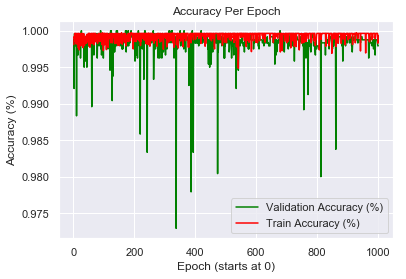

In [259]:
plt.plot(1+np.arange(start, stop), history_cat['val_accuracy'][start:], c='green')
plt.plot(1+np.arange(start, stop), history_cat['accuracy'][start:], c='red')
plt.legend(('Validation Accuracy (%)', 'Train Accuracy (%)'))
plt.title('Accuracy Per Epoch')
plt.xlabel('Epoch (starts at {})'.format(start))
plt.ylabel('Accuracy (%)')
# plt.xscale('log')
#plt.savefig('C:/Users/Nicolas/Documents/Scraping/thecarconnection/mape_epoch.jpg')

Text(0, 0.5, 'Loss')

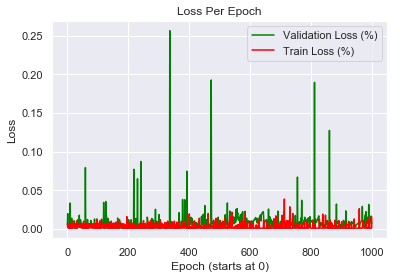

In [260]:
plt.plot(1+np.arange(start, stop), history_cat['val_loss'][start:], 'green')
plt.plot(1+np.arange(start, stop), history_cat['loss'][start:], c='red')
plt.legend(('Validation Loss (%)', 'Train Loss (%)'))
plt.title('Loss Per Epoch')
plt.xlabel('Epoch (starts at {})'.format(start))
plt.ylabel('Loss')
#plt.xscale('log')
#plt.savefig('C:/Users/Nicolas/Documents/Scraping/thecarconnection/mae_epoch.jpg')

# Predicting `MSRP`

#### Picking the features

In [8]:
x = dataset.loc[:, ['Drivetrain', 'Passenger Capacity', 'Passenger Doors', 'Body Style',
       'EPA Classification', 'Front Shoulder Room (in)',
       'Front Head Room (in)', 'Second Leg Room (in)', 'Front Leg Room (in)',
       'Second Shoulder Room (in)', 'Second Head Room (in)',
       'Height, Overall (in)', 'Wheelbase (in)', 'Width, Max w/o mirrors (in)',
       'Fuel Tank Capacity, Approx (gal)', 'EPA Fuel Economy Est - Hwy (MPG)',
       'EPA Fuel Economy Est - City (MPG)', 'Fuel System',
       'Third Gear Ratio (:1)', 'First Gear Ratio (:1)',
       'Fourth Gear Ratio (:1)', 'Second Gear Ratio (:1)',
       'Front Brake Rotor Diam x Thickness (in)',
       'Rear Brake Rotor Diam x Thickness (in)', 'Steering Type',
       'Turning Diameter - Curb to Curb', 'Rear Wheel Material',
       'Suspension Type - Front', 'Air Bag-Frontal-Driver',
       'Air Bag-Frontal-Passenger', 'Air Bag-Passenger Switch (On/Off)',
       'Air Bag-Side Body-Front', 'Air Bag-Side Body-Rear',
       'Air Bag-Side Head-Front', 'Air Bag-Side Head-Rear', 'Brakes-ABS',
       'Child Safety Rear Door Locks', 'Daytime Running Lights',
       'Traction Control', 'Night Vision', 'Rollover Protection Bars',
       'Fog Lamps', 'Parking Aid', 'Tire Pressure Monitor', 'Back-Up Camera',
       'Stability Control', 'Other Features', 'Basic Miles/km', 'Basic Years',
       'Corrosion Miles/km', 'Corrosion Years', 'Drivetrain Miles/km',
       'Drivetrain Years', 'Roadside Assistance Miles/km',
       'Roadside Assistance Years', 'Hybrid Engine', 'Gears', 'Net Horsepower',
       'Net Horsepower RPM', 'Net Torque', 'Net Torque RPM', 'Cylinders',
       'Engine Configuration', 'Displacement (L)', 'Displacement (cc)',
       'Rear Tire Width', 'Front Tire Width', 'Rear Wheel Size',
       'Front Wheel Size', 'Tire Rating', 'Tire Width Ratio',
       'Wheel Size Ratio', 'Tire Ratio', 'Year', 'Country',
       'Category', 'Make']] # make was added

In [9]:
y = dataset['MSRP']

#### Encoding dummy variables

In [10]:
specs_to_dummies = ['Drivetrain', 'Fuel System', 'Steering Type', 'Rear Wheel Material',
                   'Suspension Type - Front', 'Engine Configuration', 'Tire Rating', 'Country',
                   'Category', 'Make']

for item in specs_to_dummies:
    dummies = pd.get_dummies(x[item], prefix_sep=': ', prefix=item)
    x = x.drop(item, axis=1)
    x = pd.concat([x, dummies], sort=False, axis=1)
x = x.reset_index(drop=True)

specs_to_one_two = ['Air Bag-Frontal-Driver', 'Air Bag-Frontal-Passenger', 'Air Bag-Passenger Switch (On/Off)',
       'Air Bag-Side Body-Front', 'Air Bag-Side Body-Rear', 'Air Bag-Side Head-Front', 'Air Bag-Side Head-Rear', 
       'Brakes-ABS', 'Child Safety Rear Door Locks', 'Daytime Running Lights',
       'Traction Control', 'Night Vision', 'Rollover Protection Bars',
       'Fog Lamps', 'Parking Aid', 'Tire Pressure Monitor', 'Back-Up Camera',
       'Stability Control']

for item in specs_to_one_two:
    dummies = pd.get_dummies(x[item], prefix_sep=': ', prefix=item, drop_first=True)
    x = x.drop(item, axis=1)
    x = pd.concat([x, dummies], sort=False, axis=1)
x = x.reset_index(drop=True)

x.drop(['Body Style', 'EPA Classification', 'Other Features'], axis=1, inplace=True)

#### Scaling between 0 and 1

In [11]:
mm_scaler = MinMaxScaler()
x = x.astype('float64')
x = mm_scaler.fit_transform(x)

#### Building the model

In [12]:
model = Sequential()
model.add(Dense(150, input_shape=(x.shape[1],)))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.001)) # try 0.2
model.add(Dense(300, activation='elu'))
model.add(Dense(1, activation='linear'))

#### Compiling the model

In [13]:
model.compile(optimizer='adam', loss='mean_absolute_percentage_error', metrics=['mae'])

#### Model settings

In [14]:
epochs = 5_000
batch_size = 32
validation_split = 0.1

#### Training the model

In [15]:
history = model.fit(x, y, epochs=epochs, batch_size=batch_size, validation_split=validation_split, 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=2e2)], verbose=2)

Train on 28113 samples, validate on 3124 samples
Epoch 1/5000
28113/28113 - 3s - loss: 21.8173 - mae: 12383.7090 - val_loss: 12.2193 - val_mae: 8734.1064
Epoch 2/5000
28113/28113 - 3s - loss: 11.5187 - mae: 7700.2217 - val_loss: 11.2610 - val_mae: 7952.6401
Epoch 3/5000
28113/28113 - 3s - loss: 10.9496 - mae: 7209.8745 - val_loss: 10.9867 - val_mae: 7628.5059
Epoch 4/5000
28113/28113 - 2s - loss: 10.6316 - mae: 6896.4443 - val_loss: 10.7803 - val_mae: 7189.8970
Epoch 5/5000
28113/28113 - 2s - loss: 10.4497 - mae: 6702.4712 - val_loss: 10.4044 - val_mae: 7055.1240
Epoch 6/5000
28113/28113 - 3s - loss: 10.3191 - mae: 6574.3428 - val_loss: 10.3019 - val_mae: 6980.3789
Epoch 7/5000
28113/28113 - 2s - loss: 10.2270 - mae: 6439.1172 - val_loss: 10.1716 - val_mae: 6844.7759
Epoch 8/5000
28113/28113 - 2s - loss: 10.1823 - mae: 6346.2935 - val_loss: 10.1423 - val_mae: 6713.7104
Epoch 9/5000
28113/28113 - 3s - loss: 10.0904 - mae: 6245.6826 - val_loss: 10.0359 - val_mae: 6640.3374
Epoch 10/5000


Epoch 80/5000
28113/28113 - 3s - loss: 8.0829 - mae: 4249.4863 - val_loss: 8.3328 - val_mae: 4503.7236
Epoch 81/5000
28113/28113 - 3s - loss: 8.0382 - mae: 4219.8013 - val_loss: 8.0954 - val_mae: 4526.9961
Epoch 82/5000
28113/28113 - 3s - loss: 7.9767 - mae: 4184.7925 - val_loss: 7.9452 - val_mae: 4463.2134
Epoch 83/5000
28113/28113 - 3s - loss: 7.8897 - mae: 4145.6470 - val_loss: 7.8800 - val_mae: 4435.0146
Epoch 84/5000
28113/28113 - 3s - loss: 7.8629 - mae: 4132.5093 - val_loss: 7.8589 - val_mae: 4352.2969
Epoch 85/5000
28113/28113 - 3s - loss: 7.8341 - mae: 4115.3447 - val_loss: 7.7698 - val_mae: 4371.4780
Epoch 86/5000
28113/28113 - 3s - loss: 7.7648 - mae: 4096.2251 - val_loss: 8.0963 - val_mae: 4350.9009
Epoch 87/5000
28113/28113 - 3s - loss: 7.7308 - mae: 4071.9070 - val_loss: 7.7240 - val_mae: 4347.3408
Epoch 88/5000
28113/28113 - 2s - loss: 7.7118 - mae: 4069.5764 - val_loss: 7.6702 - val_mae: 4287.8794
Epoch 89/5000
28113/28113 - 3s - loss: 7.6467 - mae: 4041.9277 - val_loss

Epoch 159/5000
28113/28113 - 2s - loss: 5.6507 - mae: 2858.5356 - val_loss: 6.2507 - val_mae: 3317.6604
Epoch 160/5000
28113/28113 - 2s - loss: 5.6637 - mae: 2852.6294 - val_loss: 6.2555 - val_mae: 3309.3347
Epoch 161/5000
28113/28113 - 2s - loss: 5.6352 - mae: 2838.8926 - val_loss: 6.1065 - val_mae: 3310.4709
Epoch 162/5000
28113/28113 - 3s - loss: 5.5919 - mae: 2825.2629 - val_loss: 6.7345 - val_mae: 3514.2502
Epoch 163/5000
28113/28113 - 3s - loss: 5.5766 - mae: 2811.4751 - val_loss: 6.0870 - val_mae: 3280.6636
Epoch 164/5000
28113/28113 - 3s - loss: 5.5845 - mae: 2806.2659 - val_loss: 6.2268 - val_mae: 3396.9463
Epoch 165/5000
28113/28113 - 2s - loss: 5.5633 - mae: 2807.6770 - val_loss: 5.9580 - val_mae: 3257.9897
Epoch 166/5000
28113/28113 - 2s - loss: 5.5277 - mae: 2787.1541 - val_loss: 6.0114 - val_mae: 3223.0608
Epoch 167/5000
28113/28113 - 2s - loss: 5.5180 - mae: 2779.7832 - val_loss: 6.0170 - val_mae: 3253.9087
Epoch 168/5000
28113/28113 - 2s - loss: 5.5308 - mae: 2780.3105 

Epoch 238/5000
28113/28113 - 2s - loss: 4.7975 - mae: 2449.3462 - val_loss: 5.4492 - val_mae: 2954.9878
Epoch 239/5000
28113/28113 - 2s - loss: 4.7794 - mae: 2445.6384 - val_loss: 5.3704 - val_mae: 2984.7136
Epoch 240/5000
28113/28113 - 2s - loss: 4.7808 - mae: 2446.3091 - val_loss: 5.3119 - val_mae: 2952.3848
Epoch 241/5000
28113/28113 - 2s - loss: 4.7495 - mae: 2434.5645 - val_loss: 5.5144 - val_mae: 3064.4612
Epoch 242/5000
28113/28113 - 3s - loss: 4.7433 - mae: 2435.4802 - val_loss: 5.3225 - val_mae: 2911.8818
Epoch 243/5000
28113/28113 - 3s - loss: 4.7443 - mae: 2431.0254 - val_loss: 5.3433 - val_mae: 2890.0166
Epoch 244/5000
28113/28113 - 3s - loss: 4.7432 - mae: 2432.0557 - val_loss: 5.4292 - val_mae: 2992.6277
Epoch 245/5000
28113/28113 - 3s - loss: 4.7237 - mae: 2426.7412 - val_loss: 5.3134 - val_mae: 2884.8665
Epoch 246/5000
28113/28113 - 2s - loss: 4.7128 - mae: 2419.4292 - val_loss: 5.3112 - val_mae: 2907.8159
Epoch 247/5000
28113/28113 - 2s - loss: 4.7298 - mae: 2430.6235 

Epoch 317/5000
28113/28113 - 2s - loss: 4.2304 - mae: 2214.4312 - val_loss: 4.9444 - val_mae: 2751.8870
Epoch 318/5000
28113/28113 - 2s - loss: 4.2295 - mae: 2213.9646 - val_loss: 4.9415 - val_mae: 2689.3960
Epoch 319/5000
28113/28113 - 2s - loss: 4.2354 - mae: 2211.7410 - val_loss: 4.9010 - val_mae: 2712.2205
Epoch 320/5000
28113/28113 - 2s - loss: 4.2195 - mae: 2211.6785 - val_loss: 4.9078 - val_mae: 2713.7378
Epoch 321/5000
28113/28113 - 2s - loss: 4.2301 - mae: 2217.8984 - val_loss: 4.8634 - val_mae: 2700.0574
Epoch 322/5000
28113/28113 - 2s - loss: 4.2075 - mae: 2207.6643 - val_loss: 4.9551 - val_mae: 2718.5339
Epoch 323/5000
28113/28113 - 2s - loss: 4.2129 - mae: 2216.6777 - val_loss: 4.9417 - val_mae: 2729.9504
Epoch 324/5000
28113/28113 - 2s - loss: 4.1884 - mae: 2200.6926 - val_loss: 4.8565 - val_mae: 2718.0093
Epoch 325/5000
28113/28113 - 2s - loss: 4.1804 - mae: 2197.8623 - val_loss: 4.9102 - val_mae: 2715.0234
Epoch 326/5000
28113/28113 - 2s - loss: 4.2001 - mae: 2205.6643 

Epoch 396/5000
28113/28113 - 3s - loss: 3.8525 - mae: 2024.4744 - val_loss: 4.6470 - val_mae: 2519.6272
Epoch 397/5000
28113/28113 - 2s - loss: 3.8274 - mae: 2011.8600 - val_loss: 4.6585 - val_mae: 2523.1392
Epoch 398/5000
28113/28113 - 3s - loss: 3.8752 - mae: 2033.6998 - val_loss: 4.5559 - val_mae: 2510.0703
Epoch 399/5000
28113/28113 - 2s - loss: 3.8496 - mae: 2022.1849 - val_loss: 4.5842 - val_mae: 2492.9658
Epoch 400/5000
28113/28113 - 3s - loss: 3.8243 - mae: 2007.4921 - val_loss: 4.6923 - val_mae: 2589.9353
Epoch 401/5000
28113/28113 - 2s - loss: 3.8273 - mae: 2011.6193 - val_loss: 4.6458 - val_mae: 2542.8091
Epoch 402/5000
28113/28113 - 3s - loss: 3.8062 - mae: 2001.8925 - val_loss: 4.6690 - val_mae: 2532.4304
Epoch 403/5000
28113/28113 - 2s - loss: 3.8469 - mae: 2011.3779 - val_loss: 4.6112 - val_mae: 2520.0286
Epoch 404/5000
28113/28113 - 2s - loss: 3.8460 - mae: 2009.8805 - val_loss: 4.5447 - val_mae: 2508.6499
Epoch 405/5000
28113/28113 - 2s - loss: 3.8223 - mae: 2006.0746 

Epoch 475/5000
28113/28113 - 2s - loss: 3.5419 - mae: 1810.9630 - val_loss: 4.3101 - val_mae: 2286.3840
Epoch 476/5000
28113/28113 - 3s - loss: 3.5498 - mae: 1817.5398 - val_loss: 4.4287 - val_mae: 2311.1604
Epoch 477/5000
28113/28113 - 3s - loss: 3.5606 - mae: 1821.5682 - val_loss: 4.3906 - val_mae: 2329.5498
Epoch 478/5000
28113/28113 - 3s - loss: 3.5399 - mae: 1806.1234 - val_loss: 4.3143 - val_mae: 2274.2463
Epoch 479/5000
28113/28113 - 2s - loss: 3.5308 - mae: 1808.3163 - val_loss: 4.3698 - val_mae: 2299.7805
Epoch 480/5000
28113/28113 - 2s - loss: 3.5334 - mae: 1806.7736 - val_loss: 4.4196 - val_mae: 2304.7371
Epoch 481/5000
28113/28113 - 2s - loss: 3.5327 - mae: 1809.5638 - val_loss: 4.2672 - val_mae: 2253.9043
Epoch 482/5000
28113/28113 - 2s - loss: 3.5213 - mae: 1801.6171 - val_loss: 4.4788 - val_mae: 2299.1323
Epoch 483/5000
28113/28113 - 2s - loss: 3.5067 - mae: 1794.9250 - val_loss: 4.4269 - val_mae: 2313.1448
Epoch 484/5000
28113/28113 - 2s - loss: 3.5107 - mae: 1791.5170 

Epoch 554/5000
28113/28113 - 2s - loss: 3.3469 - mae: 1697.7443 - val_loss: 4.1905 - val_mae: 2196.2725
Epoch 555/5000
28113/28113 - 2s - loss: 3.3502 - mae: 1697.9550 - val_loss: 4.2891 - val_mae: 2216.8772
Epoch 556/5000
28113/28113 - 3s - loss: 3.3195 - mae: 1687.1210 - val_loss: 4.2441 - val_mae: 2186.5852
Epoch 557/5000
28113/28113 - 2s - loss: 3.3632 - mae: 1702.0066 - val_loss: 4.1741 - val_mae: 2160.9133
Epoch 558/5000
28113/28113 - 2s - loss: 3.3311 - mae: 1696.7875 - val_loss: 4.1820 - val_mae: 2184.5342
Epoch 559/5000
28113/28113 - 2s - loss: 3.3277 - mae: 1686.9497 - val_loss: 4.2779 - val_mae: 2202.1829
Epoch 560/5000
28113/28113 - 3s - loss: 3.3230 - mae: 1683.6226 - val_loss: 4.2772 - val_mae: 2198.3196
Epoch 561/5000
28113/28113 - 3s - loss: 3.3354 - mae: 1685.3793 - val_loss: 4.1841 - val_mae: 2184.0999
Epoch 562/5000
28113/28113 - 3s - loss: 3.3275 - mae: 1686.5370 - val_loss: 4.2016 - val_mae: 2198.8818
Epoch 563/5000
28113/28113 - 3s - loss: 3.3354 - mae: 1693.4250 

Epoch 633/5000
28113/28113 - 3s - loss: 3.2087 - mae: 1618.4141 - val_loss: 4.0912 - val_mae: 2115.2092
Epoch 634/5000
28113/28113 - 3s - loss: 3.1954 - mae: 1616.6539 - val_loss: 4.1450 - val_mae: 2134.5388
Epoch 635/5000
28113/28113 - 3s - loss: 3.1982 - mae: 1612.9015 - val_loss: 4.0947 - val_mae: 2105.1299
Epoch 636/5000
28113/28113 - 2s - loss: 3.1814 - mae: 1609.2783 - val_loss: 4.1200 - val_mae: 2123.7090
Epoch 637/5000
28113/28113 - 2s - loss: 3.2085 - mae: 1611.9237 - val_loss: 4.0942 - val_mae: 2126.0500
Epoch 638/5000
28113/28113 - 2s - loss: 3.1949 - mae: 1608.2039 - val_loss: 4.2578 - val_mae: 2212.7576
Epoch 639/5000
28113/28113 - 2s - loss: 3.2214 - mae: 1618.4646 - val_loss: 4.2760 - val_mae: 2147.0532
Epoch 640/5000
28113/28113 - 2s - loss: 3.2060 - mae: 1619.9745 - val_loss: 4.0621 - val_mae: 2101.7568
Epoch 641/5000
28113/28113 - 2s - loss: 3.2016 - mae: 1610.1803 - val_loss: 4.0813 - val_mae: 2124.8381
Epoch 642/5000
28113/28113 - 2s - loss: 3.1886 - mae: 1599.4037 

Epoch 712/5000
28113/28113 - 3s - loss: 3.1014 - mae: 1557.4155 - val_loss: 4.0375 - val_mae: 2104.8486
Epoch 713/5000
28113/28113 - 3s - loss: 3.0964 - mae: 1558.8832 - val_loss: 4.0772 - val_mae: 2096.5781
Epoch 714/5000
28113/28113 - 2s - loss: 3.0985 - mae: 1563.2509 - val_loss: 4.0616 - val_mae: 2099.0796
Epoch 715/5000
28113/28113 - 3s - loss: 3.0931 - mae: 1554.3252 - val_loss: 4.0607 - val_mae: 2090.5042
Epoch 716/5000
28113/28113 - 3s - loss: 3.1079 - mae: 1561.7015 - val_loss: 4.0194 - val_mae: 2076.8757
Epoch 717/5000
28113/28113 - 3s - loss: 3.0910 - mae: 1556.2965 - val_loss: 4.0595 - val_mae: 2081.8630
Epoch 718/5000
28113/28113 - 3s - loss: 3.0981 - mae: 1559.8334 - val_loss: 4.1195 - val_mae: 2120.5198
Epoch 719/5000
28113/28113 - 3s - loss: 3.0961 - mae: 1560.3899 - val_loss: 4.0088 - val_mae: 2079.8074
Epoch 720/5000
28113/28113 - 3s - loss: 3.0821 - mae: 1555.7228 - val_loss: 4.0543 - val_mae: 2095.4053
Epoch 721/5000
28113/28113 - 3s - loss: 3.0866 - mae: 1553.3318 

Epoch 791/5000
28113/28113 - 3s - loss: 3.0114 - mae: 1507.1982 - val_loss: 3.9780 - val_mae: 2020.8750
Epoch 792/5000
28113/28113 - 2s - loss: 3.0098 - mae: 1504.5593 - val_loss: 4.0067 - val_mae: 2047.1172
Epoch 793/5000
28113/28113 - 2s - loss: 3.0064 - mae: 1504.6626 - val_loss: 3.9972 - val_mae: 2057.0647
Epoch 794/5000
28113/28113 - 2s - loss: 3.0064 - mae: 1508.4139 - val_loss: 3.9882 - val_mae: 2037.2742
Epoch 795/5000
28113/28113 - 3s - loss: 2.9883 - mae: 1504.4729 - val_loss: 4.0001 - val_mae: 2040.4182
Epoch 796/5000
28113/28113 - 2s - loss: 3.0180 - mae: 1511.0729 - val_loss: 4.0445 - val_mae: 2067.5232
Epoch 797/5000
28113/28113 - 3s - loss: 3.0031 - mae: 1506.4884 - val_loss: 3.9916 - val_mae: 2055.5447
Epoch 798/5000
28113/28113 - 3s - loss: 3.0083 - mae: 1507.6510 - val_loss: 3.9478 - val_mae: 2022.1711
Epoch 799/5000
28113/28113 - 2s - loss: 2.9949 - mae: 1497.8586 - val_loss: 4.0297 - val_mae: 2065.9575
Epoch 800/5000
28113/28113 - 2s - loss: 2.9965 - mae: 1503.5109 

Epoch 870/5000
28113/28113 - 3s - loss: 2.9300 - mae: 1457.4117 - val_loss: 3.9297 - val_mae: 2002.0781
Epoch 871/5000
28113/28113 - 3s - loss: 2.9122 - mae: 1453.9097 - val_loss: 4.0229 - val_mae: 2022.9883
Epoch 872/5000
28113/28113 - 2s - loss: 2.9240 - mae: 1454.5662 - val_loss: 3.9613 - val_mae: 1998.4286
Epoch 873/5000
28113/28113 - 2s - loss: 2.9461 - mae: 1466.6158 - val_loss: 3.8914 - val_mae: 2005.1730
Epoch 874/5000
28113/28113 - 2s - loss: 2.9097 - mae: 1450.3151 - val_loss: 4.0142 - val_mae: 2042.0232
Epoch 875/5000
28113/28113 - 2s - loss: 2.9056 - mae: 1449.7776 - val_loss: 4.0226 - val_mae: 2058.7544
Epoch 876/5000
28113/28113 - 2s - loss: 2.9065 - mae: 1448.3705 - val_loss: 3.9312 - val_mae: 1997.6631
Epoch 877/5000
28113/28113 - 3s - loss: 2.9117 - mae: 1451.4888 - val_loss: 3.9903 - val_mae: 2027.9741
Epoch 878/5000
28113/28113 - 2s - loss: 2.9004 - mae: 1445.5779 - val_loss: 4.0017 - val_mae: 1996.0012
Epoch 879/5000
28113/28113 - 2s - loss: 2.9078 - mae: 1455.0648 

Epoch 949/5000
28113/28113 - 3s - loss: 2.8354 - mae: 1396.0446 - val_loss: 3.8770 - val_mae: 1971.3888
Epoch 950/5000
28113/28113 - 2s - loss: 2.8302 - mae: 1398.7009 - val_loss: 3.9535 - val_mae: 1956.7095
Epoch 951/5000
28113/28113 - 2s - loss: 2.8351 - mae: 1394.8492 - val_loss: 3.8324 - val_mae: 1922.9320
Epoch 952/5000
28113/28113 - 2s - loss: 2.8229 - mae: 1387.8822 - val_loss: 3.9192 - val_mae: 1960.3571
Epoch 953/5000
28113/28113 - 2s - loss: 2.8412 - mae: 1400.6738 - val_loss: 3.8738 - val_mae: 1959.3745
Epoch 954/5000
28113/28113 - 2s - loss: 2.8257 - mae: 1387.0459 - val_loss: 3.8441 - val_mae: 1913.4738
Epoch 955/5000
28113/28113 - 2s - loss: 2.8457 - mae: 1406.0219 - val_loss: 4.0154 - val_mae: 1951.2780
Epoch 956/5000
28113/28113 - 2s - loss: 2.8489 - mae: 1400.3071 - val_loss: 3.9306 - val_mae: 1981.9662
Epoch 957/5000
28113/28113 - 2s - loss: 2.8348 - mae: 1395.9680 - val_loss: 3.8493 - val_mae: 1931.8422
Epoch 958/5000
28113/28113 - 3s - loss: 2.8326 - mae: 1391.9382 

Epoch 1028/5000
28113/28113 - 2s - loss: 2.7542 - mae: 1323.7483 - val_loss: 3.9582 - val_mae: 1919.6611
Epoch 1029/5000
28113/28113 - 2s - loss: 2.7609 - mae: 1325.9480 - val_loss: 3.8132 - val_mae: 1842.1261
Epoch 1030/5000
28113/28113 - 2s - loss: 2.7625 - mae: 1324.5321 - val_loss: 3.7894 - val_mae: 1830.6677
Epoch 1031/5000
28113/28113 - 2s - loss: 2.7670 - mae: 1324.4955 - val_loss: 3.8650 - val_mae: 1854.0006
Epoch 1032/5000
28113/28113 - 2s - loss: 2.7652 - mae: 1331.2480 - val_loss: 3.9180 - val_mae: 1889.3452
Epoch 1033/5000
28113/28113 - 3s - loss: 2.7433 - mae: 1318.5789 - val_loss: 3.8108 - val_mae: 1838.5735
Epoch 1034/5000
28113/28113 - 3s - loss: 2.7647 - mae: 1328.7350 - val_loss: 3.8076 - val_mae: 1874.2767
Epoch 1035/5000
28113/28113 - 2s - loss: 2.7557 - mae: 1327.0958 - val_loss: 3.8111 - val_mae: 1830.9584
Epoch 1036/5000
28113/28113 - 2s - loss: 2.7550 - mae: 1323.1742 - val_loss: 3.8577 - val_mae: 1880.9799
Epoch 1037/5000
28113/28113 - 3s - loss: 2.7418 - mae: 

28113/28113 - 3s - loss: 2.7024 - mae: 1273.1997 - val_loss: 3.7672 - val_mae: 1795.1934
Epoch 1107/5000
28113/28113 - 3s - loss: 2.6799 - mae: 1268.1111 - val_loss: 3.8150 - val_mae: 1811.6572
Epoch 1108/5000
28113/28113 - 3s - loss: 2.6684 - mae: 1261.1658 - val_loss: 3.7676 - val_mae: 1794.2437
Epoch 1109/5000
28113/28113 - 2s - loss: 2.6845 - mae: 1267.4626 - val_loss: 3.8277 - val_mae: 1817.9652
Epoch 1110/5000
28113/28113 - 2s - loss: 2.6904 - mae: 1269.6603 - val_loss: 3.9277 - val_mae: 1850.7499
Epoch 1111/5000
28113/28113 - 2s - loss: 2.6766 - mae: 1264.1219 - val_loss: 3.7589 - val_mae: 1811.6411
Epoch 1112/5000
28113/28113 - 2s - loss: 2.6971 - mae: 1266.7362 - val_loss: 3.7778 - val_mae: 1816.8566
Epoch 1113/5000
28113/28113 - 2s - loss: 2.6887 - mae: 1266.4629 - val_loss: 3.7676 - val_mae: 1787.7705
Epoch 1114/5000
28113/28113 - 2s - loss: 2.6845 - mae: 1270.0494 - val_loss: 3.7695 - val_mae: 1792.8643
Epoch 1115/5000
28113/28113 - 2s - loss: 2.6794 - mae: 1256.1844 - val_

Epoch 1185/5000
28113/28113 - 2s - loss: 2.6169 - mae: 1217.9442 - val_loss: 3.8237 - val_mae: 1835.2687
Epoch 1186/5000
28113/28113 - 3s - loss: 2.6114 - mae: 1215.3589 - val_loss: 3.7640 - val_mae: 1763.5184
Epoch 1187/5000
28113/28113 - 3s - loss: 2.6026 - mae: 1214.3192 - val_loss: 3.7313 - val_mae: 1774.3654
Epoch 1188/5000
28113/28113 - 3s - loss: 2.6307 - mae: 1217.8148 - val_loss: 3.8114 - val_mae: 1785.5339
Epoch 1189/5000
28113/28113 - 3s - loss: 2.6355 - mae: 1229.2603 - val_loss: 3.7420 - val_mae: 1754.3832
Epoch 1190/5000
28113/28113 - 2s - loss: 2.5981 - mae: 1213.1528 - val_loss: 3.7359 - val_mae: 1754.8029
Epoch 1191/5000
28113/28113 - 2s - loss: 2.6342 - mae: 1227.0958 - val_loss: 3.7843 - val_mae: 1819.2534
Epoch 1192/5000
28113/28113 - 3s - loss: 2.6311 - mae: 1218.2823 - val_loss: 3.6990 - val_mae: 1756.1199
Epoch 1193/5000
28113/28113 - 2s - loss: 2.6187 - mae: 1217.5869 - val_loss: 3.7248 - val_mae: 1752.7458
Epoch 1194/5000
28113/28113 - 2s - loss: 2.6062 - mae: 

28113/28113 - 2s - loss: 2.5721 - mae: 1185.0225 - val_loss: 3.6589 - val_mae: 1726.3206
Epoch 1264/5000
28113/28113 - 3s - loss: 2.5725 - mae: 1182.6162 - val_loss: 3.7674 - val_mae: 1777.9086
Epoch 1265/5000
28113/28113 - 3s - loss: 2.5707 - mae: 1186.5934 - val_loss: 3.6370 - val_mae: 1722.7393
Epoch 1266/5000
28113/28113 - 3s - loss: 2.5757 - mae: 1187.2209 - val_loss: 3.7305 - val_mae: 1756.9918
Epoch 1267/5000
28113/28113 - 2s - loss: 2.5599 - mae: 1179.9783 - val_loss: 3.6778 - val_mae: 1711.6965
Epoch 1268/5000
28113/28113 - 3s - loss: 2.5643 - mae: 1184.2852 - val_loss: 3.7188 - val_mae: 1764.8335
Epoch 1269/5000
28113/28113 - 3s - loss: 2.5730 - mae: 1185.6957 - val_loss: 3.7513 - val_mae: 1746.0153
Epoch 1270/5000
28113/28113 - 2s - loss: 2.5747 - mae: 1188.0706 - val_loss: 3.6508 - val_mae: 1713.7499
Epoch 1271/5000
28113/28113 - 2s - loss: 2.5737 - mae: 1184.0785 - val_loss: 3.7581 - val_mae: 1819.7136
Epoch 1272/5000
28113/28113 - 2s - loss: 2.5529 - mae: 1177.2186 - val_

Epoch 1342/5000
28113/28113 - 2s - loss: 2.5307 - mae: 1165.9988 - val_loss: 3.8262 - val_mae: 1790.3282
Epoch 1343/5000
28113/28113 - 2s - loss: 2.5167 - mae: 1147.5646 - val_loss: 3.6688 - val_mae: 1717.1979
Epoch 1344/5000
28113/28113 - 2s - loss: 2.5203 - mae: 1155.3400 - val_loss: 3.6390 - val_mae: 1694.7367
Epoch 1345/5000
28113/28113 - 3s - loss: 2.5218 - mae: 1148.1409 - val_loss: 3.8817 - val_mae: 1766.2037
Epoch 1346/5000
28113/28113 - 2s - loss: 2.5156 - mae: 1149.9806 - val_loss: 3.6692 - val_mae: 1736.1918
Epoch 1347/5000
28113/28113 - 2s - loss: 2.5262 - mae: 1159.3311 - val_loss: 3.6925 - val_mae: 1720.4628
Epoch 1348/5000
28113/28113 - 2s - loss: 2.5253 - mae: 1156.0364 - val_loss: 3.7680 - val_mae: 1794.0570
Epoch 1349/5000
28113/28113 - 2s - loss: 2.5288 - mae: 1161.1801 - val_loss: 3.6225 - val_mae: 1690.4425
Epoch 1350/5000
28113/28113 - 2s - loss: 2.5112 - mae: 1154.1947 - val_loss: 3.6687 - val_mae: 1715.7478
Epoch 1351/5000
28113/28113 - 2s - loss: 2.5236 - mae: 

28113/28113 - 2s - loss: 2.4837 - mae: 1129.6819 - val_loss: 3.6368 - val_mae: 1671.5403
Epoch 1421/5000
28113/28113 - 2s - loss: 2.4758 - mae: 1126.0028 - val_loss: 3.6116 - val_mae: 1677.8284
Epoch 1422/5000
28113/28113 - 2s - loss: 2.4787 - mae: 1127.9525 - val_loss: 3.5478 - val_mae: 1647.5562
Epoch 1423/5000
28113/28113 - 2s - loss: 2.4835 - mae: 1131.9397 - val_loss: 3.6529 - val_mae: 1695.4808
Epoch 1424/5000
28113/28113 - 2s - loss: 2.4629 - mae: 1119.9860 - val_loss: 3.6578 - val_mae: 1712.1118
Epoch 1425/5000
28113/28113 - 3s - loss: 2.4901 - mae: 1132.2766 - val_loss: 3.6264 - val_mae: 1708.3297
Epoch 1426/5000
28113/28113 - 2s - loss: 2.4845 - mae: 1131.0980 - val_loss: 3.6680 - val_mae: 1740.5896
Epoch 1427/5000
28113/28113 - 2s - loss: 2.4934 - mae: 1134.4525 - val_loss: 3.7042 - val_mae: 1750.6436
Epoch 1428/5000
28113/28113 - 2s - loss: 2.4987 - mae: 1140.1062 - val_loss: 3.6909 - val_mae: 1710.0067
Epoch 1429/5000
28113/28113 - 2s - loss: 2.4807 - mae: 1125.1136 - val_

Epoch 1499/5000
28113/28113 - 2s - loss: 2.4549 - mae: 1110.2635 - val_loss: 3.6333 - val_mae: 1715.9187
Epoch 1500/5000
28113/28113 - 2s - loss: 2.4536 - mae: 1112.1052 - val_loss: 3.6797 - val_mae: 1697.7144
Epoch 1501/5000
28113/28113 - 2s - loss: 2.4409 - mae: 1110.7686 - val_loss: 3.5920 - val_mae: 1671.8000
Epoch 1502/5000
28113/28113 - 2s - loss: 2.4331 - mae: 1103.5341 - val_loss: 3.5965 - val_mae: 1655.5438
Epoch 1503/5000
28113/28113 - 2s - loss: 2.4627 - mae: 1112.2235 - val_loss: 3.6512 - val_mae: 1715.8214
Epoch 1504/5000
28113/28113 - 2s - loss: 2.4370 - mae: 1098.0216 - val_loss: 3.6123 - val_mae: 1668.2625
Epoch 1505/5000
28113/28113 - 2s - loss: 2.4524 - mae: 1115.3943 - val_loss: 3.6139 - val_mae: 1676.7566
Epoch 1506/5000
28113/28113 - 2s - loss: 2.4308 - mae: 1095.5121 - val_loss: 3.6235 - val_mae: 1678.9062
Epoch 1507/5000
28113/28113 - 2s - loss: 2.4430 - mae: 1106.1949 - val_loss: 3.6654 - val_mae: 1683.1699
Epoch 1508/5000
28113/28113 - 2s - loss: 2.4318 - mae: 

28113/28113 - 2s - loss: 2.4218 - mae: 1097.4263 - val_loss: 3.6196 - val_mae: 1683.1902
Epoch 1578/5000
28113/28113 - 2s - loss: 2.4177 - mae: 1092.4989 - val_loss: 3.6575 - val_mae: 1672.9485
Epoch 1579/5000
28113/28113 - 3s - loss: 2.4166 - mae: 1091.1630 - val_loss: 3.6925 - val_mae: 1778.1178
Epoch 1580/5000
28113/28113 - 2s - loss: 2.4234 - mae: 1101.5271 - val_loss: 3.6143 - val_mae: 1677.8483
Epoch 1581/5000
28113/28113 - 2s - loss: 2.4193 - mae: 1088.4811 - val_loss: 3.5876 - val_mae: 1656.8015
Epoch 1582/5000
28113/28113 - 2s - loss: 2.4049 - mae: 1089.9813 - val_loss: 3.6170 - val_mae: 1678.4989
Epoch 1583/5000
28113/28113 - 2s - loss: 2.4086 - mae: 1086.6638 - val_loss: 3.5658 - val_mae: 1638.4283
Epoch 1584/5000
28113/28113 - 2s - loss: 2.3938 - mae: 1082.7623 - val_loss: 3.6300 - val_mae: 1685.5890
Epoch 1585/5000
28113/28113 - 2s - loss: 2.4135 - mae: 1093.0605 - val_loss: 3.6379 - val_mae: 1699.3242
Epoch 1586/5000
28113/28113 - 2s - loss: 2.3965 - mae: 1075.1580 - val_

Epoch 1656/5000
28113/28113 - 2s - loss: 2.3630 - mae: 1059.0403 - val_loss: 3.6399 - val_mae: 1659.5448
Epoch 1657/5000
28113/28113 - 2s - loss: 2.3764 - mae: 1066.5782 - val_loss: 3.5965 - val_mae: 1648.7097
Epoch 1658/5000
28113/28113 - 3s - loss: 2.3886 - mae: 1076.3724 - val_loss: 3.7189 - val_mae: 1726.2855
Epoch 1659/5000
28113/28113 - 2s - loss: 2.3745 - mae: 1067.5096 - val_loss: 3.5783 - val_mae: 1659.8492
Epoch 1660/5000
28113/28113 - 2s - loss: 2.3665 - mae: 1064.0072 - val_loss: 3.6592 - val_mae: 1712.9772
Epoch 1661/5000
28113/28113 - 2s - loss: 2.3779 - mae: 1065.9510 - val_loss: 3.6711 - val_mae: 1700.8795
Epoch 1662/5000
28113/28113 - 2s - loss: 2.3719 - mae: 1067.0109 - val_loss: 3.5777 - val_mae: 1641.1454
Epoch 1663/5000
28113/28113 - 2s - loss: 2.4095 - mae: 1083.6842 - val_loss: 3.6260 - val_mae: 1652.0570
Epoch 1664/5000
28113/28113 - 2s - loss: 2.3828 - mae: 1069.1890 - val_loss: 3.5616 - val_mae: 1645.8785
Epoch 1665/5000
28113/28113 - 2s - loss: 2.3754 - mae: 

28113/28113 - 3s - loss: 2.3598 - mae: 1050.7802 - val_loss: 3.5283 - val_mae: 1652.0647
Epoch 1735/5000
28113/28113 - 2s - loss: 2.3495 - mae: 1055.4076 - val_loss: 3.5244 - val_mae: 1619.7499
Epoch 1736/5000
28113/28113 - 3s - loss: 2.3589 - mae: 1060.0674 - val_loss: 3.5566 - val_mae: 1643.1860
Epoch 1737/5000
28113/28113 - 2s - loss: 2.3442 - mae: 1049.6674 - val_loss: 3.5872 - val_mae: 1650.1990
Epoch 1738/5000
28113/28113 - 2s - loss: 2.3530 - mae: 1054.2936 - val_loss: 3.5476 - val_mae: 1650.2021
Epoch 1739/5000
28113/28113 - 2s - loss: 2.3400 - mae: 1051.7080 - val_loss: 3.5560 - val_mae: 1620.0482
Epoch 1740/5000
28113/28113 - 2s - loss: 2.3466 - mae: 1052.4153 - val_loss: 3.5782 - val_mae: 1672.2938
Epoch 1741/5000
28113/28113 - 2s - loss: 2.3621 - mae: 1059.7898 - val_loss: 3.5781 - val_mae: 1644.5746
Epoch 1742/5000
28113/28113 - 2s - loss: 2.3559 - mae: 1055.7483 - val_loss: 3.6025 - val_mae: 1643.7469
Epoch 1743/5000
28113/28113 - 2s - loss: 2.3553 - mae: 1060.6179 - val_

Epoch 1813/5000
28113/28113 - 2s - loss: 2.3133 - mae: 1034.4067 - val_loss: 3.5199 - val_mae: 1619.0568
Epoch 1814/5000
28113/28113 - 2s - loss: 2.3199 - mae: 1040.9294 - val_loss: 3.5749 - val_mae: 1671.1157
Epoch 1815/5000
28113/28113 - 2s - loss: 2.3168 - mae: 1030.6757 - val_loss: 3.5526 - val_mae: 1640.4507
Epoch 1816/5000
28113/28113 - 2s - loss: 2.3145 - mae: 1035.3473 - val_loss: 3.5126 - val_mae: 1600.9606
Epoch 1817/5000
28113/28113 - 2s - loss: 2.3185 - mae: 1033.1372 - val_loss: 3.5664 - val_mae: 1632.4264
Epoch 1818/5000
28113/28113 - 2s - loss: 2.3172 - mae: 1031.1573 - val_loss: 3.5024 - val_mae: 1602.6748
Epoch 1819/5000
28113/28113 - 2s - loss: 2.3077 - mae: 1034.4719 - val_loss: 3.5455 - val_mae: 1641.9799
Epoch 1820/5000
28113/28113 - 2s - loss: 2.3167 - mae: 1036.7473 - val_loss: 3.5780 - val_mae: 1646.8713
Epoch 1821/5000
28113/28113 - 2s - loss: 2.3290 - mae: 1037.3011 - val_loss: 3.6488 - val_mae: 1692.0752
Epoch 1822/5000
28113/28113 - 2s - loss: 2.3151 - mae: 

28113/28113 - 2s - loss: 2.3069 - mae: 1026.0758 - val_loss: 3.5436 - val_mae: 1613.2866
Epoch 1892/5000
28113/28113 - 2s - loss: 2.2961 - mae: 1023.1380 - val_loss: 3.5612 - val_mae: 1635.5520
Epoch 1893/5000
28113/28113 - 2s - loss: 2.3047 - mae: 1031.2396 - val_loss: 3.5237 - val_mae: 1608.0215
Epoch 1894/5000
28113/28113 - 2s - loss: 2.3053 - mae: 1022.7410 - val_loss: 3.5155 - val_mae: 1632.4734
Epoch 1895/5000
28113/28113 - 2s - loss: 2.3104 - mae: 1028.6328 - val_loss: 3.5503 - val_mae: 1622.7362
Epoch 1896/5000
28113/28113 - 3s - loss: 2.2756 - mae: 1018.6996 - val_loss: 3.5495 - val_mae: 1657.5879
Epoch 1897/5000
28113/28113 - 2s - loss: 2.2970 - mae: 1020.9819 - val_loss: 3.5830 - val_mae: 1643.2902
Epoch 1898/5000
28113/28113 - 3s - loss: 2.3020 - mae: 1027.3271 - val_loss: 3.5830 - val_mae: 1638.5221
Epoch 1899/5000
28113/28113 - 2s - loss: 2.3043 - mae: 1024.7546 - val_loss: 3.5490 - val_mae: 1629.6729
Epoch 1900/5000
28113/28113 - 2s - loss: 2.3035 - mae: 1024.9750 - val_

Epoch 1970/5000
28113/28113 - 2s - loss: 2.2757 - mae: 1019.6885 - val_loss: 3.5094 - val_mae: 1605.2352
Epoch 1971/5000
28113/28113 - 2s - loss: 2.2709 - mae: 1015.1229 - val_loss: 3.5528 - val_mae: 1623.2057
Epoch 1972/5000
28113/28113 - 2s - loss: 2.2765 - mae: 1008.4794 - val_loss: 3.5135 - val_mae: 1637.7540
Epoch 1973/5000
28113/28113 - 2s - loss: 2.2663 - mae: 1007.2347 - val_loss: 3.5152 - val_mae: 1630.9512
Epoch 1974/5000
28113/28113 - 2s - loss: 2.2682 - mae: 1016.5118 - val_loss: 3.5625 - val_mae: 1630.0936
Epoch 1975/5000
28113/28113 - 2s - loss: 2.2645 - mae: 1008.2397 - val_loss: 3.5310 - val_mae: 1625.2738
Epoch 1976/5000
28113/28113 - 2s - loss: 2.2679 - mae: 1006.7363 - val_loss: 3.5239 - val_mae: 1642.8958
Epoch 1977/5000
28113/28113 - 2s - loss: 2.2510 - mae: 1004.8210 - val_loss: 3.5485 - val_mae: 1614.7113
Epoch 1978/5000
28113/28113 - 2s - loss: 2.2632 - mae: 1003.2222 - val_loss: 3.5139 - val_mae: 1598.7156
Epoch 1979/5000
28113/28113 - 2s - loss: 2.2816 - mae: 

Epoch 2049/5000
28113/28113 - 2s - loss: 2.2487 - mae: 999.9559 - val_loss: 3.5569 - val_mae: 1669.6962
Epoch 2050/5000
28113/28113 - 2s - loss: 2.2598 - mae: 998.1225 - val_loss: 3.5410 - val_mae: 1626.9263
Epoch 2051/5000
28113/28113 - 2s - loss: 2.2628 - mae: 1005.2680 - val_loss: 3.5203 - val_mae: 1624.3052
Epoch 2052/5000
28113/28113 - 2s - loss: 2.2521 - mae: 1002.7247 - val_loss: 3.4961 - val_mae: 1610.3601
Epoch 2053/5000
28113/28113 - 2s - loss: 2.2462 - mae: 994.5287 - val_loss: 3.4928 - val_mae: 1640.9716
Epoch 2054/5000
28113/28113 - 2s - loss: 2.2428 - mae: 991.2220 - val_loss: 3.5099 - val_mae: 1601.2737
Epoch 2055/5000
28113/28113 - 2s - loss: 2.2396 - mae: 988.8948 - val_loss: 3.4890 - val_mae: 1595.4347
Epoch 2056/5000
28113/28113 - 2s - loss: 2.2706 - mae: 1009.3226 - val_loss: 3.4938 - val_mae: 1576.5052
Epoch 2057/5000
28113/28113 - 2s - loss: 2.2740 - mae: 1014.3396 - val_loss: 3.4867 - val_mae: 1585.8729
Epoch 2058/5000
28113/28113 - 2s - loss: 2.2494 - mae: 993.0

Epoch 2128/5000
28113/28113 - 2s - loss: 2.2372 - mae: 994.4384 - val_loss: 3.5693 - val_mae: 1612.5370
Epoch 2129/5000
28113/28113 - 2s - loss: 2.2307 - mae: 985.6831 - val_loss: 3.4979 - val_mae: 1604.2094
Epoch 2130/5000
28113/28113 - 2s - loss: 2.2106 - mae: 980.6126 - val_loss: 3.4846 - val_mae: 1612.0364
Epoch 2131/5000
28113/28113 - 2s - loss: 2.2360 - mae: 991.8419 - val_loss: 3.4979 - val_mae: 1599.1410
Epoch 2132/5000
28113/28113 - 2s - loss: 2.2407 - mae: 996.5332 - val_loss: 3.4765 - val_mae: 1644.0135
Epoch 2133/5000
28113/28113 - 2s - loss: 2.2302 - mae: 988.0377 - val_loss: 3.5822 - val_mae: 1625.3126
Epoch 2134/5000
28113/28113 - 2s - loss: 2.2291 - mae: 991.4899 - val_loss: 3.5502 - val_mae: 1604.4510
Epoch 2135/5000
28113/28113 - 2s - loss: 2.2466 - mae: 998.7996 - val_loss: 3.4734 - val_mae: 1608.6013
Epoch 2136/5000
28113/28113 - 2s - loss: 2.2204 - mae: 993.6682 - val_loss: 3.4836 - val_mae: 1600.4260
Epoch 2137/5000
28113/28113 - 3s - loss: 2.2271 - mae: 986.3973 

Epoch 2207/5000
28113/28113 - 4s - loss: 2.2180 - mae: 980.8635 - val_loss: 3.5237 - val_mae: 1605.9757
Epoch 2208/5000
28113/28113 - 4s - loss: 2.2087 - mae: 990.4608 - val_loss: 3.4847 - val_mae: 1588.3982
Epoch 2209/5000
28113/28113 - 4s - loss: 2.2122 - mae: 980.9975 - val_loss: 3.7259 - val_mae: 1787.5258
Epoch 2210/5000
28113/28113 - 4s - loss: 2.2289 - mae: 993.6417 - val_loss: 3.4781 - val_mae: 1602.2737
Epoch 2211/5000
28113/28113 - 4s - loss: 2.2350 - mae: 1001.7570 - val_loss: 3.5141 - val_mae: 1619.0629
Epoch 2212/5000
28113/28113 - 4s - loss: 2.2192 - mae: 985.9464 - val_loss: 3.5702 - val_mae: 1639.1089
Epoch 2213/5000
28113/28113 - 4s - loss: 2.2039 - mae: 975.0575 - val_loss: 3.5230 - val_mae: 1629.5500
Epoch 2214/5000
28113/28113 - 4s - loss: 2.2235 - mae: 978.1792 - val_loss: 3.5083 - val_mae: 1591.9635
Epoch 2215/5000
28113/28113 - 4s - loss: 2.2146 - mae: 980.9787 - val_loss: 3.5335 - val_mae: 1615.7789
Epoch 2216/5000
28113/28113 - 4s - loss: 2.2214 - mae: 980.1517

Epoch 2286/5000
28113/28113 - 4s - loss: 2.1837 - mae: 967.8840 - val_loss: 3.5033 - val_mae: 1608.7706
Epoch 2287/5000
28113/28113 - 4s - loss: 2.2016 - mae: 974.7057 - val_loss: 3.4729 - val_mae: 1589.1415
Epoch 2288/5000
28113/28113 - 4s - loss: 2.1921 - mae: 962.7535 - val_loss: 3.4652 - val_mae: 1593.3175
Epoch 2289/5000
28113/28113 - 4s - loss: 2.1954 - mae: 967.9971 - val_loss: 3.5264 - val_mae: 1626.4198
Epoch 2290/5000
28113/28113 - 4s - loss: 2.1789 - mae: 960.7752 - val_loss: 3.5252 - val_mae: 1620.1428
Epoch 2291/5000
28113/28113 - 4s - loss: 2.1800 - mae: 964.0275 - val_loss: 3.5249 - val_mae: 1611.7073
Epoch 2292/5000
28113/28113 - 4s - loss: 2.1816 - mae: 959.8458 - val_loss: 3.4598 - val_mae: 1601.4115
Epoch 2293/5000
28113/28113 - 3s - loss: 2.2071 - mae: 980.8250 - val_loss: 3.5697 - val_mae: 1629.7274
Epoch 2294/5000
28113/28113 - 3s - loss: 2.1935 - mae: 967.4388 - val_loss: 3.5629 - val_mae: 1610.2800
Epoch 2295/5000
28113/28113 - 2s - loss: 2.1925 - mae: 971.5677 

Epoch 2365/5000
28113/28113 - 2s - loss: 2.1960 - mae: 970.1108 - val_loss: 3.5536 - val_mae: 1617.4008
Epoch 2366/5000
28113/28113 - 2s - loss: 2.1751 - mae: 958.0322 - val_loss: 3.4507 - val_mae: 1576.1292
Epoch 2367/5000
28113/28113 - 3s - loss: 2.1748 - mae: 959.1885 - val_loss: 3.4971 - val_mae: 1595.0333
Epoch 2368/5000
28113/28113 - 3s - loss: 2.1701 - mae: 959.2584 - val_loss: 3.5501 - val_mae: 1638.3041
Epoch 2369/5000
28113/28113 - 2s - loss: 2.1699 - mae: 953.4626 - val_loss: 3.5054 - val_mae: 1604.2759
Epoch 2370/5000
28113/28113 - 2s - loss: 2.1738 - mae: 956.6060 - val_loss: 3.4741 - val_mae: 1610.0616
Epoch 2371/5000
28113/28113 - 2s - loss: 2.1641 - mae: 948.1367 - val_loss: 3.5237 - val_mae: 1597.9021
Epoch 2372/5000
28113/28113 - 3s - loss: 2.1877 - mae: 967.5436 - val_loss: 3.4424 - val_mae: 1569.2394
Epoch 2373/5000
28113/28113 - 3s - loss: 2.1724 - mae: 962.7476 - val_loss: 3.5730 - val_mae: 1629.5627
Epoch 2374/5000
28113/28113 - 2s - loss: 2.1748 - mae: 960.7235 

Epoch 2444/5000
28113/28113 - 2s - loss: 2.1566 - mae: 952.0498 - val_loss: 3.4790 - val_mae: 1584.0730
Epoch 2445/5000
28113/28113 - 2s - loss: 2.1541 - mae: 945.3114 - val_loss: 3.5818 - val_mae: 1665.7903
Epoch 2446/5000
28113/28113 - 2s - loss: 2.1597 - mae: 956.7388 - val_loss: 3.4409 - val_mae: 1565.8185
Epoch 2447/5000
28113/28113 - 2s - loss: 2.1429 - mae: 946.6029 - val_loss: 3.4812 - val_mae: 1601.9578
Epoch 2448/5000
28113/28113 - 2s - loss: 2.1660 - mae: 960.8154 - val_loss: 3.4719 - val_mae: 1601.7466
Epoch 2449/5000
28113/28113 - 2s - loss: 2.1672 - mae: 959.1403 - val_loss: 3.4686 - val_mae: 1574.6637
Epoch 2450/5000
28113/28113 - 3s - loss: 2.1424 - mae: 938.5653 - val_loss: 3.5116 - val_mae: 1629.0385
Epoch 2451/5000
28113/28113 - 2s - loss: 2.1583 - mae: 949.3332 - val_loss: 3.5526 - val_mae: 1623.8263
Epoch 2452/5000
28113/28113 - 2s - loss: 2.1613 - mae: 954.3877 - val_loss: 3.5110 - val_mae: 1634.0192
Epoch 2453/5000
28113/28113 - 3s - loss: 2.1579 - mae: 953.3537 

Epoch 2523/5000
28113/28113 - 2s - loss: 2.1493 - mae: 950.7450 - val_loss: 3.5170 - val_mae: 1598.2311
Epoch 2524/5000
28113/28113 - 2s - loss: 2.1456 - mae: 943.1657 - val_loss: 3.4991 - val_mae: 1601.6364
Epoch 2525/5000
28113/28113 - 2s - loss: 2.1389 - mae: 941.2872 - val_loss: 3.4688 - val_mae: 1586.6024
Epoch 2526/5000
28113/28113 - 2s - loss: 2.1432 - mae: 941.3557 - val_loss: 3.5164 - val_mae: 1616.2705
Epoch 2527/5000
28113/28113 - 2s - loss: 2.1639 - mae: 953.6726 - val_loss: 3.4979 - val_mae: 1600.0637
Epoch 2528/5000
28113/28113 - 2s - loss: 2.1447 - mae: 946.7649 - val_loss: 3.4965 - val_mae: 1590.3070
Epoch 2529/5000
28113/28113 - 2s - loss: 2.1313 - mae: 939.1303 - val_loss: 3.4595 - val_mae: 1570.0303
Epoch 2530/5000
28113/28113 - 3s - loss: 2.1394 - mae: 941.7076 - val_loss: 3.4894 - val_mae: 1602.6042
Epoch 2531/5000
28113/28113 - 3s - loss: 2.1507 - mae: 947.7347 - val_loss: 3.4519 - val_mae: 1581.2469
Epoch 2532/5000
28113/28113 - 3s - loss: 2.1505 - mae: 947.7844 

Epoch 2602/5000
28113/28113 - 2s - loss: 2.1385 - mae: 949.3116 - val_loss: 3.4243 - val_mae: 1562.2849
Epoch 2603/5000
28113/28113 - 2s - loss: 2.1436 - mae: 944.3975 - val_loss: 3.5073 - val_mae: 1576.8572
Epoch 2604/5000
28113/28113 - 2s - loss: 2.1402 - mae: 943.3702 - val_loss: 3.4427 - val_mae: 1573.4644
Epoch 2605/5000
28113/28113 - 2s - loss: 2.1118 - mae: 928.7872 - val_loss: 3.4723 - val_mae: 1580.8909
Epoch 2606/5000
28113/28113 - 2s - loss: 2.1364 - mae: 942.4762 - val_loss: 3.4761 - val_mae: 1583.7462
Epoch 2607/5000
28113/28113 - 2s - loss: 2.1338 - mae: 938.7643 - val_loss: 3.4358 - val_mae: 1578.7632
Epoch 2608/5000
28113/28113 - 2s - loss: 2.1296 - mae: 937.8105 - val_loss: 3.4548 - val_mae: 1569.2325
Epoch 2609/5000
28113/28113 - 2s - loss: 2.1183 - mae: 933.4360 - val_loss: 3.4963 - val_mae: 1601.3138
Epoch 2610/5000
28113/28113 - 2s - loss: 2.1303 - mae: 940.4912 - val_loss: 3.5242 - val_mae: 1602.2953
Epoch 2611/5000
28113/28113 - 2s - loss: 2.1414 - mae: 945.2326 

Epoch 2681/5000
28113/28113 - 2s - loss: 2.1209 - mae: 929.0315 - val_loss: 3.4611 - val_mae: 1601.5441
Epoch 2682/5000
28113/28113 - 2s - loss: 2.1243 - mae: 934.4789 - val_loss: 3.4619 - val_mae: 1576.3616
Epoch 2683/5000
28113/28113 - 2s - loss: 2.1097 - mae: 926.1144 - val_loss: 3.5130 - val_mae: 1597.6471
Epoch 2684/5000
28113/28113 - 2s - loss: 2.1176 - mae: 930.4640 - val_loss: 3.4346 - val_mae: 1570.0159
Epoch 2685/5000
28113/28113 - 2s - loss: 2.1125 - mae: 930.3763 - val_loss: 3.4765 - val_mae: 1573.8098
Epoch 2686/5000
28113/28113 - 2s - loss: 2.1063 - mae: 932.5754 - val_loss: 3.4700 - val_mae: 1578.9526
Epoch 2687/5000
28113/28113 - 2s - loss: 2.1108 - mae: 927.3642 - val_loss: 3.4675 - val_mae: 1569.8047
Epoch 2688/5000
28113/28113 - 2s - loss: 2.1214 - mae: 927.5631 - val_loss: 3.4907 - val_mae: 1599.0304
Epoch 2689/5000
28113/28113 - 2s - loss: 2.1298 - mae: 935.6979 - val_loss: 3.4964 - val_mae: 1598.5060
Epoch 2690/5000
28113/28113 - 2s - loss: 2.1093 - mae: 925.7002 

Epoch 2760/5000
28113/28113 - 2s - loss: 2.1110 - mae: 939.0660 - val_loss: 3.4682 - val_mae: 1591.0525
Epoch 2761/5000
28113/28113 - 2s - loss: 2.1125 - mae: 927.7014 - val_loss: 3.4632 - val_mae: 1610.7037
Epoch 2762/5000
28113/28113 - 2s - loss: 2.0982 - mae: 919.7573 - val_loss: 3.4991 - val_mae: 1599.2365
Epoch 2763/5000
28113/28113 - 2s - loss: 2.1148 - mae: 927.0315 - val_loss: 3.4313 - val_mae: 1581.5596
Epoch 2764/5000
28113/28113 - 2s - loss: 2.0928 - mae: 914.2045 - val_loss: 3.5345 - val_mae: 1598.3597
Epoch 2765/5000
28113/28113 - 2s - loss: 2.1061 - mae: 928.5610 - val_loss: 3.5071 - val_mae: 1595.5719
Epoch 2766/5000
28113/28113 - 2s - loss: 2.1026 - mae: 923.8492 - val_loss: 3.4662 - val_mae: 1580.1300
Epoch 2767/5000
28113/28113 - 2s - loss: 2.0967 - mae: 922.7639 - val_loss: 3.4199 - val_mae: 1560.2799
Epoch 2768/5000
28113/28113 - 2s - loss: 2.0947 - mae: 922.2534 - val_loss: 3.4709 - val_mae: 1595.0575
Epoch 2769/5000
28113/28113 - 2s - loss: 2.1040 - mae: 930.7119 

Epoch 2839/5000
28113/28113 - 2s - loss: 2.0863 - mae: 915.4495 - val_loss: 3.4193 - val_mae: 1560.2006
Epoch 2840/5000
28113/28113 - 2s - loss: 2.0792 - mae: 908.8234 - val_loss: 3.4600 - val_mae: 1585.5508
Epoch 2841/5000
28113/28113 - 2s - loss: 2.0788 - mae: 906.3271 - val_loss: 3.4367 - val_mae: 1570.2020
Epoch 2842/5000
28113/28113 - 2s - loss: 2.0830 - mae: 917.8444 - val_loss: 3.4885 - val_mae: 1602.3014
Epoch 2843/5000
28113/28113 - 2s - loss: 2.1016 - mae: 924.8150 - val_loss: 3.4257 - val_mae: 1545.2114
Epoch 2844/5000
28113/28113 - 2s - loss: 2.0797 - mae: 905.1664 - val_loss: 3.5178 - val_mae: 1605.7100
Epoch 2845/5000
28113/28113 - 2s - loss: 2.0978 - mae: 918.1945 - val_loss: 3.4305 - val_mae: 1584.9095
Epoch 2846/5000
28113/28113 - 2s - loss: 2.0941 - mae: 916.7002 - val_loss: 3.4927 - val_mae: 1558.1691
Epoch 2847/5000
28113/28113 - 2s - loss: 2.0981 - mae: 919.9344 - val_loss: 3.4289 - val_mae: 1564.5494
Epoch 2848/5000
28113/28113 - 2s - loss: 2.0870 - mae: 915.3035 

Epoch 2918/5000
28113/28113 - 2s - loss: 2.0699 - mae: 906.2205 - val_loss: 3.4590 - val_mae: 1581.5886
Epoch 2919/5000
28113/28113 - 2s - loss: 2.0853 - mae: 914.3651 - val_loss: 3.4553 - val_mae: 1608.9520
Epoch 2920/5000
28113/28113 - 2s - loss: 2.0774 - mae: 917.8272 - val_loss: 3.5412 - val_mae: 1615.4685
Epoch 2921/5000
28113/28113 - 2s - loss: 2.0798 - mae: 911.2610 - val_loss: 3.4903 - val_mae: 1589.5377
Epoch 2922/5000
28113/28113 - 2s - loss: 2.0706 - mae: 905.6185 - val_loss: 3.4925 - val_mae: 1576.5874
Epoch 2923/5000
28113/28113 - 2s - loss: 2.0841 - mae: 914.6595 - val_loss: 3.4619 - val_mae: 1577.5350
Epoch 2924/5000
28113/28113 - 2s - loss: 2.0718 - mae: 910.4017 - val_loss: 3.5558 - val_mae: 1613.9917
Epoch 2925/5000
28113/28113 - 2s - loss: 2.0753 - mae: 912.3076 - val_loss: 3.4243 - val_mae: 1553.9783
Epoch 2926/5000
28113/28113 - 2s - loss: 2.0815 - mae: 915.7921 - val_loss: 3.4168 - val_mae: 1560.0596
Epoch 2927/5000
28113/28113 - 2s - loss: 2.0775 - mae: 914.5783 

Epoch 2997/5000
28113/28113 - 2s - loss: 2.0578 - mae: 902.2542 - val_loss: 3.4546 - val_mae: 1569.7922
Epoch 2998/5000
28113/28113 - 2s - loss: 2.0709 - mae: 897.5609 - val_loss: 3.4580 - val_mae: 1572.6523
Epoch 2999/5000
28113/28113 - 2s - loss: 2.0689 - mae: 905.3406 - val_loss: 3.4787 - val_mae: 1567.8406
Epoch 3000/5000
28113/28113 - 2s - loss: 2.0723 - mae: 907.9352 - val_loss: 3.4042 - val_mae: 1546.8030
Epoch 3001/5000
28113/28113 - 2s - loss: 2.0692 - mae: 912.2282 - val_loss: 3.4391 - val_mae: 1588.1074
Epoch 3002/5000
28113/28113 - 2s - loss: 2.0579 - mae: 900.4642 - val_loss: 3.3900 - val_mae: 1545.8287
Epoch 3003/5000
28113/28113 - 2s - loss: 2.0681 - mae: 908.5740 - val_loss: 3.4694 - val_mae: 1583.7987
Epoch 3004/5000
28113/28113 - 2s - loss: 2.0671 - mae: 906.0889 - val_loss: 3.4666 - val_mae: 1579.5397
Epoch 3005/5000
28113/28113 - 2s - loss: 2.0588 - mae: 900.5675 - val_loss: 3.4204 - val_mae: 1542.6615
Epoch 3006/5000
28113/28113 - 2s - loss: 2.0686 - mae: 909.8729 

Epoch 3076/5000
28113/28113 - 2s - loss: 2.0685 - mae: 903.5616 - val_loss: 3.4130 - val_mae: 1567.0750
Epoch 3077/5000
28113/28113 - 2s - loss: 2.0637 - mae: 899.6898 - val_loss: 3.4498 - val_mae: 1567.1837
Epoch 3078/5000
28113/28113 - 2s - loss: 2.0564 - mae: 898.5831 - val_loss: 3.4371 - val_mae: 1570.5083
Epoch 3079/5000
28113/28113 - 2s - loss: 2.0554 - mae: 901.2924 - val_loss: 3.4369 - val_mae: 1570.2942
Epoch 3080/5000
28113/28113 - 2s - loss: 2.0492 - mae: 896.2641 - val_loss: 3.4243 - val_mae: 1543.0242
Epoch 3081/5000
28113/28113 - 2s - loss: 2.0579 - mae: 900.8843 - val_loss: 3.4576 - val_mae: 1567.9963
Epoch 3082/5000
28113/28113 - 2s - loss: 2.0552 - mae: 901.2733 - val_loss: 3.4065 - val_mae: 1545.9655
Epoch 3083/5000
28113/28113 - 2s - loss: 2.0422 - mae: 893.9530 - val_loss: 3.4735 - val_mae: 1568.2740
Epoch 3084/5000
28113/28113 - 2s - loss: 2.0513 - mae: 897.8912 - val_loss: 3.4282 - val_mae: 1549.2385
Epoch 3085/5000
28113/28113 - 2s - loss: 2.0510 - mae: 894.4879 

Epoch 3155/5000
28113/28113 - 2s - loss: 2.0534 - mae: 890.8164 - val_loss: 3.4838 - val_mae: 1586.0024
Epoch 3156/5000
28113/28113 - 2s - loss: 2.0608 - mae: 904.6281 - val_loss: 3.4575 - val_mae: 1575.7114
Epoch 3157/5000
28113/28113 - 2s - loss: 2.0463 - mae: 898.0972 - val_loss: 3.4236 - val_mae: 1581.3925
Epoch 3158/5000
28113/28113 - 2s - loss: 2.0401 - mae: 894.1622 - val_loss: 3.4214 - val_mae: 1564.9469
Epoch 3159/5000
28113/28113 - 2s - loss: 2.0425 - mae: 895.0061 - val_loss: 3.4240 - val_mae: 1556.5474
Epoch 3160/5000
28113/28113 - 2s - loss: 2.0406 - mae: 901.0410 - val_loss: 3.4676 - val_mae: 1603.3096
Epoch 3161/5000
28113/28113 - 2s - loss: 2.0457 - mae: 895.8570 - val_loss: 3.4314 - val_mae: 1553.8462
Epoch 3162/5000
28113/28113 - 2s - loss: 2.0416 - mae: 895.1816 - val_loss: 3.4254 - val_mae: 1563.4301
Epoch 3163/5000
28113/28113 - 2s - loss: 2.0526 - mae: 899.6534 - val_loss: 3.4459 - val_mae: 1590.3036
Epoch 3164/5000
28113/28113 - 2s - loss: 2.0545 - mae: 906.0921 

Epoch 3234/5000
28113/28113 - 2s - loss: 2.0310 - mae: 890.6761 - val_loss: 3.4448 - val_mae: 1583.2961
Epoch 3235/5000
28113/28113 - 2s - loss: 2.0348 - mae: 894.2312 - val_loss: 3.4362 - val_mae: 1557.7296
Epoch 3236/5000
28113/28113 - 2s - loss: 2.0361 - mae: 901.1816 - val_loss: 3.4168 - val_mae: 1557.8572
Epoch 3237/5000
28113/28113 - 2s - loss: 2.0340 - mae: 888.6308 - val_loss: 3.4316 - val_mae: 1565.6022
Epoch 3238/5000
28113/28113 - 2s - loss: 2.0531 - mae: 899.1216 - val_loss: 3.4132 - val_mae: 1561.1639
Epoch 3239/5000
28113/28113 - 2s - loss: 2.0237 - mae: 880.4263 - val_loss: 3.5129 - val_mae: 1605.8136
Epoch 3240/5000
28113/28113 - 2s - loss: 2.0327 - mae: 892.3354 - val_loss: 3.4353 - val_mae: 1578.7952
Epoch 3241/5000
28113/28113 - 2s - loss: 2.0450 - mae: 898.6929 - val_loss: 3.4156 - val_mae: 1547.8112
Epoch 3242/5000
28113/28113 - 2s - loss: 2.0244 - mae: 880.4604 - val_loss: 3.4473 - val_mae: 1566.0300
Epoch 3243/5000
28113/28113 - 2s - loss: 2.0319 - mae: 893.4947 

Epoch 3313/5000
28113/28113 - 2s - loss: 2.0343 - mae: 897.8192 - val_loss: 3.5238 - val_mae: 1601.8790
Epoch 3314/5000
28113/28113 - 2s - loss: 2.0306 - mae: 884.9538 - val_loss: 3.4567 - val_mae: 1579.9460
Epoch 3315/5000
28113/28113 - 2s - loss: 2.0240 - mae: 887.0568 - val_loss: 3.4480 - val_mae: 1579.0798
Epoch 3316/5000
28113/28113 - 2s - loss: 2.0287 - mae: 889.7607 - val_loss: 3.4905 - val_mae: 1611.7905
Epoch 3317/5000
28113/28113 - 2s - loss: 2.0125 - mae: 878.4478 - val_loss: 3.4302 - val_mae: 1573.7399
Epoch 3318/5000
28113/28113 - 2s - loss: 2.0231 - mae: 889.0808 - val_loss: 3.4449 - val_mae: 1573.2416
Epoch 3319/5000
28113/28113 - 3s - loss: 2.0337 - mae: 885.2755 - val_loss: 3.4704 - val_mae: 1590.1475
Epoch 3320/5000
28113/28113 - 3s - loss: 2.0108 - mae: 879.5666 - val_loss: 3.4308 - val_mae: 1564.6378
Epoch 3321/5000
28113/28113 - 3s - loss: 2.0181 - mae: 881.4973 - val_loss: 3.4154 - val_mae: 1557.1932
Epoch 3322/5000
28113/28113 - 3s - loss: 2.0121 - mae: 877.4162 

Epoch 3392/5000
28113/28113 - 2s - loss: 2.0134 - mae: 883.9400 - val_loss: 3.4395 - val_mae: 1558.3710
Epoch 3393/5000
28113/28113 - 3s - loss: 2.0061 - mae: 876.1042 - val_loss: 3.4495 - val_mae: 1559.0436
Epoch 3394/5000
28113/28113 - 2s - loss: 2.0023 - mae: 871.9644 - val_loss: 3.4814 - val_mae: 1577.5519
Epoch 3395/5000
28113/28113 - 2s - loss: 2.0322 - mae: 888.4586 - val_loss: 3.4227 - val_mae: 1558.5571
Epoch 3396/5000
28113/28113 - 2s - loss: 2.0190 - mae: 880.5702 - val_loss: 3.4107 - val_mae: 1540.8949
Epoch 3397/5000
28113/28113 - 2s - loss: 2.0222 - mae: 884.0656 - val_loss: 3.4346 - val_mae: 1574.7810
Epoch 3398/5000
28113/28113 - 2s - loss: 1.9975 - mae: 867.7887 - val_loss: 3.4541 - val_mae: 1585.7229
Epoch 3399/5000
28113/28113 - 2s - loss: 2.0306 - mae: 886.2702 - val_loss: 3.4149 - val_mae: 1542.4028
Epoch 3400/5000
28113/28113 - 2s - loss: 2.0037 - mae: 879.7174 - val_loss: 3.4175 - val_mae: 1563.4001
Epoch 3401/5000
28113/28113 - 2s - loss: 2.0090 - mae: 879.5010 

Epoch 3471/5000
28113/28113 - 2s - loss: 1.9989 - mae: 868.9881 - val_loss: 3.4462 - val_mae: 1580.7479
Epoch 3472/5000
28113/28113 - 2s - loss: 2.0059 - mae: 874.0388 - val_loss: 3.4191 - val_mae: 1560.5657
Epoch 3473/5000
28113/28113 - 2s - loss: 1.9989 - mae: 870.8994 - val_loss: 3.4244 - val_mae: 1579.7246
Epoch 3474/5000
28113/28113 - 3s - loss: 2.0000 - mae: 871.3724 - val_loss: 3.4124 - val_mae: 1557.2593
Epoch 3475/5000
28113/28113 - 3s - loss: 2.0092 - mae: 881.5474 - val_loss: 3.4672 - val_mae: 1564.4408
Epoch 3476/5000
28113/28113 - 3s - loss: 2.0166 - mae: 881.9107 - val_loss: 3.4391 - val_mae: 1548.4883
Epoch 3477/5000
28113/28113 - 3s - loss: 1.9943 - mae: 867.9883 - val_loss: 3.4765 - val_mae: 1604.6606
Epoch 3478/5000
28113/28113 - 2s - loss: 2.0132 - mae: 876.9140 - val_loss: 3.4237 - val_mae: 1571.2250
Epoch 3479/5000
28113/28113 - 2s - loss: 1.9949 - mae: 868.3290 - val_loss: 3.4643 - val_mae: 1569.9919
Epoch 3480/5000
28113/28113 - 2s - loss: 2.0056 - mae: 872.3234 

Epoch 3550/5000
28113/28113 - 2s - loss: 2.0173 - mae: 878.5330 - val_loss: 3.4626 - val_mae: 1558.1594
Epoch 3551/5000
28113/28113 - 2s - loss: 1.9960 - mae: 870.4244 - val_loss: 3.4415 - val_mae: 1560.5587
Epoch 3552/5000
28113/28113 - 2s - loss: 1.9986 - mae: 872.3136 - val_loss: 3.4395 - val_mae: 1585.2416
Epoch 3553/5000
28113/28113 - 3s - loss: 2.0079 - mae: 876.4671 - val_loss: 3.4805 - val_mae: 1582.5525
Epoch 3554/5000
28113/28113 - 3s - loss: 2.0056 - mae: 872.6821 - val_loss: 3.4579 - val_mae: 1585.4567
Epoch 3555/5000
28113/28113 - 2s - loss: 1.9957 - mae: 870.5203 - val_loss: 3.4459 - val_mae: 1579.4872
Epoch 3556/5000
28113/28113 - 2s - loss: 1.9853 - mae: 859.7356 - val_loss: 3.4502 - val_mae: 1566.1940
Epoch 3557/5000
28113/28113 - 2s - loss: 2.0075 - mae: 885.2742 - val_loss: 3.5298 - val_mae: 1578.6444
Epoch 3558/5000
28113/28113 - 2s - loss: 1.9871 - mae: 862.6153 - val_loss: 3.4460 - val_mae: 1555.9182
Epoch 3559/5000
28113/28113 - 2s - loss: 1.9937 - mae: 869.5656 

Epoch 3629/5000
28113/28113 - 2s - loss: 1.9973 - mae: 868.6689 - val_loss: 3.4368 - val_mae: 1568.2183
Epoch 3630/5000
28113/28113 - 3s - loss: 1.9826 - mae: 863.0762 - val_loss: 3.4424 - val_mae: 1565.0073
Epoch 3631/5000
28113/28113 - 2s - loss: 2.0029 - mae: 880.0532 - val_loss: 3.4638 - val_mae: 1569.8225
Epoch 3632/5000
28113/28113 - 2s - loss: 2.0061 - mae: 875.8275 - val_loss: 3.4651 - val_mae: 1572.3491
Epoch 3633/5000
28113/28113 - 2s - loss: 1.9955 - mae: 867.1174 - val_loss: 3.4219 - val_mae: 1568.4448
Epoch 3634/5000
28113/28113 - 2s - loss: 1.9784 - mae: 865.0540 - val_loss: 3.4558 - val_mae: 1583.0208
Epoch 3635/5000
28113/28113 - 3s - loss: 1.9985 - mae: 872.1010 - val_loss: 3.4328 - val_mae: 1552.9006
Epoch 3636/5000
28113/28113 - 2s - loss: 1.9841 - mae: 868.1921 - val_loss: 3.4770 - val_mae: 1596.2067
Epoch 3637/5000
28113/28113 - 2s - loss: 1.9899 - mae: 869.2325 - val_loss: 3.5315 - val_mae: 1600.2167
Epoch 3638/5000
28113/28113 - 3s - loss: 1.9989 - mae: 869.7671 

Epoch 3708/5000
28113/28113 - 2s - loss: 1.9848 - mae: 863.6848 - val_loss: 3.4755 - val_mae: 1572.5890
Epoch 3709/5000
28113/28113 - 2s - loss: 1.9771 - mae: 858.2925 - val_loss: 3.4536 - val_mae: 1577.9518
Epoch 3710/5000
28113/28113 - 3s - loss: 1.9882 - mae: 861.9196 - val_loss: 3.4131 - val_mae: 1549.0127
Epoch 3711/5000
28113/28113 - 2s - loss: 1.9689 - mae: 857.2205 - val_loss: 3.3962 - val_mae: 1560.4342
Epoch 3712/5000
28113/28113 - 2s - loss: 1.9965 - mae: 876.7802 - val_loss: 3.5756 - val_mae: 1615.1666
Epoch 3713/5000
28113/28113 - 2s - loss: 1.9883 - mae: 868.0400 - val_loss: 3.4415 - val_mae: 1570.5006
Epoch 3714/5000
28113/28113 - 2s - loss: 1.9711 - mae: 855.0729 - val_loss: 3.4650 - val_mae: 1587.5062
Epoch 3715/5000
28113/28113 - 2s - loss: 1.9730 - mae: 857.8269 - val_loss: 3.4408 - val_mae: 1573.2004
Epoch 3716/5000
28113/28113 - 2s - loss: 1.9819 - mae: 863.3670 - val_loss: 3.4115 - val_mae: 1551.9578
Epoch 3717/5000
28113/28113 - 2s - loss: 1.9650 - mae: 853.7774 

Epoch 3787/5000
28113/28113 - 2s - loss: 1.9681 - mae: 856.9896 - val_loss: 3.4322 - val_mae: 1558.9120
Epoch 3788/5000
28113/28113 - 2s - loss: 1.9729 - mae: 856.4446 - val_loss: 3.4171 - val_mae: 1568.1953
Epoch 3789/5000
28113/28113 - 3s - loss: 1.9528 - mae: 847.2569 - val_loss: 3.4761 - val_mae: 1570.2727
Epoch 3790/5000
28113/28113 - 2s - loss: 1.9764 - mae: 859.8671 - val_loss: 3.4435 - val_mae: 1563.2408
Epoch 3791/5000
28113/28113 - 2s - loss: 1.9680 - mae: 856.9323 - val_loss: 3.4492 - val_mae: 1568.0520
Epoch 3792/5000
28113/28113 - 2s - loss: 1.9579 - mae: 852.8519 - val_loss: 3.4366 - val_mae: 1553.5161
Epoch 3793/5000
28113/28113 - 3s - loss: 1.9804 - mae: 859.4514 - val_loss: 3.4229 - val_mae: 1554.5170
Epoch 3794/5000
28113/28113 - 2s - loss: 1.9716 - mae: 861.2651 - val_loss: 3.4110 - val_mae: 1551.9551
Epoch 3795/5000
28113/28113 - 2s - loss: 1.9720 - mae: 859.8835 - val_loss: 3.4308 - val_mae: 1562.3026
Epoch 3796/5000
28113/28113 - 2s - loss: 1.9721 - mae: 858.1688 

Epoch 3866/5000
28113/28113 - 2s - loss: 1.9544 - mae: 850.6912 - val_loss: 3.4079 - val_mae: 1564.5364
Epoch 3867/5000
28113/28113 - 2s - loss: 1.9693 - mae: 861.5679 - val_loss: 3.4478 - val_mae: 1574.9440
Epoch 3868/5000
28113/28113 - 2s - loss: 1.9592 - mae: 853.3357 - val_loss: 3.4196 - val_mae: 1549.0159
Epoch 3869/5000
28113/28113 - 2s - loss: 1.9495 - mae: 847.5575 - val_loss: 3.4351 - val_mae: 1567.8878
Epoch 3870/5000
28113/28113 - 2s - loss: 1.9746 - mae: 858.8409 - val_loss: 3.4152 - val_mae: 1550.0427
Epoch 3871/5000
28113/28113 - 2s - loss: 1.9771 - mae: 862.3376 - val_loss: 3.4629 - val_mae: 1568.0730
Epoch 3872/5000
28113/28113 - 2s - loss: 1.9592 - mae: 852.2227 - val_loss: 3.3836 - val_mae: 1533.5048
Epoch 3873/5000
28113/28113 - 2s - loss: 1.9632 - mae: 855.2843 - val_loss: 3.4596 - val_mae: 1588.9506
Epoch 3874/5000
28113/28113 - 2s - loss: 1.9647 - mae: 852.5130 - val_loss: 3.4185 - val_mae: 1584.8417
Epoch 3875/5000
28113/28113 - 2s - loss: 1.9767 - mae: 861.9141 

Epoch 3945/5000
28113/28113 - 2s - loss: 1.9501 - mae: 850.2077 - val_loss: 3.4172 - val_mae: 1559.6605
Epoch 3946/5000
28113/28113 - 2s - loss: 1.9657 - mae: 853.7014 - val_loss: 3.4613 - val_mae: 1575.5043
Epoch 3947/5000
28113/28113 - 2s - loss: 1.9557 - mae: 847.5752 - val_loss: 3.4162 - val_mae: 1571.2156
Epoch 3948/5000
28113/28113 - 2s - loss: 1.9581 - mae: 854.9128 - val_loss: 3.4371 - val_mae: 1565.9882
Epoch 3949/5000
28113/28113 - 2s - loss: 1.9555 - mae: 850.9330 - val_loss: 3.4778 - val_mae: 1592.5165
Epoch 3950/5000
28113/28113 - 2s - loss: 1.9550 - mae: 855.7657 - val_loss: 3.4297 - val_mae: 1571.4957
Epoch 3951/5000
28113/28113 - 2s - loss: 1.9551 - mae: 850.8721 - val_loss: 3.4743 - val_mae: 1578.3226
Epoch 3952/5000
28113/28113 - 2s - loss: 1.9528 - mae: 855.0889 - val_loss: 3.4107 - val_mae: 1568.3422
Epoch 3953/5000
28113/28113 - 2s - loss: 1.9545 - mae: 849.2885 - val_loss: 3.4653 - val_mae: 1578.7274
Epoch 3954/5000
28113/28113 - 2s - loss: 1.9563 - mae: 845.8738 

Epoch 4024/5000
28113/28113 - 2s - loss: 1.9625 - mae: 855.8898 - val_loss: 3.4271 - val_mae: 1566.3677
Epoch 4025/5000
28113/28113 - 2s - loss: 1.9515 - mae: 848.7517 - val_loss: 3.4554 - val_mae: 1574.1163
Epoch 4026/5000
28113/28113 - 3s - loss: 1.9513 - mae: 845.1016 - val_loss: 3.4006 - val_mae: 1544.9600
Epoch 4027/5000
28113/28113 - 2s - loss: 1.9626 - mae: 856.7587 - val_loss: 3.4401 - val_mae: 1576.7329
Epoch 4028/5000
28113/28113 - 2s - loss: 1.9601 - mae: 852.7170 - val_loss: 3.4175 - val_mae: 1541.7394
Epoch 4029/5000
28113/28113 - 2s - loss: 1.9446 - mae: 839.7719 - val_loss: 3.4795 - val_mae: 1588.5107
Epoch 4030/5000
28113/28113 - 2s - loss: 1.9410 - mae: 842.0026 - val_loss: 3.4476 - val_mae: 1574.8102
Epoch 4031/5000
28113/28113 - 2s - loss: 1.9470 - mae: 850.1704 - val_loss: 3.4218 - val_mae: 1568.9918
Epoch 4032/5000
28113/28113 - 3s - loss: 1.9477 - mae: 847.3622 - val_loss: 3.3971 - val_mae: 1553.8723
Epoch 4033/5000
28113/28113 - 3s - loss: 1.9353 - mae: 844.8420 

Epoch 4103/5000
28113/28113 - 2s - loss: 1.9525 - mae: 848.4963 - val_loss: 3.4136 - val_mae: 1573.5477
Epoch 4104/5000
28113/28113 - 2s - loss: 1.9409 - mae: 847.2996 - val_loss: 3.4664 - val_mae: 1545.6140
Epoch 4105/5000
28113/28113 - 2s - loss: 1.9379 - mae: 846.4643 - val_loss: 3.4268 - val_mae: 1542.1075
Epoch 4106/5000
28113/28113 - 2s - loss: 1.9446 - mae: 844.2772 - val_loss: 3.4124 - val_mae: 1550.4008
Epoch 4107/5000
28113/28113 - 2s - loss: 1.9520 - mae: 844.6781 - val_loss: 3.4361 - val_mae: 1576.9501
Epoch 4108/5000
28113/28113 - 2s - loss: 1.9546 - mae: 849.8456 - val_loss: 3.4105 - val_mae: 1564.2002
Epoch 4109/5000
28113/28113 - 2s - loss: 1.9432 - mae: 848.2635 - val_loss: 3.4591 - val_mae: 1563.1625
Epoch 4110/5000
28113/28113 - 2s - loss: 1.9387 - mae: 845.0657 - val_loss: 3.4505 - val_mae: 1572.2023
Epoch 4111/5000
28113/28113 - 2s - loss: 1.9551 - mae: 854.4590 - val_loss: 3.4046 - val_mae: 1549.1886
Epoch 4112/5000
28113/28113 - 2s - loss: 1.9449 - mae: 842.9136 

Epoch 4182/5000
28113/28113 - 2s - loss: 1.9377 - mae: 840.7120 - val_loss: 3.5059 - val_mae: 1579.2521
Epoch 4183/5000
28113/28113 - 2s - loss: 1.9296 - mae: 843.7908 - val_loss: 3.4457 - val_mae: 1553.6843
Epoch 4184/5000
28113/28113 - 2s - loss: 1.9396 - mae: 842.4459 - val_loss: 3.4844 - val_mae: 1573.9337
Epoch 4185/5000
28113/28113 - 2s - loss: 1.9375 - mae: 846.3234 - val_loss: 3.3936 - val_mae: 1542.4253
Epoch 4186/5000
28113/28113 - 2s - loss: 1.9193 - mae: 831.0635 - val_loss: 3.4434 - val_mae: 1561.0848
Epoch 4187/5000
28113/28113 - 2s - loss: 1.9380 - mae: 843.5421 - val_loss: 3.4209 - val_mae: 1550.7032
Epoch 4188/5000
28113/28113 - 2s - loss: 1.9434 - mae: 847.8472 - val_loss: 3.4069 - val_mae: 1538.5120
Epoch 4189/5000
28113/28113 - 2s - loss: 1.9313 - mae: 849.2493 - val_loss: 3.5174 - val_mae: 1580.8270
Epoch 4190/5000
28113/28113 - 2s - loss: 1.9428 - mae: 844.8345 - val_loss: 3.4244 - val_mae: 1549.1895
Epoch 4191/5000
28113/28113 - 2s - loss: 1.9304 - mae: 842.7952 

Epoch 4261/5000
28113/28113 - 3s - loss: 1.9310 - mae: 839.4727 - val_loss: 3.4584 - val_mae: 1551.6279
Epoch 4262/5000
28113/28113 - 3s - loss: 1.9456 - mae: 841.1396 - val_loss: 3.4026 - val_mae: 1542.3220
Epoch 4263/5000
28113/28113 - 3s - loss: 1.9274 - mae: 836.2880 - val_loss: 3.4237 - val_mae: 1582.3025
Epoch 4264/5000
28113/28113 - 3s - loss: 1.9332 - mae: 842.1938 - val_loss: 3.4364 - val_mae: 1552.5444
Epoch 4265/5000
28113/28113 - 3s - loss: 1.9340 - mae: 836.3165 - val_loss: 3.4148 - val_mae: 1549.6821
Epoch 4266/5000
28113/28113 - 3s - loss: 1.9189 - mae: 827.7310 - val_loss: 3.4127 - val_mae: 1551.0514
Epoch 4267/5000
28113/28113 - 3s - loss: 1.9285 - mae: 840.3329 - val_loss: 3.4106 - val_mae: 1553.2869
Epoch 4268/5000
28113/28113 - 3s - loss: 1.9257 - mae: 837.2783 - val_loss: 3.4097 - val_mae: 1567.5936
Epoch 4269/5000
28113/28113 - 3s - loss: 1.9021 - mae: 823.4164 - val_loss: 3.4382 - val_mae: 1544.6964
Epoch 4270/5000
28113/28113 - 3s - loss: 1.9134 - mae: 830.8784 

Epoch 4340/5000
28113/28113 - 2s - loss: 1.9194 - mae: 829.8384 - val_loss: 3.5110 - val_mae: 1613.5791
Epoch 4341/5000
28113/28113 - 2s - loss: 1.9262 - mae: 848.8288 - val_loss: 3.4177 - val_mae: 1549.3770
Epoch 4342/5000
28113/28113 - 3s - loss: 1.9267 - mae: 836.8166 - val_loss: 3.3716 - val_mae: 1518.5562
Epoch 4343/5000
28113/28113 - 2s - loss: 1.9178 - mae: 837.9848 - val_loss: 3.4729 - val_mae: 1570.1190
Epoch 4344/5000
28113/28113 - 2s - loss: 1.9372 - mae: 839.8010 - val_loss: 3.4047 - val_mae: 1569.6589
Epoch 4345/5000
28113/28113 - 2s - loss: 1.9263 - mae: 833.5054 - val_loss: 3.4034 - val_mae: 1549.2697
Epoch 4346/5000
28113/28113 - 3s - loss: 1.9180 - mae: 834.6841 - val_loss: 3.4138 - val_mae: 1565.8364
Epoch 4347/5000
28113/28113 - 2s - loss: 1.9249 - mae: 834.7085 - val_loss: 3.4316 - val_mae: 1562.0834
Epoch 4348/5000
28113/28113 - 2s - loss: 1.9153 - mae: 835.1445 - val_loss: 3.4450 - val_mae: 1575.2085
Epoch 4349/5000
28113/28113 - 2s - loss: 1.9255 - mae: 833.4012 

Epoch 4419/5000
28113/28113 - 3s - loss: 1.9216 - mae: 835.0497 - val_loss: 3.4853 - val_mae: 1605.7432
Epoch 4420/5000
28113/28113 - 3s - loss: 1.9097 - mae: 831.0607 - val_loss: 3.4908 - val_mae: 1564.8394
Epoch 4421/5000
28113/28113 - 3s - loss: 1.9033 - mae: 824.9881 - val_loss: 3.4450 - val_mae: 1570.0199
Epoch 4422/5000
28113/28113 - 3s - loss: 1.9017 - mae: 824.4643 - val_loss: 3.4409 - val_mae: 1566.1005
Epoch 4423/5000
28113/28113 - 3s - loss: 1.9082 - mae: 831.0893 - val_loss: 3.4575 - val_mae: 1577.4513
Epoch 4424/5000
28113/28113 - 2s - loss: 1.9177 - mae: 833.7451 - val_loss: 3.5851 - val_mae: 1580.3630
Epoch 4425/5000
28113/28113 - 2s - loss: 1.9109 - mae: 827.6324 - val_loss: 3.4071 - val_mae: 1552.3579
Epoch 4426/5000
28113/28113 - 3s - loss: 1.9337 - mae: 835.4497 - val_loss: 3.4578 - val_mae: 1575.3107
Epoch 4427/5000
28113/28113 - 3s - loss: 1.9215 - mae: 836.7360 - val_loss: 3.4173 - val_mae: 1549.3226
Epoch 4428/5000
28113/28113 - 3s - loss: 1.9113 - mae: 831.4667 

Epoch 4498/5000
28113/28113 - 3s - loss: 1.9081 - mae: 824.8284 - val_loss: 3.4284 - val_mae: 1568.0776
Epoch 4499/5000
28113/28113 - 3s - loss: 1.8972 - mae: 825.5470 - val_loss: 3.4558 - val_mae: 1562.0129
Epoch 4500/5000
28113/28113 - 3s - loss: 1.9118 - mae: 833.3608 - val_loss: 3.4436 - val_mae: 1563.2407
Epoch 4501/5000
28113/28113 - 2s - loss: 1.9134 - mae: 830.6236 - val_loss: 3.4150 - val_mae: 1542.6810
Epoch 4502/5000
28113/28113 - 2s - loss: 1.9042 - mae: 833.5793 - val_loss: 3.3855 - val_mae: 1538.1379
Epoch 4503/5000
28113/28113 - 3s - loss: 1.8940 - mae: 821.1573 - val_loss: 3.3938 - val_mae: 1536.6146
Epoch 4504/5000
28113/28113 - 3s - loss: 1.9157 - mae: 831.9920 - val_loss: 3.4010 - val_mae: 1542.4598
Epoch 4505/5000
28113/28113 - 3s - loss: 1.9095 - mae: 829.4366 - val_loss: 3.3966 - val_mae: 1535.0895
Epoch 4506/5000
28113/28113 - 2s - loss: 1.9103 - mae: 825.4472 - val_loss: 3.4320 - val_mae: 1553.9548
Epoch 4507/5000
28113/28113 - 3s - loss: 1.9097 - mae: 826.4096 

Epoch 4577/5000
28113/28113 - 2s - loss: 1.8885 - mae: 825.4862 - val_loss: 3.4407 - val_mae: 1578.9336
Epoch 4578/5000
28113/28113 - 2s - loss: 1.8851 - mae: 814.9721 - val_loss: 3.4578 - val_mae: 1580.4089
Epoch 4579/5000
28113/28113 - 3s - loss: 1.9013 - mae: 825.5222 - val_loss: 3.4388 - val_mae: 1564.0540
Epoch 4580/5000
28113/28113 - 3s - loss: 1.9090 - mae: 826.9664 - val_loss: 3.4353 - val_mae: 1551.7330
Epoch 4581/5000
28113/28113 - 2s - loss: 1.9015 - mae: 821.1404 - val_loss: 3.4229 - val_mae: 1559.6128
Epoch 4582/5000
28113/28113 - 3s - loss: 1.9021 - mae: 827.3926 - val_loss: 3.4478 - val_mae: 1557.3411
Epoch 4583/5000
28113/28113 - 3s - loss: 1.9009 - mae: 819.7784 - val_loss: 3.4025 - val_mae: 1540.9531
Epoch 4584/5000
28113/28113 - 3s - loss: 1.8920 - mae: 817.0215 - val_loss: 3.4133 - val_mae: 1548.8762
Epoch 4585/5000
28113/28113 - 3s - loss: 1.8910 - mae: 819.4402 - val_loss: 3.4226 - val_mae: 1561.8756
Epoch 4586/5000
28113/28113 - 3s - loss: 1.8881 - mae: 823.4033 

Epoch 4656/5000
28113/28113 - 3s - loss: 1.8923 - mae: 821.3601 - val_loss: 3.4561 - val_mae: 1572.0348
Epoch 4657/5000
28113/28113 - 3s - loss: 1.8950 - mae: 823.9527 - val_loss: 3.4309 - val_mae: 1573.0731
Epoch 4658/5000
28113/28113 - 3s - loss: 1.8919 - mae: 822.7784 - val_loss: 3.4325 - val_mae: 1562.5698
Epoch 4659/5000
28113/28113 - 3s - loss: 1.9148 - mae: 829.4845 - val_loss: 3.3980 - val_mae: 1541.5359
Epoch 4660/5000
28113/28113 - 2s - loss: 1.8926 - mae: 824.4673 - val_loss: 3.4228 - val_mae: 1577.9418
Epoch 4661/5000
28113/28113 - 2s - loss: 1.8866 - mae: 820.4926 - val_loss: 3.4045 - val_mae: 1554.0560
Epoch 4662/5000
28113/28113 - 3s - loss: 1.8942 - mae: 817.1438 - val_loss: 3.4566 - val_mae: 1570.2471
Epoch 4663/5000
28113/28113 - 3s - loss: 1.8912 - mae: 819.2634 - val_loss: 3.4573 - val_mae: 1559.9611
Epoch 4664/5000
28113/28113 - 3s - loss: 1.8997 - mae: 823.1738 - val_loss: 3.4055 - val_mae: 1563.4929
Epoch 4665/5000
28113/28113 - 3s - loss: 1.8780 - mae: 812.4861 

Epoch 4735/5000
28113/28113 - 3s - loss: 1.8916 - mae: 817.0104 - val_loss: 3.4247 - val_mae: 1548.4037
Epoch 4736/5000
28113/28113 - 3s - loss: 1.8984 - mae: 821.3232 - val_loss: 3.4527 - val_mae: 1571.3097
Epoch 4737/5000
28113/28113 - 3s - loss: 1.8949 - mae: 819.4239 - val_loss: 3.4111 - val_mae: 1531.8992
Epoch 4738/5000
28113/28113 - 2s - loss: 1.8781 - mae: 814.9578 - val_loss: 3.3898 - val_mae: 1549.6266
Epoch 4739/5000
28113/28113 - 3s - loss: 1.8848 - mae: 811.1718 - val_loss: 3.4338 - val_mae: 1573.2213
Epoch 4740/5000
28113/28113 - 2s - loss: 1.8820 - mae: 818.9849 - val_loss: 3.5483 - val_mae: 1626.5717
Epoch 4741/5000
28113/28113 - 3s - loss: 1.8849 - mae: 815.7041 - val_loss: 3.4683 - val_mae: 1560.9644
Epoch 4742/5000
28113/28113 - 3s - loss: 1.9043 - mae: 818.0045 - val_loss: 3.4174 - val_mae: 1562.4816
Epoch 4743/5000
28113/28113 - 3s - loss: 1.8812 - mae: 810.8513 - val_loss: 3.4823 - val_mae: 1578.5775
Epoch 4744/5000
28113/28113 - 3s - loss: 1.8915 - mae: 818.2113 

Epoch 4814/5000
28113/28113 - 3s - loss: 1.8762 - mae: 808.9641 - val_loss: 3.4446 - val_mae: 1569.1763
Epoch 4815/5000
28113/28113 - 3s - loss: 1.8829 - mae: 816.1149 - val_loss: 3.4280 - val_mae: 1557.6979
Epoch 4816/5000
28113/28113 - 3s - loss: 1.8750 - mae: 807.4578 - val_loss: 3.4231 - val_mae: 1553.5292
Epoch 4817/5000
28113/28113 - 3s - loss: 1.8727 - mae: 810.2832 - val_loss: 3.4131 - val_mae: 1545.8905
Epoch 4818/5000
28113/28113 - 3s - loss: 1.8842 - mae: 821.2271 - val_loss: 3.4311 - val_mae: 1539.1357
Epoch 4819/5000
28113/28113 - 3s - loss: 1.8841 - mae: 814.9793 - val_loss: 3.3996 - val_mae: 1524.8796
Epoch 4820/5000
28113/28113 - 3s - loss: 1.8758 - mae: 809.9987 - val_loss: 3.4886 - val_mae: 1595.3534
Epoch 4821/5000
28113/28113 - 3s - loss: 1.8822 - mae: 815.4678 - val_loss: 3.4529 - val_mae: 1560.1837
Epoch 4822/5000
28113/28113 - 3s - loss: 1.8787 - mae: 814.9232 - val_loss: 3.4678 - val_mae: 1568.1975
Epoch 4823/5000
28113/28113 - 3s - loss: 1.8761 - mae: 812.3395 

Epoch 4893/5000
28113/28113 - 3s - loss: 1.8685 - mae: 807.5782 - val_loss: 3.4244 - val_mae: 1561.2634
Epoch 4894/5000
28113/28113 - 3s - loss: 1.8846 - mae: 814.7315 - val_loss: 3.4155 - val_mae: 1534.6105
Epoch 4895/5000
28113/28113 - 3s - loss: 1.8534 - mae: 799.1443 - val_loss: 3.3841 - val_mae: 1544.2224
Epoch 4896/5000
28113/28113 - 3s - loss: 1.8641 - mae: 806.1160 - val_loss: 3.4343 - val_mae: 1553.2799
Epoch 4897/5000
28113/28113 - 3s - loss: 1.8826 - mae: 812.2660 - val_loss: 3.4390 - val_mae: 1580.4861
Epoch 4898/5000
28113/28113 - 3s - loss: 1.8722 - mae: 816.4188 - val_loss: 3.4225 - val_mae: 1547.5050
Epoch 4899/5000
28113/28113 - 3s - loss: 1.8825 - mae: 810.9261 - val_loss: 3.4111 - val_mae: 1592.1311
Epoch 4900/5000
28113/28113 - 2s - loss: 1.8650 - mae: 802.8364 - val_loss: 3.4069 - val_mae: 1548.5066
Epoch 4901/5000
28113/28113 - 2s - loss: 1.8684 - mae: 808.7761 - val_loss: 3.4407 - val_mae: 1569.1599
Epoch 4902/5000
28113/28113 - 3s - loss: 1.8915 - mae: 822.6835 

Epoch 4972/5000
28113/28113 - 2s - loss: 1.8654 - mae: 805.0122 - val_loss: 3.4254 - val_mae: 1545.0170
Epoch 4973/5000
28113/28113 - 2s - loss: 1.8816 - mae: 810.5316 - val_loss: 3.4088 - val_mae: 1544.8240
Epoch 4974/5000
28113/28113 - 2s - loss: 1.8778 - mae: 815.3081 - val_loss: 3.4619 - val_mae: 1552.8523
Epoch 4975/5000
28113/28113 - 2s - loss: 1.8763 - mae: 814.6700 - val_loss: 3.4417 - val_mae: 1552.9034
Epoch 4976/5000
28113/28113 - 2s - loss: 1.8788 - mae: 814.0056 - val_loss: 3.4466 - val_mae: 1553.7778
Epoch 4977/5000
28113/28113 - 2s - loss: 1.8874 - mae: 814.2570 - val_loss: 3.3866 - val_mae: 1526.9873
Epoch 4978/5000
28113/28113 - 2s - loss: 1.8726 - mae: 813.9346 - val_loss: 3.4091 - val_mae: 1537.0171
Epoch 4979/5000
28113/28113 - 2s - loss: 1.8621 - mae: 802.0723 - val_loss: 3.4815 - val_mae: 1576.1743
Epoch 4980/5000
28113/28113 - 2s - loss: 1.8654 - mae: 806.0220 - val_loss: 3.4012 - val_mae: 1536.4775
Epoch 4981/5000
28113/28113 - 2s - loss: 1.8690 - mae: 809.9318 

#### Accuracy score

In [16]:
print('lowest validation mae: {}'.format(min(history.history['val_mae'])))
print('lowest validation mape: {}'.format(min(history.history['val_loss'])))
print('lowest mae: {}'.format(min(history.history['mae'])))
print('lowest mape: {}'.format(min(history.history['loss'])))

lowest validation mae: 1518.55615234375
lowest validation mape: 3.364328687230695
lowest mae: 798.986083984375
lowest mape: 1.8505489894896252


lowest validation mae: 1543.8929443359375 <br>
lowest validation mape: 3.5185972108731045 <br>
lowest mae: 933.2046508789062 <br>
lowest mape: 2.178440520650858 <br>

#### Model summary

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 150)               47100     
_________________________________________________________________
dense_1 (Dense)              (None, 200)               30200     
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               60300     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 301       
Total params: 137,901
Trainable params: 137,901
Non-trainable params: 0
_________________________________________________________________


#### Evolution of learning

In [111]:
history_df = pd.DataFrame(history.history)
history_df.to_csv('C:/Users/Nicolas/Documents/Scraping/thecarconnection/history.csv', index=None)
history_df = pd.read_csv('C:/Users/Nicolas/Documents/Scraping/thecarconnection/history.csv')
history_df.index += 1
history_df.head()

,loss,mae,val_loss,val_mae
1,4.151716,0.801575,4.664803,0.925716
2,4.097337,0.789028,3.940809,0.762892
3,4.006608,0.772660,4.007392,0.785789
4,4.010334,0.773671,4.098714,0.789620
5,3.974669,0.765753,3.858938,0.744242


In [112]:
start = 0
stop = history_df.shape[0]

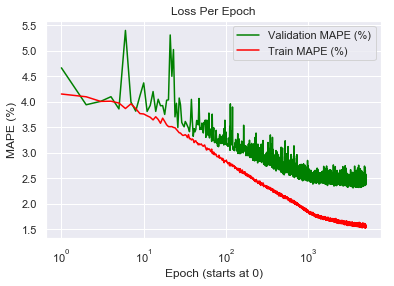

In [116]:
plt.plot(1+np.arange(start, stop), history_df['val_loss'][start:], c='green')
plt.plot(1+np.arange(start, stop), history_df['loss'][start:], c='red')
plt.legend(('Validation MAPE (%)', 'Train MAPE (%)'))
plt.title('Loss Per Epoch')
plt.xlabel('Epoch (starts at {})'.format(start))
plt.ylabel('MAPE (%)')
plt.xscale('log')
plt.savefig('C:/Users/Nicolas/Documents/Scraping/thecarconnection/mape_epoch.jpg')

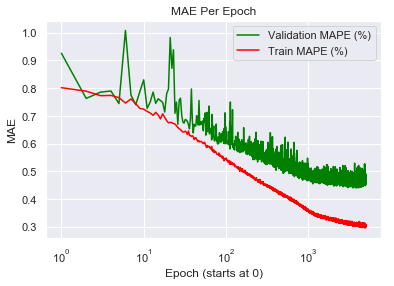

In [114]:
plt.plot(1+np.arange(start, stop), history_df['val_mae'][start:], 'green')
plt.plot(1+np.arange(start, stop), history_df['mae'][start:], c='red')
plt.legend(('Validation MAPE (%)', 'Train MAPE (%)'))
plt.title('MAE Per Epoch')
plt.xlabel('Epoch (starts at {})'.format(start))
plt.ylabel('MAE')
plt.xscale('log')
plt.savefig('C:/Users/Nicolas/Documents/Scraping/thecarconnection/mae_epoch.jpg')

#### Plotting actual vs predicted `MSRP`

In [70]:
pred = model.predict(x)

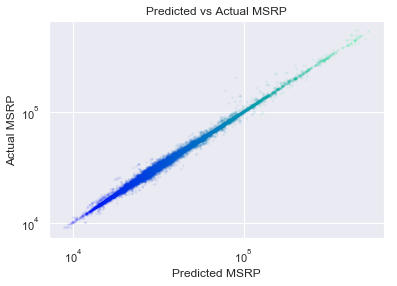

In [71]:
ticks = [0, 50_000, 100_000, 150_000, 200_000, 250_000, 300_000, 350_000, 400_000, 450_000, 500_000]
labels = ['$0', '$50k', '$100k', '$150k', '$200k', '$250k', '$300k', '$350k', '$400k', '$450k', '$500k']
plt.scatter(pred, y, alpha=0.05, c=np.log(pred), cmap='winter', s=3) # winter, summer
plt.xlabel('Predicted MSRP')
plt.ylabel('Actual MSRP')
plt.title('Predicted vs Actual MSRP')
xticks = plt.xticks(ticks, labels)
yticks = plt.yticks(ticks, labels)
plt.yscale('log')
plt.xscale('log')
# plt.savefig('C:/Users/Nicolas/Documents/Scraping/thecarconnection/pred_msrp.jpg')

In [53]:
np.corrcoef(model.predict(x).ravel(), y)

array([[1.        , 0.99735504],
       [0.99735504, 1.        ]])

# Comparing performance with Linear Regression

In [87]:
lin_reg = LinearRegression()

In [122]:
x = dataset.loc[:, ['Drivetrain', 'Passenger Capacity', 'Passenger Doors', 'Body Style',
       'EPA Classification', 'Front Shoulder Room (in)',
       'Front Head Room (in)', 'Second Leg Room (in)', 'Front Leg Room (in)',
       'Second Shoulder Room (in)', 'Second Head Room (in)',
       'Height, Overall (in)', 'Wheelbase (in)', 'Width, Max w/o mirrors (in)',
       'Fuel Tank Capacity, Approx (gal)', 'EPA Fuel Economy Est - Hwy (MPG)',
       'EPA Fuel Economy Est - City (MPG)', 'Fuel System',
       'Third Gear Ratio (:1)', 'First Gear Ratio (:1)',
       'Fourth Gear Ratio (:1)', 'Second Gear Ratio (:1)',
       'Front Brake Rotor Diam x Thickness (in)',
       'Rear Brake Rotor Diam x Thickness (in)', 'Steering Type',
       'Turning Diameter - Curb to Curb', 'Rear Wheel Material',
       'Suspension Type - Front', 'Air Bag-Frontal-Driver',
       'Air Bag-Frontal-Passenger', 'Air Bag-Passenger Switch (On/Off)',
       'Air Bag-Side Body-Front', 'Air Bag-Side Body-Rear',
       'Air Bag-Side Head-Front', 'Air Bag-Side Head-Rear', 'Brakes-ABS',
       'Child Safety Rear Door Locks', 'Daytime Running Lights',
       'Traction Control', 'Night Vision', 'Rollover Protection Bars',
       'Fog Lamps', 'Parking Aid', 'Tire Pressure Monitor', 'Back-Up Camera',
       'Stability Control', 'Other Features', 'Basic Miles/km', 'Basic Years',
       'Corrosion Miles/km', 'Corrosion Years', 'Drivetrain Miles/km',
       'Drivetrain Years', 'Roadside Assistance Miles/km',
       'Roadside Assistance Years', 'Hybrid Engine', 'Gears', 'Net Horsepower',
       'Net Horsepower RPM', 'Net Torque', 'Net Torque RPM', 'Cylinders',
       'Engine Configuration', 'Displacement (L)', 'Displacement (cc)',
       'Rear Tire Width', 'Front Tire Width', 'Rear Wheel Size',
       'Front Wheel Size', 'Tire Rating', 'Tire Width Ratio',
       'Wheel Size Ratio', 'Tire Ratio', 'Year', 'Country',
       'Category', 'Make']] # make was added
y = dataset['MSRP']

In [123]:
specs_to_dummies = ['Drivetrain', 'Fuel System', 'Steering Type', 'Rear Wheel Material',
                   'Suspension Type - Front', 'Engine Configuration', 'Tire Rating', 'Country',
                   'Category', 'Make']

for item in specs_to_dummies:
    dummies = pd.get_dummies(x[item], prefix_sep=': ', prefix=item)
    x = x.drop(item, axis=1)
    x = pd.concat([x, dummies], sort=False, axis=1)
x = x.reset_index(drop=True)

specs_to_one_two = ['Air Bag-Frontal-Driver', 'Air Bag-Frontal-Passenger', 'Air Bag-Passenger Switch (On/Off)',
       'Air Bag-Side Body-Front', 'Air Bag-Side Body-Rear', 'Air Bag-Side Head-Front', 'Air Bag-Side Head-Rear', 
       'Brakes-ABS', 'Child Safety Rear Door Locks', 'Daytime Running Lights',
       'Traction Control', 'Night Vision', 'Rollover Protection Bars',
       'Fog Lamps', 'Parking Aid', 'Tire Pressure Monitor', 'Back-Up Camera',
       'Stability Control']

for item in specs_to_one_two:
    dummies = pd.get_dummies(x[item], prefix_sep=': ', prefix=item, drop_first=True)
    x = x.drop(item, axis=1)
    x = pd.concat([x, dummies], sort=False, axis=1)
x = x.reset_index(drop=True)

x.drop(['Body Style', 'EPA Classification', 'Other Features'], axis=1, inplace=True)

In [125]:
x = StandardScaler().fit_transform(x)

C:\Users\Nicolas\Miniconda3\envs\tfenv\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Nicolas\Miniconda3\envs\tfenv\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [126]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [127]:
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [128]:
y_pred = lin_reg.predict(X_test)

In [131]:
mean_absolute_error(y_test, y_pred)

2336743801665137.5

In [132]:
ridge = Ridge()

In [134]:
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
mean_absolute_error(y_test, y_pred)

5170.621923356377

In [136]:
param_grid = {'alpha':np.linspace(0.001, 10, 100)}
grid = GridSearchCV(ridge, param_grid, cv=5)
grid.fit(X_train, y_train)
ridge = grid.best_estimator_
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
mean_absolute_error(y_test, y_pred)

5171.3393463451175